**Modeling and Forecasting Inflation in the United States from 1972-2022**

***Inserting and Loading Packages***

In [1]:
# Loading Packages
library(readr)
library(dplyr)
library(tidyr)
library(stringr)
library(lubridate)
library(purrr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
#displays the version of R currently running
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.0                         
year           2023                        
month          04                          
day            21                          
svn rev        84292                       
language       R                           
version.string R version 4.3.0 (2023-04-21)
nickname       Already Tomorrow            

In [3]:
#provides all the packages currently available in this R environment and other packages required and not there in this environment are installed and loaded
library()

In [4]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("repr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’




In [7]:
install.packages("gganimate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘tweenr’




In [8]:
install.packages("vars")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘strucchange’, ‘urca’, ‘lmtest’, ‘sandwich’




In [9]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘RcppArmadillo’




In [10]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:dplyr’:

    recode




In [11]:
#loading the installed packages
library(corrplot)
library(repr)
library(psych)
library(gganimate)
library(vars)
library(forecast)

corrplot 0.92 loaded


Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary


Loading required package: urca

Loading required package: lmtest

Registered S3 method overwritten by 'quantmod':
  method            from
 

In [12]:
# Controls Figure Size and which can be used for displaying graphs or plots 
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

***Loading Data***

In [13]:
# Loading Data
Monthly_Inflation <- read_csv("CPI for urban consumers.csv")
FEDFUNDS <- read_csv("FEDFUNDS.csv")
Monthly_Unemployment <- read_csv("Unemployment Rate.csv")
UMCSENT <- read_csv("UMCSENT.csv")
AllCommodities_Index <- read_csv("PPI Commodity Data.csv")
M2SL <- read_csv("M2SL.csv")
WTI_Oil_Prices <- read_csv("PPI Commodity Data for Fuels(2).csv")
GoldPrices <- read_csv("GoldPrices.csv")
Mortgage_Rate <- read_csv("mortgage_rate.csv")
#GDP <- read_csv("GDP.csv")

Rows: 877 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Series ID, Period, Label
dbl (3): Year, Value, 12-Month % Change

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 818 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): FEDFUNDS
date (1): DATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 902 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Series ID, Period, Label
dbl (2): Year, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 843 Columns: 2


***Data Cleaning and Numeric-EDA***

In [14]:
#Cleaning GoldPrice Dataset

##Renaming both the columns in the dataset
colnames(GoldPrices)[c(1,2)]<- c("DATE","GoldPrice")

In [15]:
#looking at the data after it is done
head(GoldPrices)

DATE       GoldPrice
1 12/31/1969 35.20    
2 1/30/1970  34.99    
3 2/27/1970  35.02    
4 3/31/1970  35.30    
5 4/30/1970  35.85    
6 5/29/1970  35.45

In [16]:
##getting the month and Year from date which is in character datatype
GoldPrices$Month <- substr(GoldPrices$DATE, 1, ifelse(substr(GoldPrices$DATE, 2, 2) == "/", 1, 2))
#GoldPrices$Year <- substr(GoldPrices$DATE, 7, 10)
GoldPrices$Year <- substr(GoldPrices$DATE, nchar(GoldPrices$DATE) - 3, nchar(GoldPrices$DATE))

In [17]:
head(GoldPrices)

DATE       GoldPrice Month Year
1 12/31/1969 35.20     12    1969
2 1/30/1970  34.99     1     1970
3 2/27/1970  35.02     2     1970
4 3/31/1970  35.30     3     1970
5 4/30/1970  35.85     4     1970
6 5/29/1970  35.45     5     1970

In [18]:
#filtering the data and getting year, month and GoldPrice columns from 1971
GoldPrices <- subset(GoldPrices[GoldPrices$Year>=1971,], select = c("Year", "Month", "GoldPrice"))
#GoldPrices$Month <- month.abb[GoldPrices$Month]
head(GoldPrices)

Year Month GoldPrice
1 1971 1     38.05    
2 1971 2     38.80    
3 1971 3     38.88    
4 1971 4     39.70    
5 1971 5     40.84    
6 1971 6     40.10

In [19]:
#converting month and year to numeric datatype as they are in char and couldn't convert month to abbrevation of it since it is char format
GoldPrices$Month <- as.double(GoldPrices$Month)

In [20]:
#converting year to numeric data type
GoldPrices$Year <- as.double(GoldPrices$Year)

In [21]:
#converting month into abbrevation using month.abb(eg:Jan,Feb)
GoldPrices$Month <- month.abb[GoldPrices$Month]

In [22]:
#GoldPrice column is used for time series analysis and modeling so it is converted into timeseries using ts
#GoldPrices$GoldPrice <- ts(GoldPrices$GoldPrice, start=1971, frequency=12)

In [23]:
#viewing goldprice dataset after cleaning
head(GoldPrices)

Year Month GoldPrice
1 1971 Jan   38.05    
2 1971 Feb   38.80    
3 1971 Mar   38.88    
4 1971 Apr   39.70    
5 1971 May   40.84    
6 1971 Jun   40.10

In [24]:
#summary of the GoldPrice dataset 
##no missing values in GoldPrice dataset
summary(GoldPrices)

      Year         Month             GoldPrice      
 Min.   :1971   Length:626         Min.   :  38.05  
 1st Qu.:1984   Class :character   1st Qu.: 305.30  
 Median :1997   Mode  :character   Median : 391.35  
 Mean   :1997                      Mean   : 639.98  
 3rd Qu.:2010                      3rd Qu.:1085.25  
 Max.   :2023                      Max.   :1964.90  

In [25]:
#cleaning mortgage rate dataset
colnames(Mortgage_Rate)[c(1,2)]<- c("DATE","MortgageRate")
Mortgage_Rate$Month <- substr(Mortgage_Rate$DATE, 1, ifelse(substr(Mortgage_Rate$DATE, 2, 2) == "/", 1, 2))
Mortgage_Rate$Year <- substr(Mortgage_Rate$DATE, nchar(Mortgage_Rate$DATE) - 3, nchar(Mortgage_Rate$DATE))
Mortgage_Rate <- subset(Mortgage_Rate[Mortgage_Rate$Year>=1971,], select = c("Year", "Month", "MortgageRate"))
Mortgage_Rate$Month <- as.double(Mortgage_Rate$Month)
Mortgage_Rate$Year <- as.double(Mortgage_Rate$Year)
Mortgage_Rate$Month <- month.abb[Mortgage_Rate$Month]
#this is used for time series analysis and modeling
#Mortgage_Rate$MortgageRate <- ts(Mortgage_Rate$MortgageRate, start=1971, frequency=12)
head(Mortgage_Rate)



Year Month MortgageRate
1 1971 Apr   7.29        
2 1971 May   7.46        
3 1971 Jun   7.54        
4 1971 Jul   7.69        
5 1971 Aug   7.69        
6 1971 Sep   7.67

In [26]:
#summary of mortgage rate dataset
##no missing values for mortgage rate dataset
summary(Mortgage_Rate)

      Year         Month            MortgageRate   
 Min.   :1971   Length:624         Min.   : 2.670  
 1st Qu.:1984   Class :character   1st Qu.: 5.100  
 Median :1997   Mode  :character   Median : 7.425  
 Mean   :1997                      Mean   : 7.752  
 3rd Qu.:2010                      3rd Qu.: 9.505  
 Max.   :2023                      Max.   :18.440  

In [27]:
# Cleaning MonthlyInflation data

##getting month from Label column
Monthly_Inflation$Month <- substring(Monthly_Inflation$Label, 6, 8)
#Monthly_Inflation$month
colnames(Monthly_Inflation)[c(5,6)]<- c("MonthlyInflation","Rate")
#Monthly_Inflation$MonthlyInflation
#Monthly_Inflation$Rate
Inflation_long <- subset(Monthly_Inflation[Monthly_Inflation$Year>=1971,], select = c("Year", "Month", "MonthlyInflation", "Rate"))
#Inflation_long
Inflation_long <- Inflation_long %>% 
  filter(Year >= 1970)
#Rate is used for time series analysis and modeling
Inflation_long$Rate <- ts(Inflation_long$Rate, start=1971, frequency=12)
head(Inflation_long)

Year Month MonthlyInflation Rate
1 1971 Jan   39.8             5.3 
2 1971 Feb   39.9             5.0 
3 1971 Mar   40.0             4.7 
4 1971 Apr   40.1             4.2 
5 1971 May   40.3             4.4 
6 1971 Jun   40.6             4.6

In [28]:
#summary of rate in Inflation dataset
##no missing values in Rate column
summary(Inflation_long$Rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -2.100   2.100   3.200   4.009   4.900  14.800 

In [29]:
#summary of whole inflation long dataset
summary(Inflation_long)

      Year         Month           MonthlyInflation      Rate       
 Min.   :1971   Length:625         Min.   : 39.8    Min.   :-2.100  
 1st Qu.:1984   Class :character   1st Qu.:101.9    1st Qu.: 2.100  
 Median :1997   Mode  :character   Median :159.1    Median : 3.200  
 Mean   :1997                      Mean   :157.2    Mean   : 4.009  
 3rd Qu.:2010                      3rd Qu.:218.0    3rd Qu.: 4.900  
 Max.   :2023                      Max.   :299.2    Max.   :14.800  

In [30]:
is.ts(Inflation_long$Rate)

[1] TRUE

In [31]:
#merging year and month into a single data in this inflation dataset
Inflation_long <- Inflation_long %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

In [32]:
#looking at the dataset after doing this
head(Inflation_long)

Year Month MonthlyInflation Rate Date      
1 1971 Jan   39.8             5.3  1971-01-01
2 1971 Feb   39.9             5.0  1971-02-01
3 1971 Mar   40.0             4.7  1971-03-01
4 1971 Apr   40.1             4.2  1971-04-01
5 1971 May   40.3             4.4  1971-05-01
6 1971 Jun   40.6             4.6  1971-06-01

In [33]:
#looking at FEDFUNDS dataset
head(FEDFUNDS)

DATE       FEDFUNDS
1 1955-01-01 1.39    
2 1955-02-01 1.29    
3 1955-03-01 1.35    
4 1955-04-01 1.43    
5 1955-05-01 1.43    
6 1955-06-01 1.64

In [34]:
# cleaning Federal Funds dataset
FEDFUNDS$DATE <- ymd(FEDFUNDS$DATE)
FEDFUNDS$Year <- year(FEDFUNDS$DATE)
FEDFUNDS$Month <- month(FEDFUNDS$DATE)
FEDFUNDS <- FEDFUNDS %>% 
  filter(Year >= 1971)
#used for time series analysis and modeling
#FEDFUNDS$FEDFUNDS <- ts(FEDFUNDS$FEDFUNDS, start=1971, frequency=12)
FEDFUNDS<- subset(FEDFUNDS, select= c("Year", "Month", "FEDFUNDS"))
head(FEDFUNDS)

Year Month FEDFUNDS
1 1971 1     4.14    
2 1971 2     3.72    
3 1971 3     3.71    
4 1971 4     4.16    
5 1971 5     4.63    
6 1971 6     4.91

In [35]:
#summary of the dataset
##no missing values
summary(FEDFUNDS)

      Year          Month           FEDFUNDS     
 Min.   :1971   Min.   : 1.000   Min.   : 0.050  
 1st Qu.:1984   1st Qu.: 3.000   1st Qu.: 1.260  
 Median :1997   Median : 6.000   Median : 4.870  
 Mean   :1997   Mean   : 6.484   Mean   : 4.860  
 3rd Qu.:2010   3rd Qu.: 9.000   3rd Qu.: 6.885  
 Max.   :2023   Max.   :12.000   Max.   :19.100  

In [36]:
#looking at money supply dataset
head(M2SL)

DATE       M2SL 
1 1959-01-01 286.6
2 1959-02-01 287.7
3 1959-03-01 289.2
4 1959-04-01 290.1
5 1959-05-01 292.2
6 1959-06-01 294.1

In [37]:
# Cleaning Money Supply dataset
M2SL$DATE <- ymd(M2SL$DATE)
M2SL$Year <- year(M2SL$DATE)
M2SL$Month <- month(M2SL$DATE)
#M2SL
M2SL <- M2SL %>% 
  filter(Year >= 1971)
M2SL$M1_change<- diff(M2SL$M2SL, lag = 12) / lag(M2SL$M2SL, 12)
#M2SL$M1_change<- M2SL$M1_change*100
#M2SL$M1_change
#M2SL$M1_change<- ts(M2SL$M1_change*100, start=1971, frequency = 12)
#M2SL$M1_change <- na.approx(M2SL$M1_change)
M2SL <- subset(M2SL, select=-c(DATE, M2SL))
head(M2SL)

Warning message in diff(M2SL$M2SL, lag = 12)/lag(M2SL$M2SL, 12):
“longer object length is not a multiple of shorter object length”


Year Month M1_change
1 1971 1     NA       
2 1971 2     NA       
3 1971 3     NA       
4 1971 4     NA       
5 1971 5     NA       
6 1971 6     NA

In [38]:
#we can see there are 12 null values in the M1 change column 
summary(M2SL)

      Year          Month          M1_change       
 Min.   :1971   Min.   : 1.000   Min.   :-0.01929  
 1st Qu.:1984   1st Qu.: 3.000   1st Qu.: 0.05108  
 Median :1997   Median : 6.000   Median : 0.06826  
 Mean   :1997   Mean   : 6.491   Mean   : 0.07393  
 3rd Qu.:2010   3rd Qu.: 9.000   3rd Qu.: 0.09086  
 Max.   :2023   Max.   :12.000   Max.   : 0.28694  
                                 NA's   :12        

In [39]:
# Remove null values from the dbl_column M1_change
 M2SL<- M2SL[!is.na(M2SL$M1_change),]

In [40]:
#no missing values now
summary(M2SL$M1_change)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.01929  0.05108  0.06826  0.07393  0.09086  0.28694 

In [41]:
#looking at monthly unemployment dataset
head(Monthly_Unemployment)

Series ID   Year Period Label    Value
1 LNS14000000 1948 M01    1948 Jan 3.4  
2 LNS14000000 1948 M02    1948 Feb 3.8  
3 LNS14000000 1948 M03    1948 Mar 4.0  
4 LNS14000000 1948 M04    1948 Apr 3.9  
5 LNS14000000 1948 M05    1948 May 3.5  
6 LNS14000000 1948 M06    1948 Jun 3.6

In [42]:
# Cleaning Unemployment dataset
Monthly_Unemployment$Month <- substring(Monthly_Unemployment$Label, 6, 8)
colnames(Monthly_Unemployment)[c(5)]<- c("Unemployment")
Unemployment <- subset(Monthly_Unemployment, select = c("Year", "Month", "Unemployment"))
Unemployment <- Unemployment %>% 
  filter(Year >= 1971)
#Unemployment
#this is used for time series analysis and modeling
#Unemployment$Unemployment <- ts(Unemployment$Unemployment, start=1971, frequency=12)
head(Unemployment)

Year Month Unemployment
1 1971 Jan   5.9         
2 1971 Feb   5.9         
3 1971 Mar   6.0         
4 1971 Apr   5.9         
5 1971 May   5.9         
6 1971 Jun   5.9

In [43]:
#looking if there are any missing values
summary(Unemployment)

      Year         Month            Unemployment   
 Min.   :1971   Length:626         Min.   : 3.400  
 1st Qu.:1984   Class :character   1st Qu.: 5.000  
 Median :1997   Mode  :character   Median : 5.800  
 Mean   :1997                      Mean   : 6.189  
 3rd Qu.:2010                      3rd Qu.: 7.300  
 Max.   :2023                      Max.   :14.700  

In [44]:
#no missing values in unemployment column
summary(Unemployment$Unemployment)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.400   5.000   5.800   6.189   7.300  14.700 

In [45]:
# Cleaning Consumer Sentiment dataset
UMCSENT$DATE <- ymd(UMCSENT$DATE)
UMCSENT$Year <- year(UMCSENT$DATE)
UMCSENT$Month <- month(UMCSENT$DATE)
UMCSENT <- subset(UMCSENT, select=c(Year,Month,UMCSENT))
summary(UMCSENT)
#there are few '.' values in UMCSENT column which are replaced with NaN values 
UMCSENT$UMCSENT <- as.numeric(ifelse(UMCSENT$UMCSENT==".",NaN,UMCSENT$UMCSENT))
UMCSENT <- UMCSENT %>%
    mutate(UMCSENT = na.approx(UMCSENT))
#UMCSENT$UMCSENT <- ts(UMCSENT$UMCSENT, start=1971, frequency = 12)

      Year          Month          UMCSENT         
 Min.   :1952   Min.   : 1.000   Length:843        
 1st Qu.:1970   1st Qu.: 3.500   Class :character  
 Median :1987   Median : 7.000   Mode  :character  
 Mean   :1987   Mean   : 6.505                     
 3rd Qu.:2005   3rd Qu.:10.000                     
 Max.   :2023   Max.   :12.000                     

In [46]:
UMCSENT <- UMCSENT %>% 
  filter(Year >= 1971)

In [47]:
head(UMCSENT)

Year Month UMCSENT 
1 1971 1     76.20000
2 1971 2     78.10000
3 1971 3     78.80000
4 1971 4     79.50000
5 1971 5     80.20000
6 1971 6     80.83333

In [48]:
#summary of UMCSENT column now
#no missing values
summary(UMCSENT$UMCSENT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   50.0    75.0    87.7    84.6    93.8   112.0 

In [49]:
#to check is there are any missing values using sum
##no missing values now
sum(is.nan(UMCSENT$UMCSENT))

[1] 0

In [50]:
#looking at the Oil Prices dataset
head(WTI_Oil_Prices)

Series ID Year Period Label    Value 12-Month % Change
1 WPU0561   1947 M01    1947 Jan 7.3   N/A              
2 WPU0561   1947 M02    1947 Feb 7.3   N/A              
3 WPU0561   1947 M03    1947 Mar 8.0   N/A              
4 WPU0561   1947 M04    1947 Apr 8.4   N/A              
5 WPU0561   1947 M05    1947 May 8.4   N/A              
6 WPU0561   1947 M06    1947 Jun 8.4   N/A

In [51]:
# Cleaning WTI Oil Prices
WTI_Oil_Prices$Month <- substring(WTI_Oil_Prices$Label, 6, 8)
colnames(WTI_Oil_Prices)[c(6)]<- c("OilChange")
WTI_Oil_Prices<- subset(WTI_Oil_Prices, select = c("Year", "Month", "OilChange"))
#WTI_Oil_Prices
WTI_Oil_Prices <- WTI_Oil_Prices %>% 
  filter(Year >= 1971)
#this is used for time series analysis and modeling
#WTI_Oil_Prices$OilChange <- ts(WTI_Oil_Prices$OilChange, start=1971, frequency=12)
head(WTI_Oil_Prices)

Year Month OilChange
1 1971 Jan   7.6      
2 1971 Feb   7.6      
3 1971 Mar   7.6      
4 1971 Apr   7.6      
5 1971 May   7.6      
6 1971 Jun   7.6

In [52]:
summary(WTI_Oil_Prices$OilChange)

   Length     Class      Mode 
      625 character character 

In [54]:
WTI_Oil_Prices$Oil_Change <- as.numeric(WTI_Oil_Prices$OilChange)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [55]:
#only 1 mising value 
summary(WTI_Oil_Prices$Oil_Change)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -74.00   -8.60    7.15   11.98   30.95  260.00       1 

In [56]:
head(WTI_Oil_Prices)

Year Month OilChange Oil_Change
1 1971 Jan   7.6       7.6       
2 1971 Feb   7.6       7.6       
3 1971 Mar   7.6       7.6       
4 1971 Apr   7.6       7.6       
5 1971 May   7.6       7.6       
6 1971 Jun   7.6       7.6

In [57]:
WTI_Oil_Prices <- subset(WTI_Oil_Prices, select = c("Year", "Month", "Oil_Change"))

In [58]:
# Remove null values from the dbl_column Oil_Change
 WTI_Oil_Prices<- WTI_Oil_Prices[!is.na(WTI_Oil_Prices$Oil_Change),]

In [59]:
#no missing values after removing
summary(WTI_Oil_Prices$Oil_Change)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -74.00   -8.60    7.15   11.98   30.95  260.00 

In [60]:
#looking at all commodities data
head(AllCommodities_Index)

Series ID   Year Period Label    Value 12-Month % Change
1 WPU00000000 1947 M01    1947 Jan 24.5  33.2             
2 WPU00000000 1947 M02    1947 Feb 24.7  33.5             
3 WPU00000000 1947 M03    1947 Mar 25.3  34.6             
4 WPU00000000 1947 M04    1947 Apr 25.1  32.1             
5 WPU00000000 1947 M05    1947 May 25.0  30.9             
6 WPU00000000 1947 M06    1947 Jun 25.0  28.9

In [61]:
# Cleaning All Commodities dataset
AllCommodities_Index$Month <- substring(AllCommodities_Index$Label, 6, 8)
colnames(AllCommodities_Index)[c(6)]<- c("Commodities_Price")
AllCommodities_Index<- subset(AllCommodities_Index, select = c("Year", "Month", "Commodities_Price"))
AllCommodities_Index <- AllCommodities_Index %>% 
  filter(Year >= 1971)
#this is used for time series analysis and modeling
#AllCommodities_Index$Commodities_Price <- ts(AllCommodities_Index$Commodities_Price, start=1971, frequency=12)
head(AllCommodities_Index)

Year Month Commodities_Price
1 1971 Jan   2.2              
2 1971 Feb   2.7              
3 1971 Mar   3.0              
4 1971 Apr   3.0              
5 1971 May   3.5              
6 1971 Jun   3.5

In [62]:
#summary of dataset
summary(AllCommodities_Index)

      Year         Month           Commodities_Price
 Min.   :1971   Length:625         Min.   :-16.100  
 1st Qu.:1984   Class :character   1st Qu.:  0.600  
 Median :1997   Mode  :character   Median :  3.700  
 Mean   :1997                      Mean   :  4.036  
 3rd Qu.:2010                      3rd Qu.:  6.500  
 Max.   :2023                      Max.   : 23.400  

In [63]:
#no missing values
summary(AllCommodities_Index$Commodities_Price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-16.100   0.600   3.700   4.036   6.500  23.400 

In [64]:
#converting all months in numeric into abbrevations
FEDFUNDS$Month <- month.abb[FEDFUNDS$Month]
M2SL$Month <- month.abb[M2SL$Month]
UMCSENT$Month <- month.abb[UMCSENT$Month]

In [65]:
#merging year and month into a single date so that it can be used when merging to group and arrange the data
FEDFUNDS <- FEDFUNDS %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

M2SL <- M2SL %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

UMCSENT <- UMCSENT %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

AllCommodities_Index <- AllCommodities_Index %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

WTI_Oil_Prices <- WTI_Oil_Prices %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

Unemployment <- Unemployment %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

GoldPrices <- GoldPrices %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)

Mortgage_Rate <- Mortgage_Rate %>%
  mutate(Date = paste(Year, Month, "01", sep="-") %>% ymd()) %>%
  arrange(Date)



In [66]:
#looking at data, data type, column names and size of the data using str
str(FEDFUNDS)
str(M2SL)
str(UMCSENT)
str(Inflation_long)
str(AllCommodities_Index)
str(Unemployment)
str(WTI_Oil_Prices)

tibble [626 × 4] (S3: tbl_df/tbl/data.frame)
 $ Year    : num [1:626] 1971 1971 1971 1971 1971 ...
 $ Month   : chr [1:626] "Jan" "Feb" "Mar" "Apr" ...
 $ FEDFUNDS: num [1:626] 4.14 3.72 3.71 4.16 4.63 4.91 5.31 5.57 5.55 5.2 ...
 $ Date    : Date[1:626], format: "1971-01-01" "1971-02-01" ...
tibble [613 × 4] (S3: tbl_df/tbl/data.frame)
 $ Year     : num [1:613] 1972 1972 1972 1972 1972 ...
 $ Month    : chr [1:613] "Jan" "Feb" "Mar" "Apr" ...
 $ M1_change: num [1:613] 0.146 0.138 0.126 0.123 0.125 ...
 $ Date     : Date[1:613], format: "1972-01-01" "1972-02-01" ...
tibble [625 × 4] (S3: tbl_df/tbl/data.frame)
 $ Year   : num [1:625] 1971 1971 1971 1971 1971 ...
 $ Month  : chr [1:625] "Jan" "Feb" "Mar" "Apr" ...
 $ UMCSENT: num [1:625] 76.2 78.1 78.8 79.5 80.2 ...
 $ Date   : Date[1:625], format: "1971-01-01" "1971-02-01" ...
tibble [625 × 5] (S3: tbl_df/tbl/data.frame)
 $ Year            : num [1:625] 1971 1971 1971 1971 1971 ...
 $ Month           : chr [1:625] "Jan" "Feb" "Mar" "Ap

In [67]:
#summary of all the data after cleaning
summary(Inflation_long)
summary(FEDFUNDS)
summary(UMCSENT)
summary(M2SL)
summary(AllCommodities_Index)
summary(Unemployment)
summary(WTI_Oil_Prices)

##no missing values after cleaning

      Year         Month           MonthlyInflation      Rate       
 Min.   :1971   Length:625         Min.   : 39.8    Min.   :-2.100  
 1st Qu.:1984   Class :character   1st Qu.:101.9    1st Qu.: 2.100  
 Median :1997   Mode  :character   Median :159.1    Median : 3.200  
 Mean   :1997                      Mean   :157.2    Mean   : 4.009  
 3rd Qu.:2010                      3rd Qu.:218.0    3rd Qu.: 4.900  
 Max.   :2023                      Max.   :299.2    Max.   :14.800  
      Date           
 Min.   :1971-01-01  
 1st Qu.:1984-01-01  
 Median :1997-01-01  
 Mean   :1996-12-30  
 3rd Qu.:2010-01-01  
 Max.   :2023-01-01  

      Year         Month              FEDFUNDS           Date           
 Min.   :1971   Length:626         Min.   : 0.050   Min.   :1971-01-01  
 1st Qu.:1984   Class :character   1st Qu.: 1.260   1st Qu.:1984-01-08  
 Median :1997   Mode  :character   Median : 4.870   Median :1997-01-16  
 Mean   :1997                      Mean   : 4.860   Mean   :1997-01-15  
 3rd Qu.:2010                      3rd Qu.: 6.885   3rd Qu.:2010-01-24  
 Max.   :2023                      Max.   :19.100   Max.   :2023-02-01  

      Year         Month              UMCSENT           Date           
 Min.   :1971   Length:625         Min.   : 50.0   Min.   :1971-01-01  
 1st Qu.:1984   Class :character   1st Qu.: 75.0   1st Qu.:1984-01-01  
 Median :1997   Mode  :character   Median : 87.7   Median :1997-01-01  
 Mean   :1997                      Mean   : 84.6   Mean   :1996-12-30  
 3rd Qu.:2010                      3rd Qu.: 93.8   3rd Qu.:2010-01-01  
 Max.   :2023                      Max.   :112.0   Max.   :2023-01-01  

      Year         Month             M1_change             Date           
 Min.   :1972   Length:613         Min.   :-0.01929   Min.   :1972-01-01  
 1st Qu.:1984   Class :character   1st Qu.: 0.05108   1st Qu.:1984-10-01  
 Median :1997   Mode  :character   Median : 0.06826   Median :1997-07-01  
 Mean   :1997                      Mean   : 0.07393   Mean   :1997-07-01  
 3rd Qu.:2010                      3rd Qu.: 0.09086   3rd Qu.:2010-04-01  
 Max.   :2023                      Max.   : 0.28694   Max.   :2023-01-01  

      Year         Month           Commodities_Price      Date           
 Min.   :1971   Length:625         Min.   :-16.100   Min.   :1971-01-01  
 1st Qu.:1984   Class :character   1st Qu.:  0.600   1st Qu.:1984-01-01  
 Median :1997   Mode  :character   Median :  3.700   Median :1997-01-01  
 Mean   :1997                      Mean   :  4.036   Mean   :1996-12-30  
 3rd Qu.:2010                      3rd Qu.:  6.500   3rd Qu.:2010-01-01  
 Max.   :2023                      Max.   : 23.400   Max.   :2023-01-01  

      Year         Month            Unemployment         Date           
 Min.   :1971   Length:626         Min.   : 3.400   Min.   :1971-01-01  
 1st Qu.:1984   Class :character   1st Qu.: 5.000   1st Qu.:1984-01-08  
 Median :1997   Mode  :character   Median : 5.800   Median :1997-01-16  
 Mean   :1997                      Mean   : 6.189   Mean   :1997-01-15  
 3rd Qu.:2010                      3rd Qu.: 7.300   3rd Qu.:2010-01-24  
 Max.   :2023                      Max.   :14.700   Max.   :2023-02-01  

      Year         Month             Oil_Change          Date           
 Min.   :1971   Length:624         Min.   :-74.00   Min.   :1971-01-01  
 1st Qu.:1984   Class :character   1st Qu.: -8.60   1st Qu.:1983-12-24  
 Median :1996   Mode  :character   Median :  7.15   Median :1996-12-16  
 Mean   :1996                      Mean   : 11.98   Mean   :1996-12-15  
 3rd Qu.:2009                      3rd Qu.: 30.95   3rd Qu.:2009-12-08  
 Max.   :2022                      Max.   :260.00   Max.   :2022-12-01  

In [68]:
#looking if there are any duplicated rows in the Oil Prices dataset because I was able to merge the dataset but it is not in ascending order
#even after I tried to do it. 

##there are no duplicated rows but I understood that data collected was mixed with some other data too and that is why I couldn't arrange it in ascending order
#so after removing unwanted data from Oil prices dataset, now I could get the merged data in ascending order
duplicated_rows <- duplicated(WTI_Oil_Prices)
sum(duplicated_rows)

[1] 0

***Merging Data into final dataset***

In [69]:
# merging data using group_by and arrange
# grouping by year and arranging the final data by year and month
# Join tables
Inflation_full <- merge(Inflation_long, FEDFUNDS, by=c("Year", "Month", "Date")) %>%
    merge(M2SL, by=c("Year", "Month", "Date")) %>%
    merge(Unemployment, by=c("Year", "Month", "Date")) %>%
    merge(UMCSENT, by=c("Year", "Month", "Date")) %>%
    merge(AllCommodities_Index, by=c("Year", "Month", "Date")) %>% 
    merge(WTI_Oil_Prices, by=c("Year", "Month", "Date")) %>%
    merge(GoldPrices, by=c("Year", "Month", "Date")) %>%
    merge(Mortgage_Rate, by=c("Year", "Month", "Date")) %>%

  
    distinct() %>%
    group_by(Year) %>%
    arrange(Year, Month)


In [70]:
#here we can see the merged data which is not in ascending order
head(Inflation_full)

Year Month Date       MonthlyInflation Rate FEDFUNDS M1_change  Unemployment
1 1972 Apr   1972-04-01 41.5             3.5  4.17     0.12348117 5.7         
2 1972 Aug   1972-08-01 42.0             2.9  4.81     0.10226112 5.6         
3 1972 Dec   1972-12-01 42.5             3.4  5.33     0.07489793 5.2         
4 1972 Feb   1972-02-01 41.3             3.5  3.30     0.13790952 5.7         
5 1972 Jan   1972-01-01 41.1             3.3  3.51     0.14631063 5.8         
6 1972 Jul   1972-07-01 41.9             2.9  4.55     0.11330194 5.6         
  UMCSENT  Commodities_Price Oil_Change GoldPrice MortgageRate
1 90.00000 3.7               -1.3       49.60     7.33        
2 95.20000 4.2                0.0       66.88     7.42        
3 87.76667 6.5                0.0       64.90     7.45        
4 92.80000 4.0               -1.3       48.20     7.31        
5 89.20000 4.0               -1.3       47.15     7.40        
6 93.00000 4.4               -1.3       68.30     7.40

In [71]:
Inflation_full <- subset(Inflation_full, select = c("Date", "Rate", "FEDFUNDS", "M1_change", "Unemployment","UMCSENT", "Commodities_Price", "Oil_Change", "GoldPrice","MortgageRate"))

In [72]:
#now arranging data in ascending order by Date
Inflation_full <- Inflation_full %>%
  arrange(Date)

In [73]:
# export the Inflation_full as a csv file into google colaboratory
write.csv(Inflation_full, file = "/content/sample_data/Inflation_full(1).csv", row.names = FALSE)

In [74]:
colnames(Inflation_full)

[1] "Date"              "Rate"              "FEDFUNDS"         
 [4] "M1_change"         "Unemployment"      "UMCSENT"          
 [7] "Commodities_Price" "Oil_Change"        "GoldPrice"        
[10] "MortgageRate"

In [75]:
#first six rows in the final dataset
head(Inflation_full)

Date       Rate FEDFUNDS M1_change Unemployment UMCSENT Commodities_Price
1 1972-01-01 3.3  3.51     0.1463106 5.8          89.2    4.0              
2 1972-02-01 3.5  3.30     0.1379095 5.7          92.8    4.0              
3 1972-03-01 3.5  3.83     0.1258655 5.8          91.4    3.7              
4 1972-04-01 3.5  4.17     0.1234812 5.7          90.0    3.7              
5 1972-05-01 3.2  4.27     0.1252437 5.7          88.6    3.7              
6 1972-06-01 2.7  4.46     0.1242199 5.7          90.8    3.9              
  Oil_Change GoldPrice MortgageRate
1 -1.3       47.15     7.40        
2 -1.3       48.20     7.31        
3 -1.3       48.38     7.23        
4 -1.3       49.60     7.33        
5 -1.3       59.45     7.40        
6 -1.3       64.65     7.38

In [76]:
#size of the dataset
dim(Inflation_full)

##612 rows and 10 columns in the final dataset

[1] 612  10

In [77]:
str(Inflation_full)

tibble [612 × 10] (S3: tbl_df/tbl/data.frame)
 $ Date             : Date[1:612], format: "1972-01-01" "1972-02-01" ...
 $ Rate             : num [1:612] 3.3 3.5 3.5 3.5 3.2 2.7 2.9 2.9 3.2 3.4 ...
 $ FEDFUNDS         : num [1:612] 3.51 3.3 3.83 4.17 4.27 4.46 4.55 4.81 4.87 5.05 ...
 $ M1_change        : num [1:612] 0.146 0.138 0.126 0.123 0.125 ...
 $ Unemployment     : num [1:612] 5.8 5.7 5.8 5.7 5.7 5.7 5.6 5.6 5.5 5.6 ...
 $ UMCSENT          : num [1:612] 89.2 92.8 91.4 90 88.6 90.8 93 95.2 93.7 92.2 ...
 $ Commodities_Price: num [1:612] 4 4 3.7 3.7 3.7 3.9 4.4 4.2 5 4.7 ...
 $ Oil_Change       : num [1:612] -1.3 -1.3 -1.3 -1.3 -1.3 -1.3 -1.3 0 0 0 ...
 $ GoldPrice        : num [1:612] 47.1 48.2 48.4 49.6 59.5 ...
 $ MortgageRate     : num [1:612] 7.4 7.31 7.23 7.33 7.4 7.38 7.4 7.42 7.43 7.42 ...


In [78]:
#summary of the final dataset
summary(Inflation_full)

##no missing values

      Date                 Rate           FEDFUNDS        M1_change       
 Min.   :1972-01-01   Min.   :-2.100   Min.   : 0.050   Min.   :-0.01929  
 1st Qu.:1984-09-23   1st Qu.: 2.100   1st Qu.: 1.248   1st Qu.: 0.05114  
 Median :1997-06-16   Median : 3.100   Median : 4.905   Median : 0.06835  
 Mean   :1997-06-16   Mean   : 3.999   Mean   : 4.865   Mean   : 0.07404  
 3rd Qu.:2010-03-08   3rd Qu.: 4.900   3rd Qu.: 6.938   3rd Qu.: 0.09088  
 Max.   :2022-12-01   Max.   :14.800   Max.   :19.100   Max.   : 0.28694  
  Unemployment       UMCSENT       Commodities_Price   Oil_Change    
 Min.   : 3.500   Min.   : 50.00   Min.   :-16.100   Min.   :-74.00  
 1st Qu.: 5.000   1st Qu.: 74.70   1st Qu.:  0.500   1st Qu.: -8.90  
 Median : 5.800   Median : 88.17   Median :  3.700   Median :  6.60  
 Mean   : 6.202   Mean   : 84.71   Mean   :  4.049   Mean   : 12.06  
 3rd Qu.: 7.300   3rd Qu.: 93.92   3rd Qu.:  6.600   3rd Qu.: 31.38  
 Max.   :14.700   Max.   :112.00   Max.   : 23.400   Ma

***Data Visualization***

In [82]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Histogram of all numeric columns**

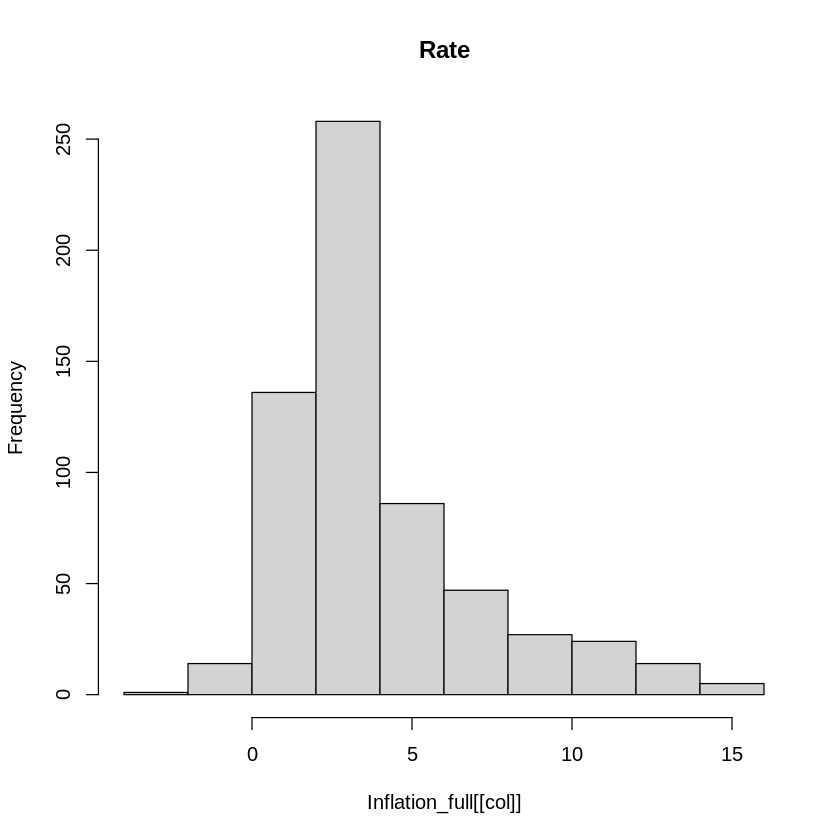

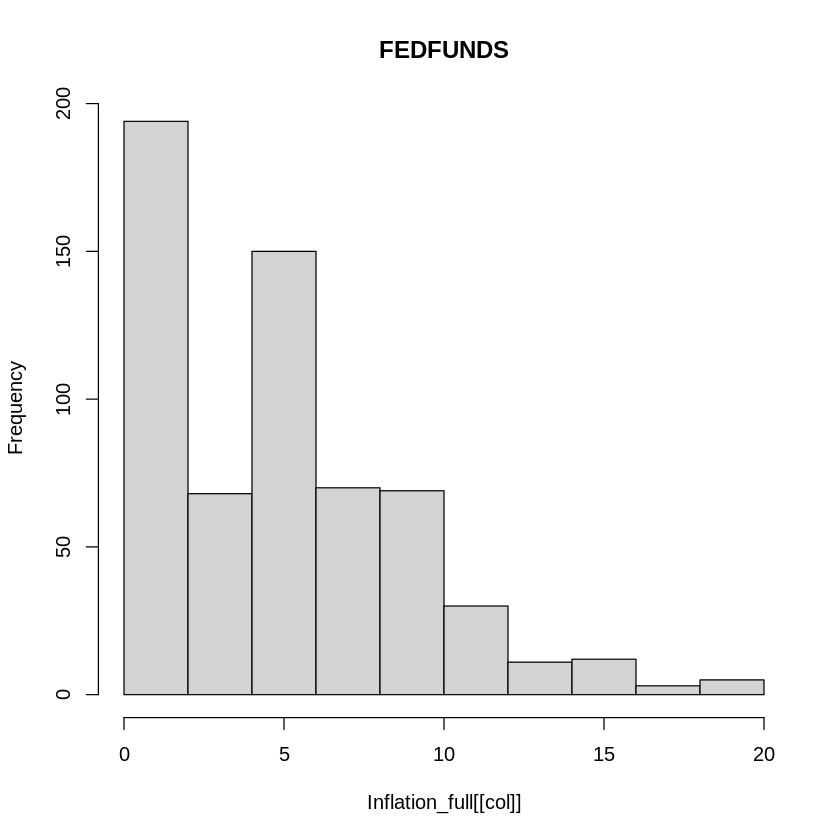

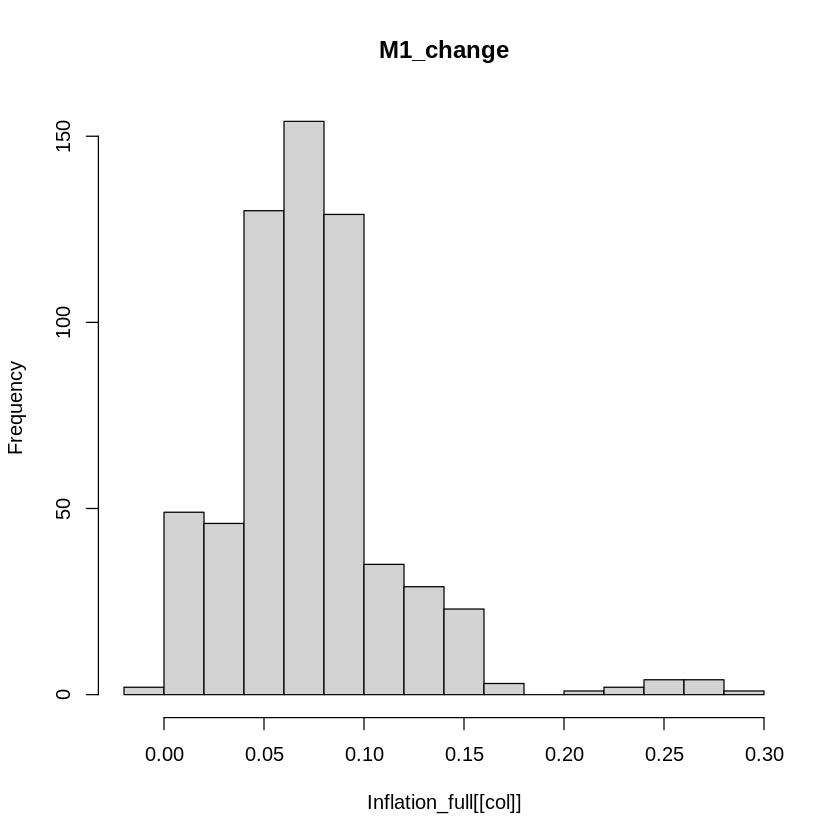

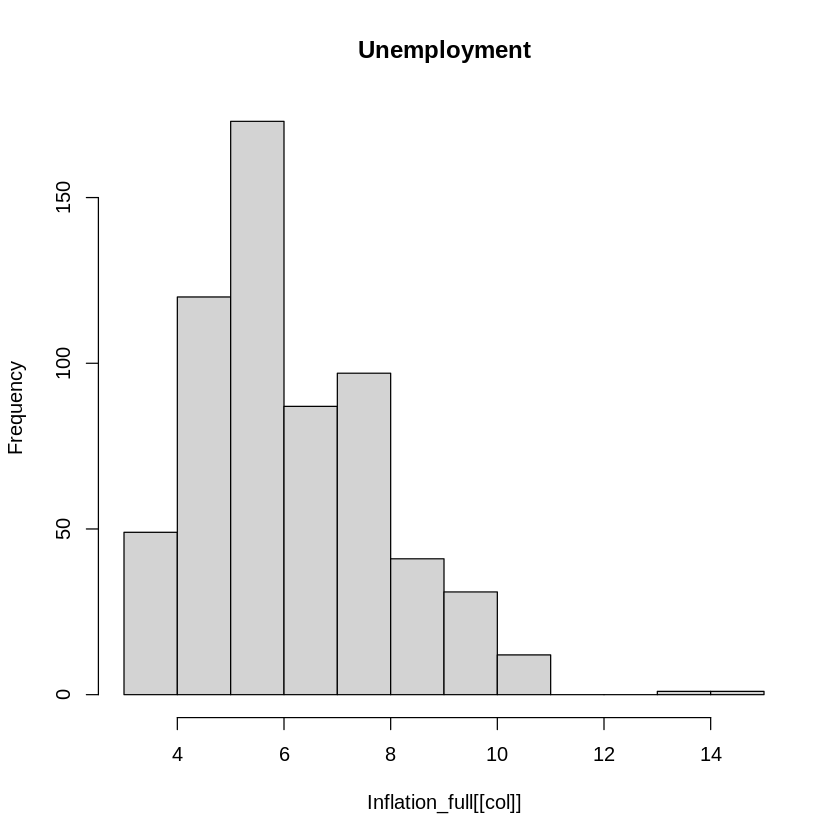

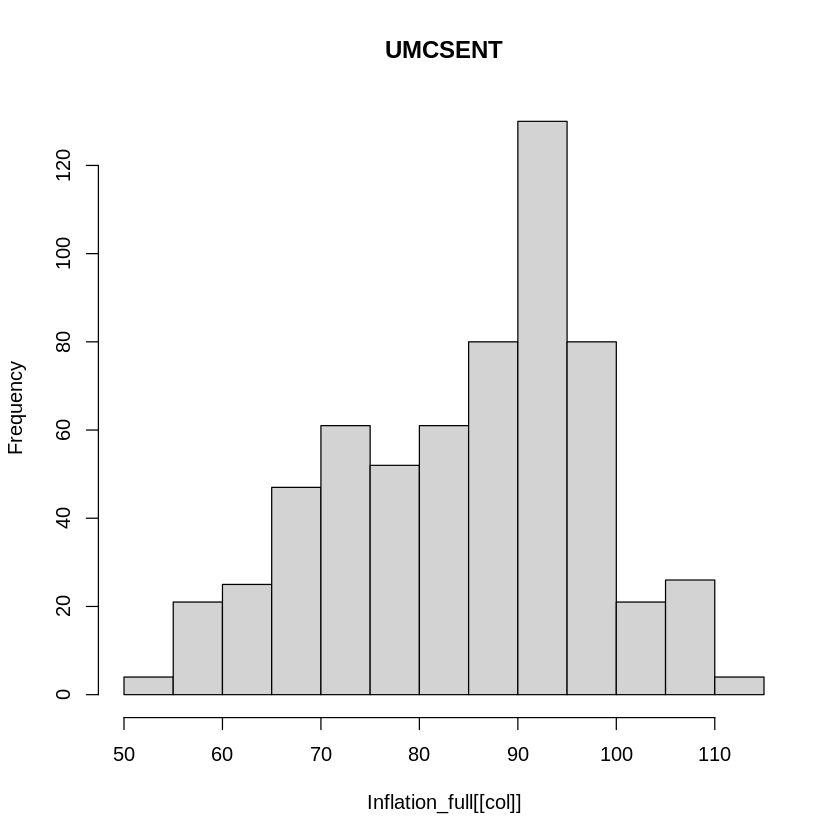

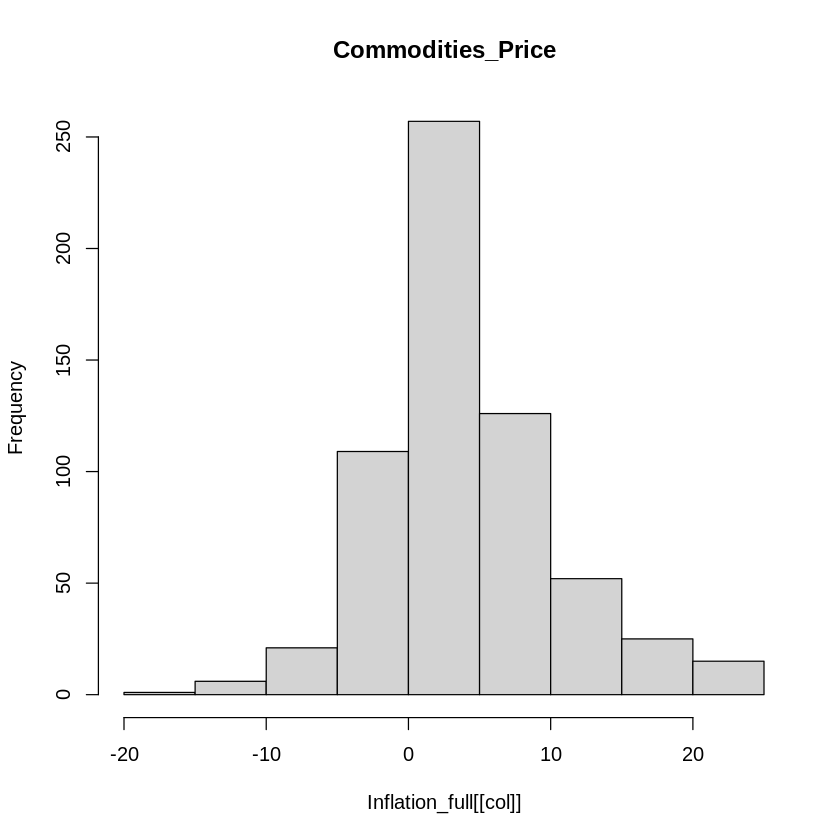

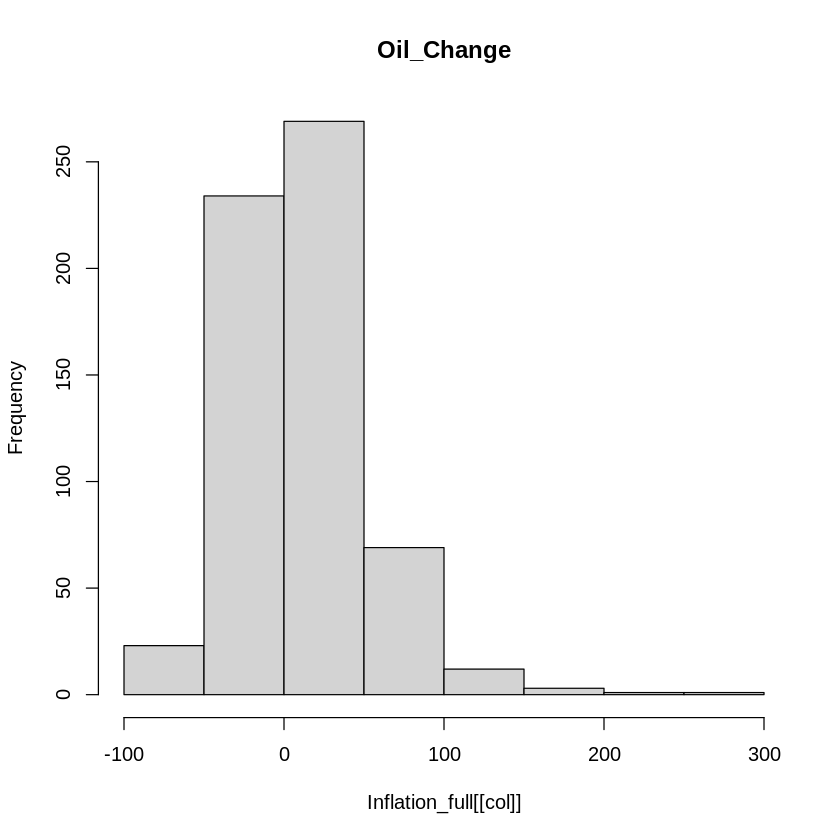

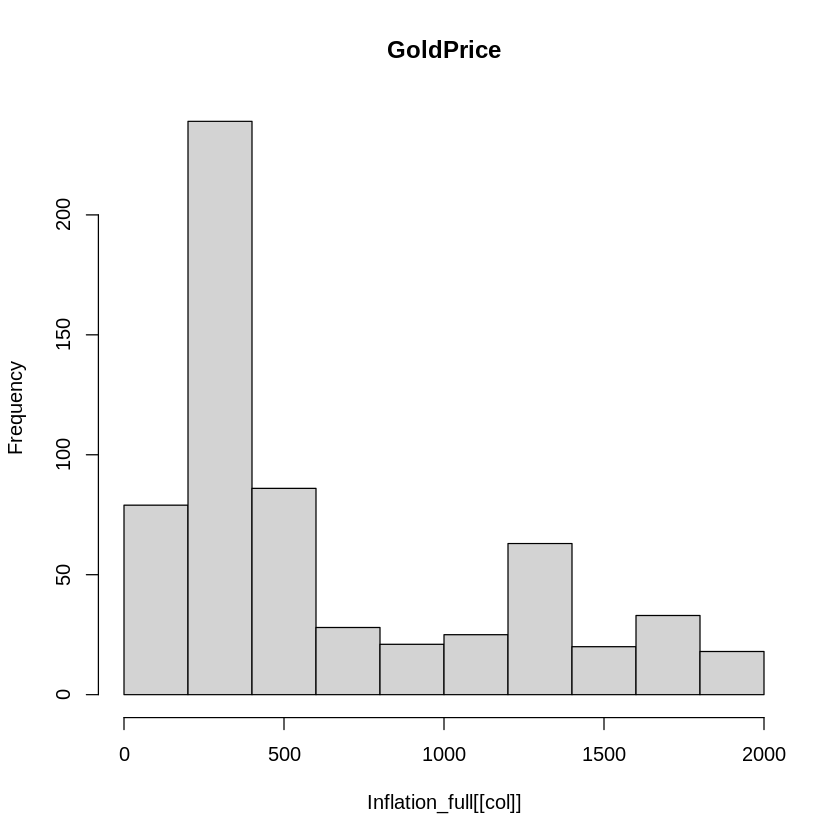

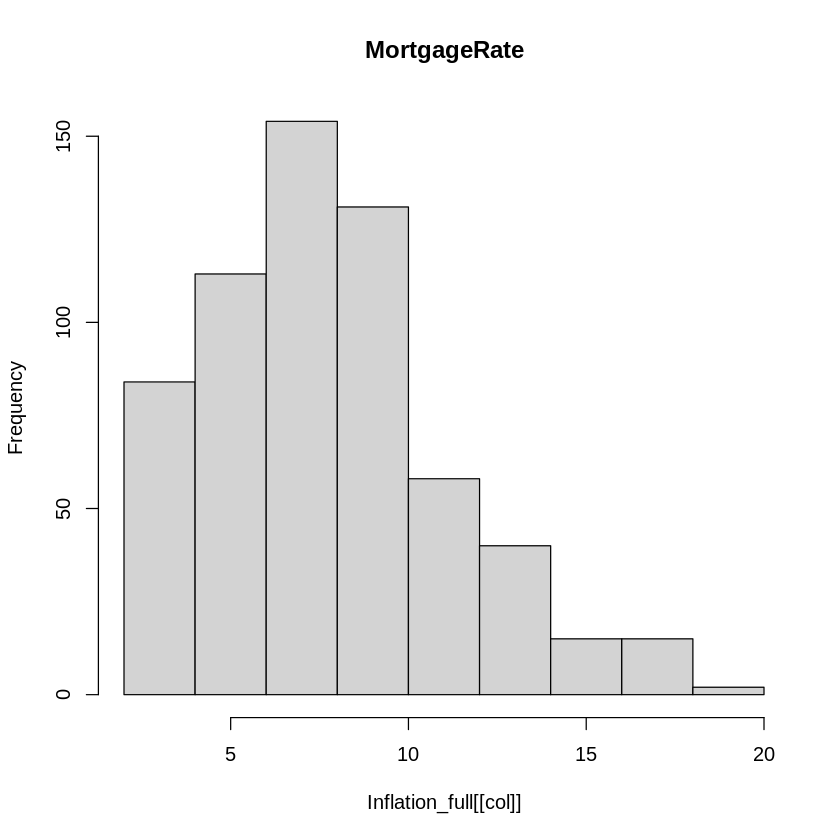

In [83]:
#Loop through columns and create histograms for numeric columns
for (col in names(Inflation_full)) {
  if (is.numeric(Inflation_full[[col]])) {
    hist(Inflation_full[[col]], main = col)
  }
}

**Lag Plot**

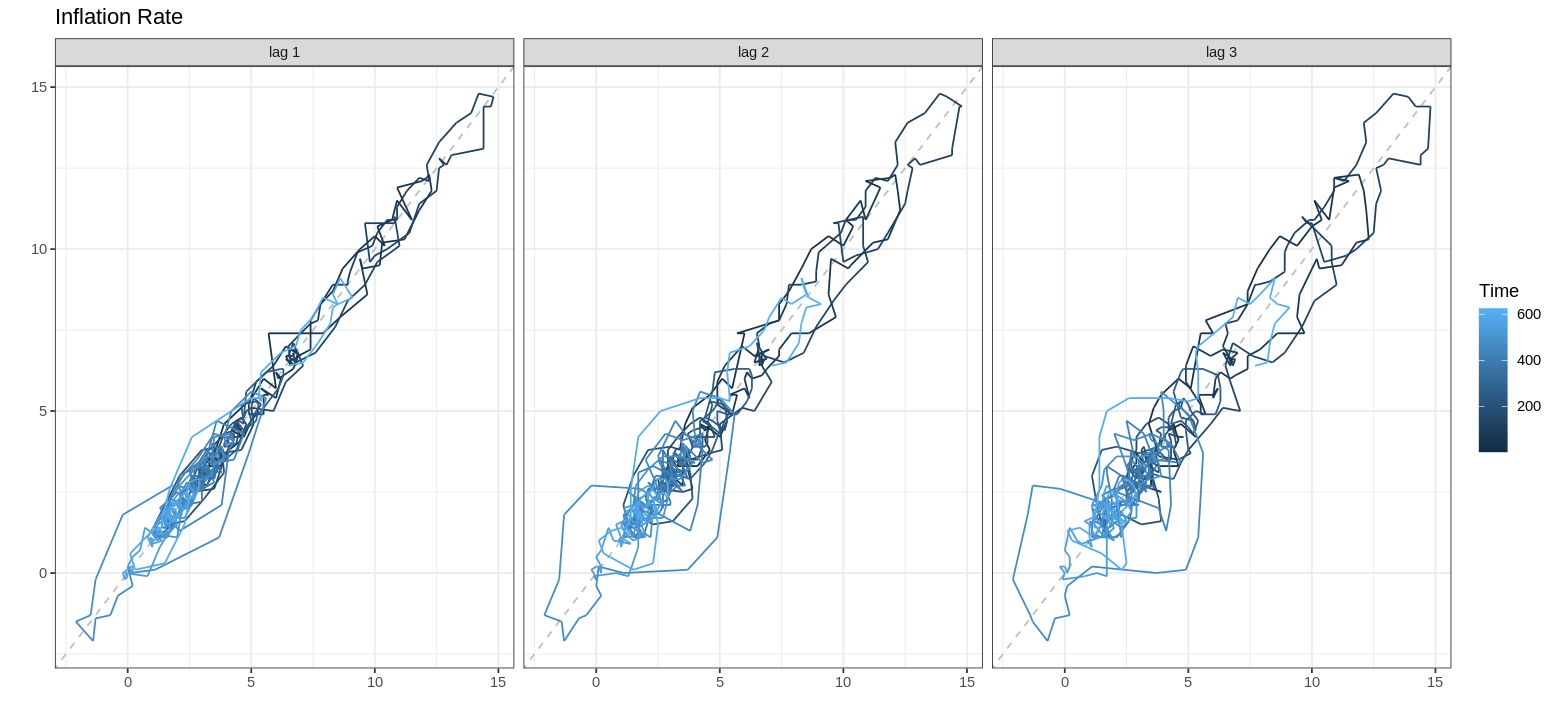

In [84]:
fig(13,6)
gglagplot(Inflation_long$Rate, lags=3, seasonal=FALSE) + theme_bw() + labs(title="Inflation Rate")

We can see that these lag plots of inflation rate seems to be similar. 

***Correlation Matrix***

In [85]:
Inflation_filtered <- Inflation_full[, c('Rate', 'FEDFUNDS', 'M1_change', 'Unemployment', 'UMCSENT', 'Commodities_Price', 'Oil_Change', 'GoldPrice', 'MortgageRate')]

In [86]:
# Generate a correlation matrix for numeric columns in a dataset
corr_matrix <- cor(Inflation_filtered[, sapply(Inflation_filtered, is.numeric)])

In [87]:
#display correlation matrix
corr_matrix

Rate        FEDFUNDS    M1_change    Unemployment
Rate               1.00000000  0.69738339  0.156230836  0.05405995 
FEDFUNDS           0.69738339  1.00000000  0.172622481  0.08786582 
M1_change          0.15623084  0.17262248  1.000000000  0.16559405 
Unemployment       0.05405995  0.08786582  0.165594054  1.00000000 
UMCSENT           -0.51860347 -0.10083166  0.009985868 -0.44703567 
Commodities_Price  0.75501204  0.29749589 -0.007362497 -0.14850799 
Oil_Change         0.41929071  0.10465989 -0.068480686 -0.18791260 
GoldPrice         -0.28866439 -0.61125838  0.039239896  0.02302096 
MortgageRate       0.59281775  0.92132661  0.104740273  0.29033226 
                  UMCSENT      Commodities_Price Oil_Change  GoldPrice  
Rate              -0.518603473  0.755012042       0.41929071 -0.28866439
FEDFUNDS          -0.100831658  0.297495889       0.10465989 -0.61125838
M1_change          0.009985868 -0.007362497      -0.06848069  0.03923990
Unemployment      -0.447035667 -0.148507993      -0.18791260  0.02302096
UMCSENT            1.000000000 -0.452393774      -0.16176859 -0.23463179
Commodities_Price -0.452393774  1.000000000       0.71238529 -0.01256251
Oil_Change        -0.161768589  0.712385286       1.00000000  0.05642473
GoldPrice         -0.234631789 -0.012562512       0.05642473  1.00000000
MortgageRate      -0.105028656  0.158668128       0.02772251 -0.64158031
                  MortgageRate
Rate               0.59281775 
FEDFUNDS           0.92132661 
M1_change          0.10474027 
Unemployment       0.29033226 
UMCSENT           -0.10502866 
Commodities_Price  0.15866813 
Oil_Change         0.02772251 
GoldPrice         -0.64158031 
MortgageRate       1.00000000

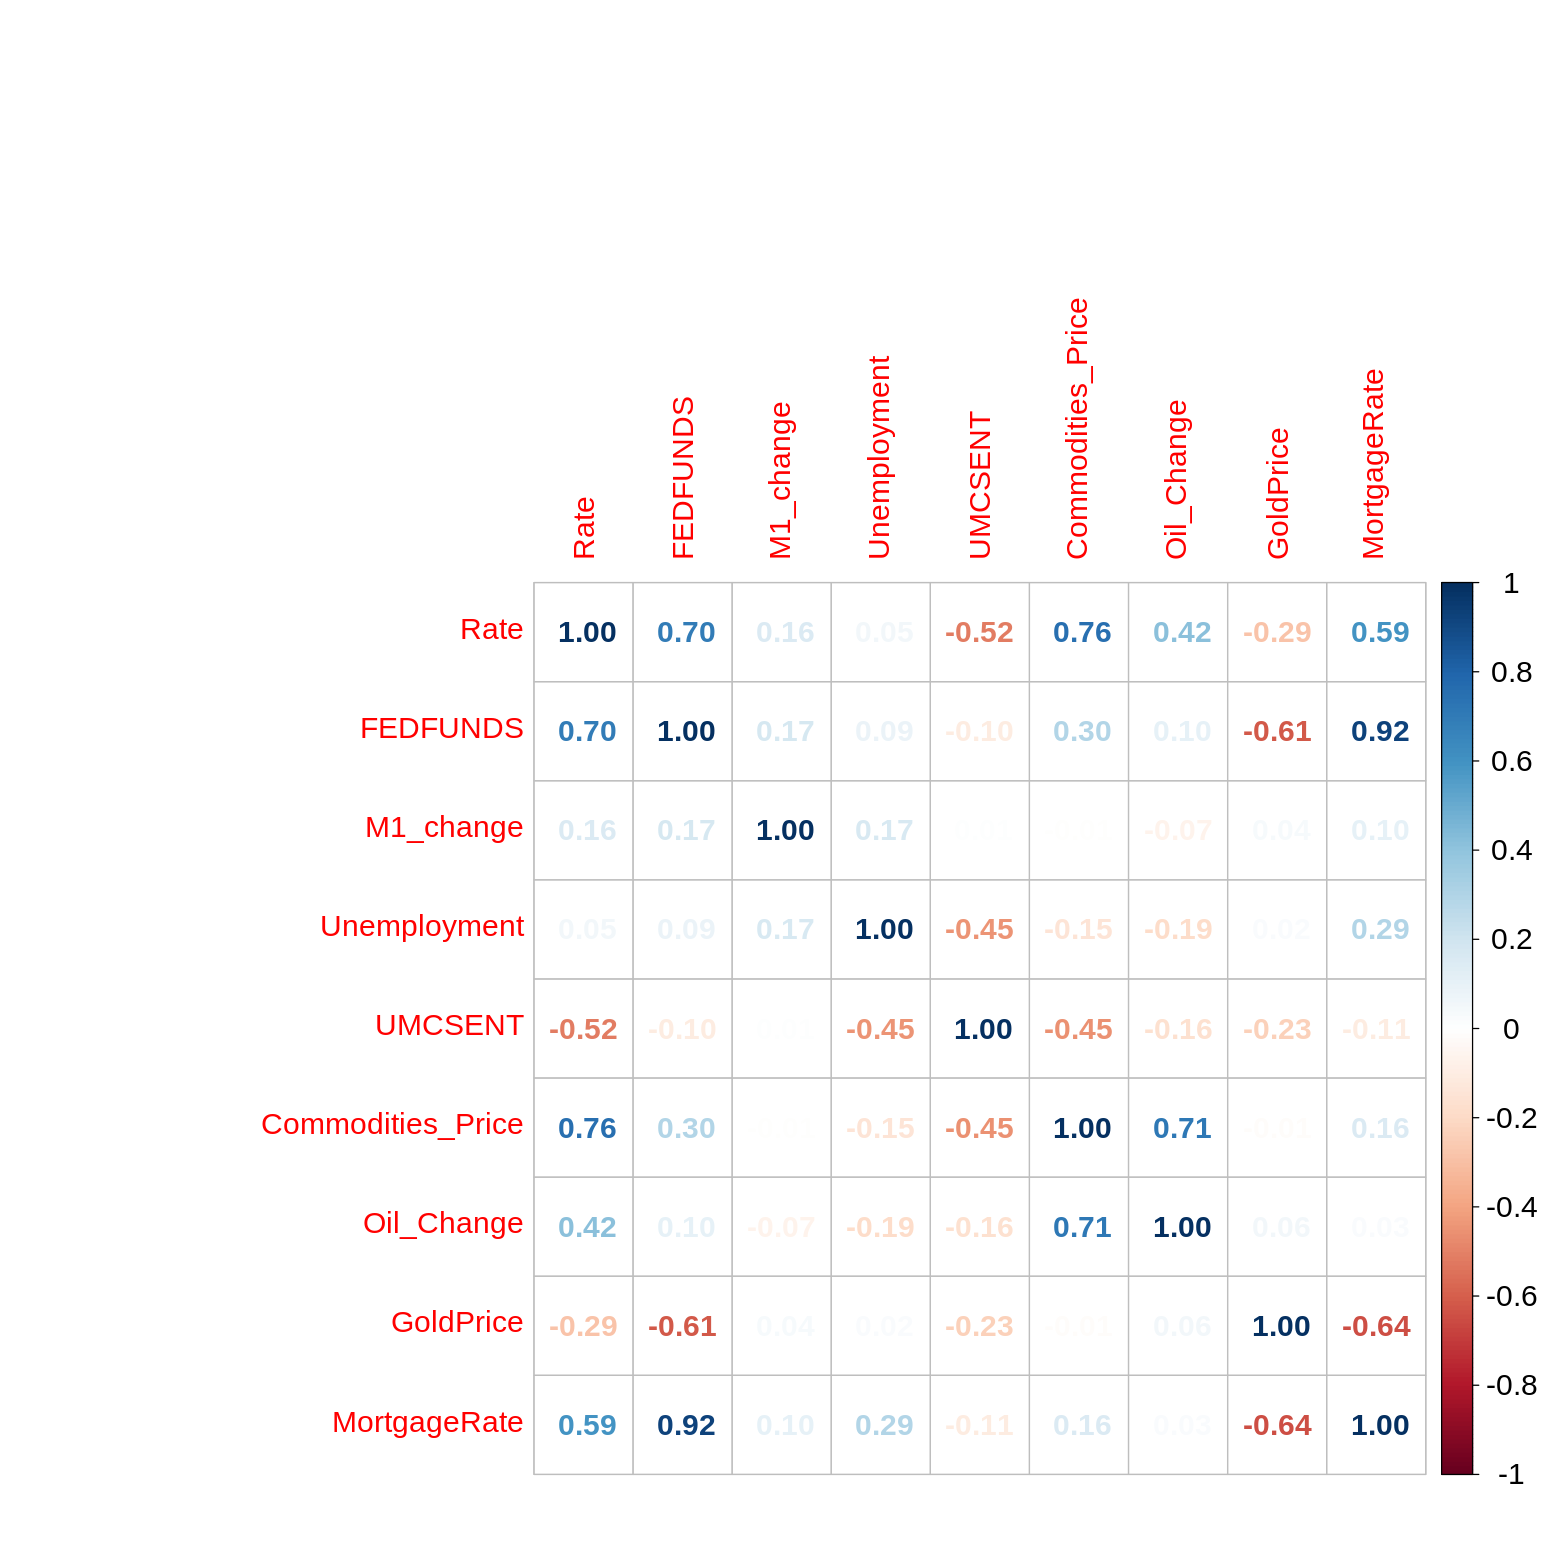

In [88]:
#suppress warnings 
options(warn=-1)

#figure size
fig(13,13)
# Create a corrplot with values
corrplot(corr_matrix, method="number", tl.cex=1.5, cl.cex=1.5, number.cex = 1.5)

***Correlation Plot with color***

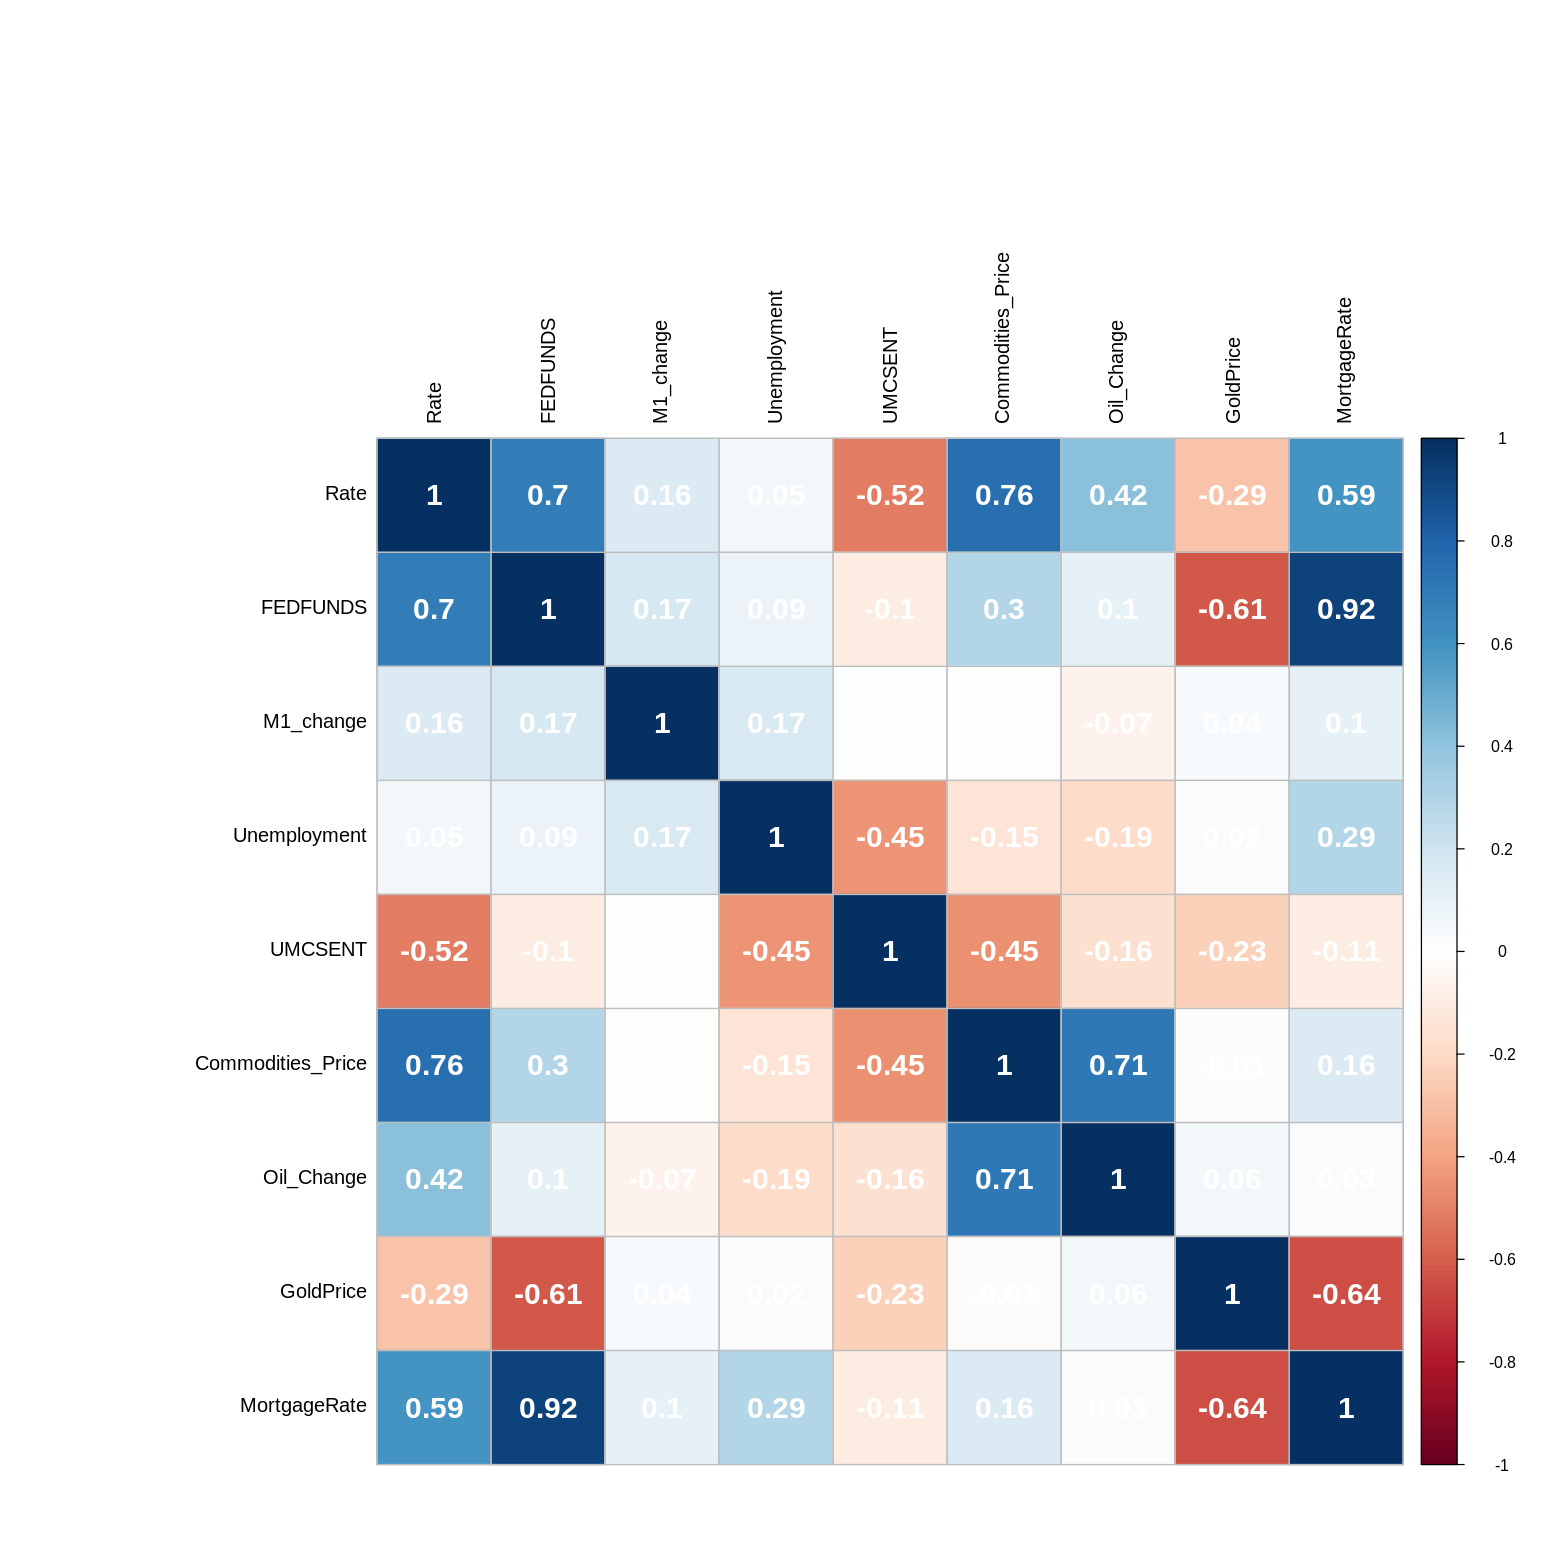

In [89]:
fig(13,13)
corrplot(corr_matrix, method="color", addCoef.col = 'white', tl.col="Black",
         tl.cex=1, addgrid.col = "gray", number.cex=1.5,
         mar=c(0.2, 0.2 ,0.2, 0.2))

From the above correlation plot, we have to see how inflation is related to all other variables. We can see that Federal Funds and commodities price is highly positively correlated with coefficients of 0.70 and 0.76. Mortgage Rate and Oil prices are moderately positively correlated with coefficients of 0.59 and 0.42. Whereas consumer sentiment and GoldPrice are negatively correlated to Inflation Rate. 

**Line Plots**

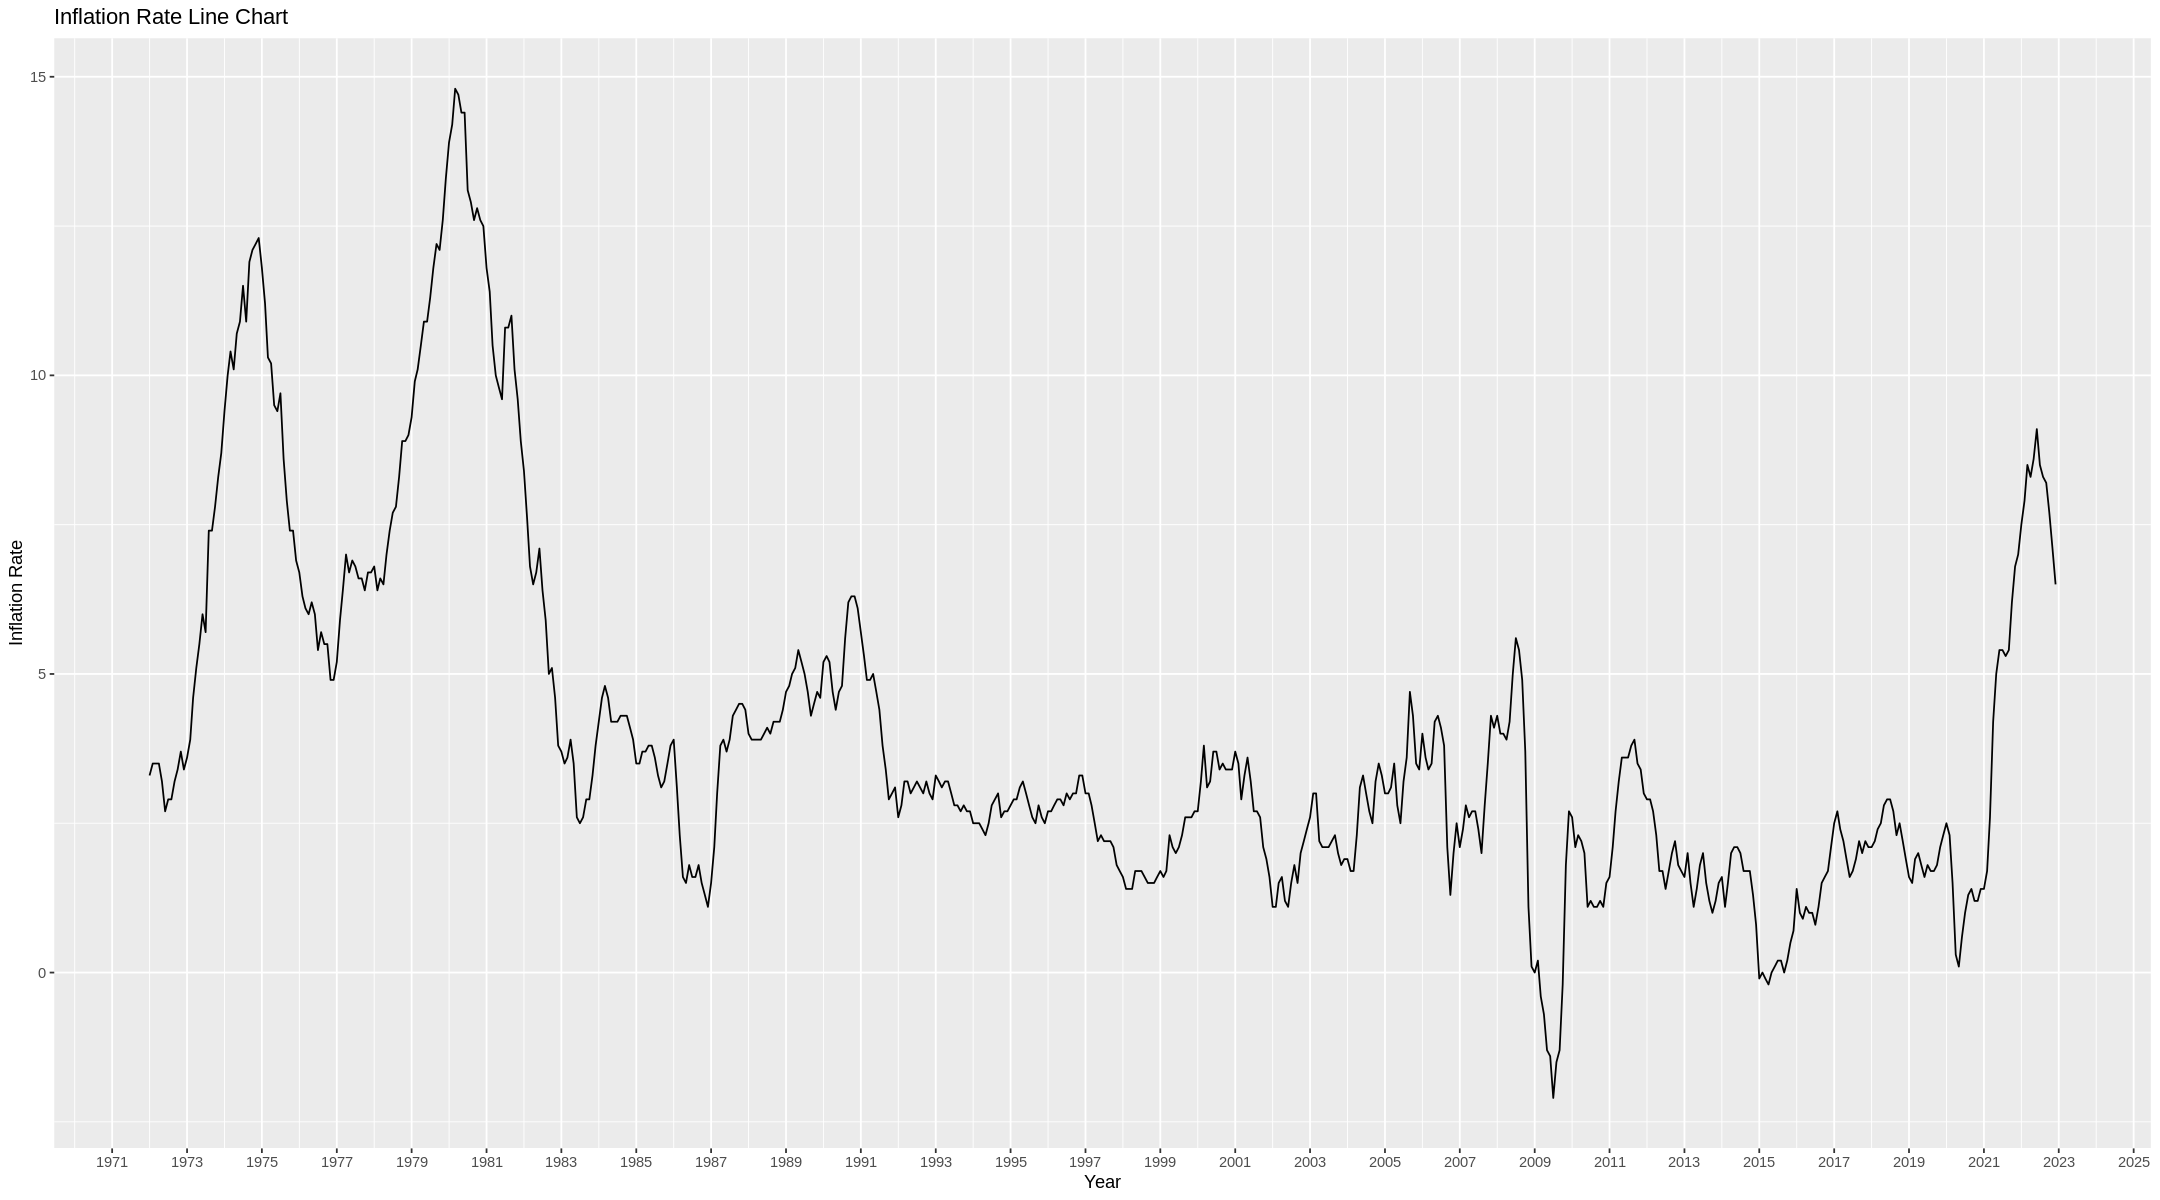

In [90]:
#basic line plot with no colors 
fig(18,10)
ggplot(data = Inflation_full, aes(x = Date, y = Rate)) + 
  geom_line() +
  scale_x_date(date_breaks = "2 year", date_labels = "%Y") +
  labs(title = "Inflation Rate Line Chart",
       x = "Year", y = "Inflation Rate")

From the year 2020, there is a drastic rise in inflation rate till mid of 2022 and now we can see that inflation rate is decreased a bit in the past few months. 

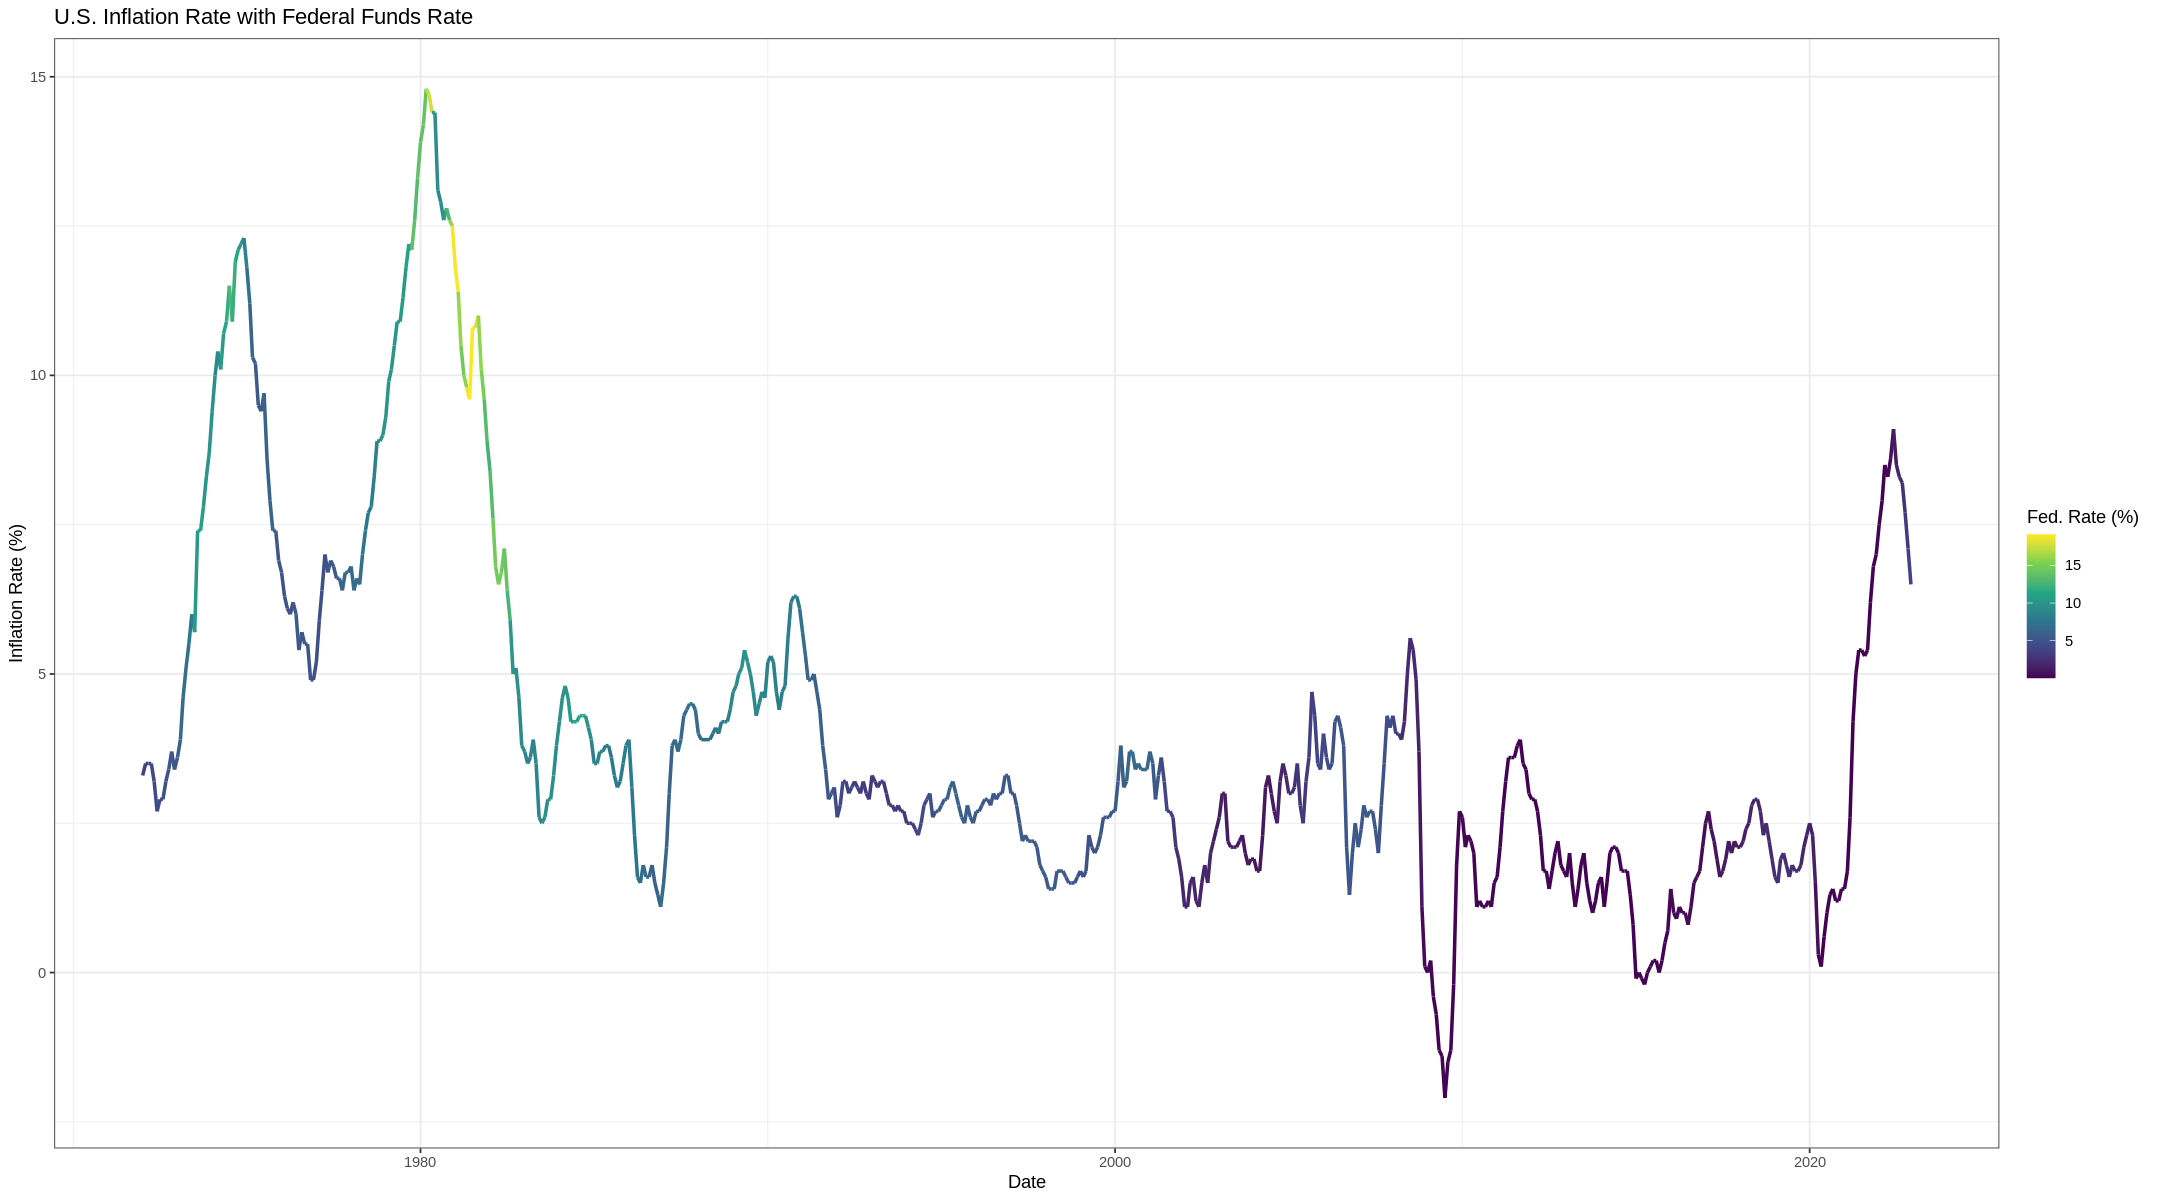

In [91]:
#line plots with color
ggplot(data=Inflation_full, mapping=aes(x=Date, Rate)) + 
  geom_line(mapping=aes(col=`FEDFUNDS`), size=1) +
  theme_bw() + labs(title="U.S. Inflation Rate with Federal Funds Rate",
                    y="Inflation Rate (%)") +
  scale_colour_viridis_c(name="Fed. Rate (%)")

Based on the above plot, it is clear that when Inflation is up, federal rate is up. 

In [92]:
install.packages("plotly")
library(plotly)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’



Attaching package: ‘plotly’


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [95]:
library(ggplot2)
library(dplyr)

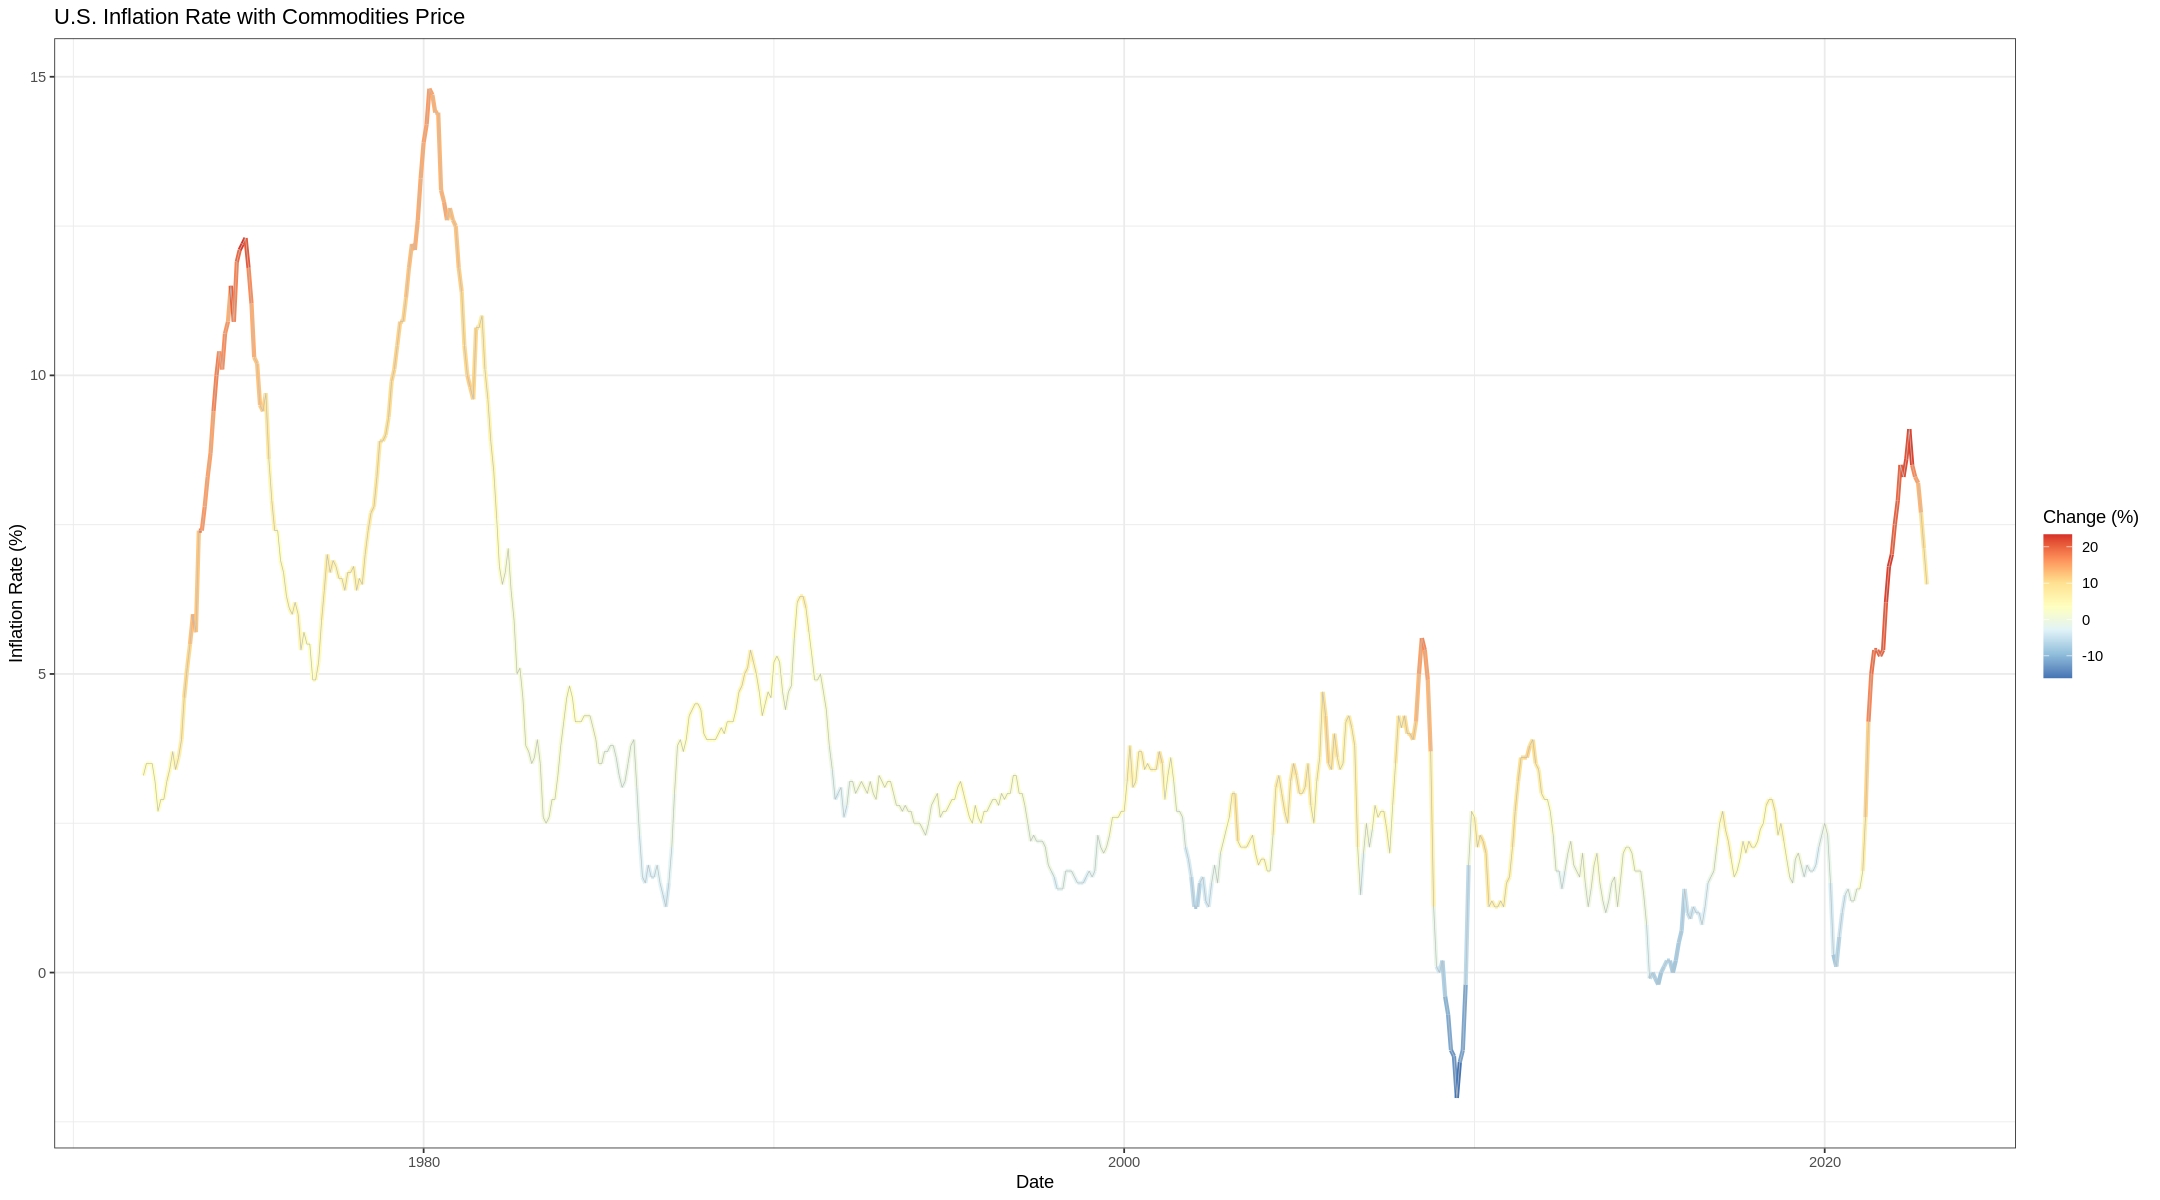

In [98]:
ggplot(data=Inflation_full, mapping=aes(x=Date, Rate)) + 
  geom_line(mapping=aes(col=`Commodities_Price`), size=1.2) +
  geom_line(size=0.2, col="gray") +
  theme_bw() + labs(title="U.S. Inflation Rate with Commodities Price",
                    y="Inflation Rate (%)") +
  scale_color_distiller(name="Change (%)", palette="RdYlBu")

It is also proven from this plot that commodities price has a highly positive correlation with Inflation rate because when Inflation rise commodities price also rise.

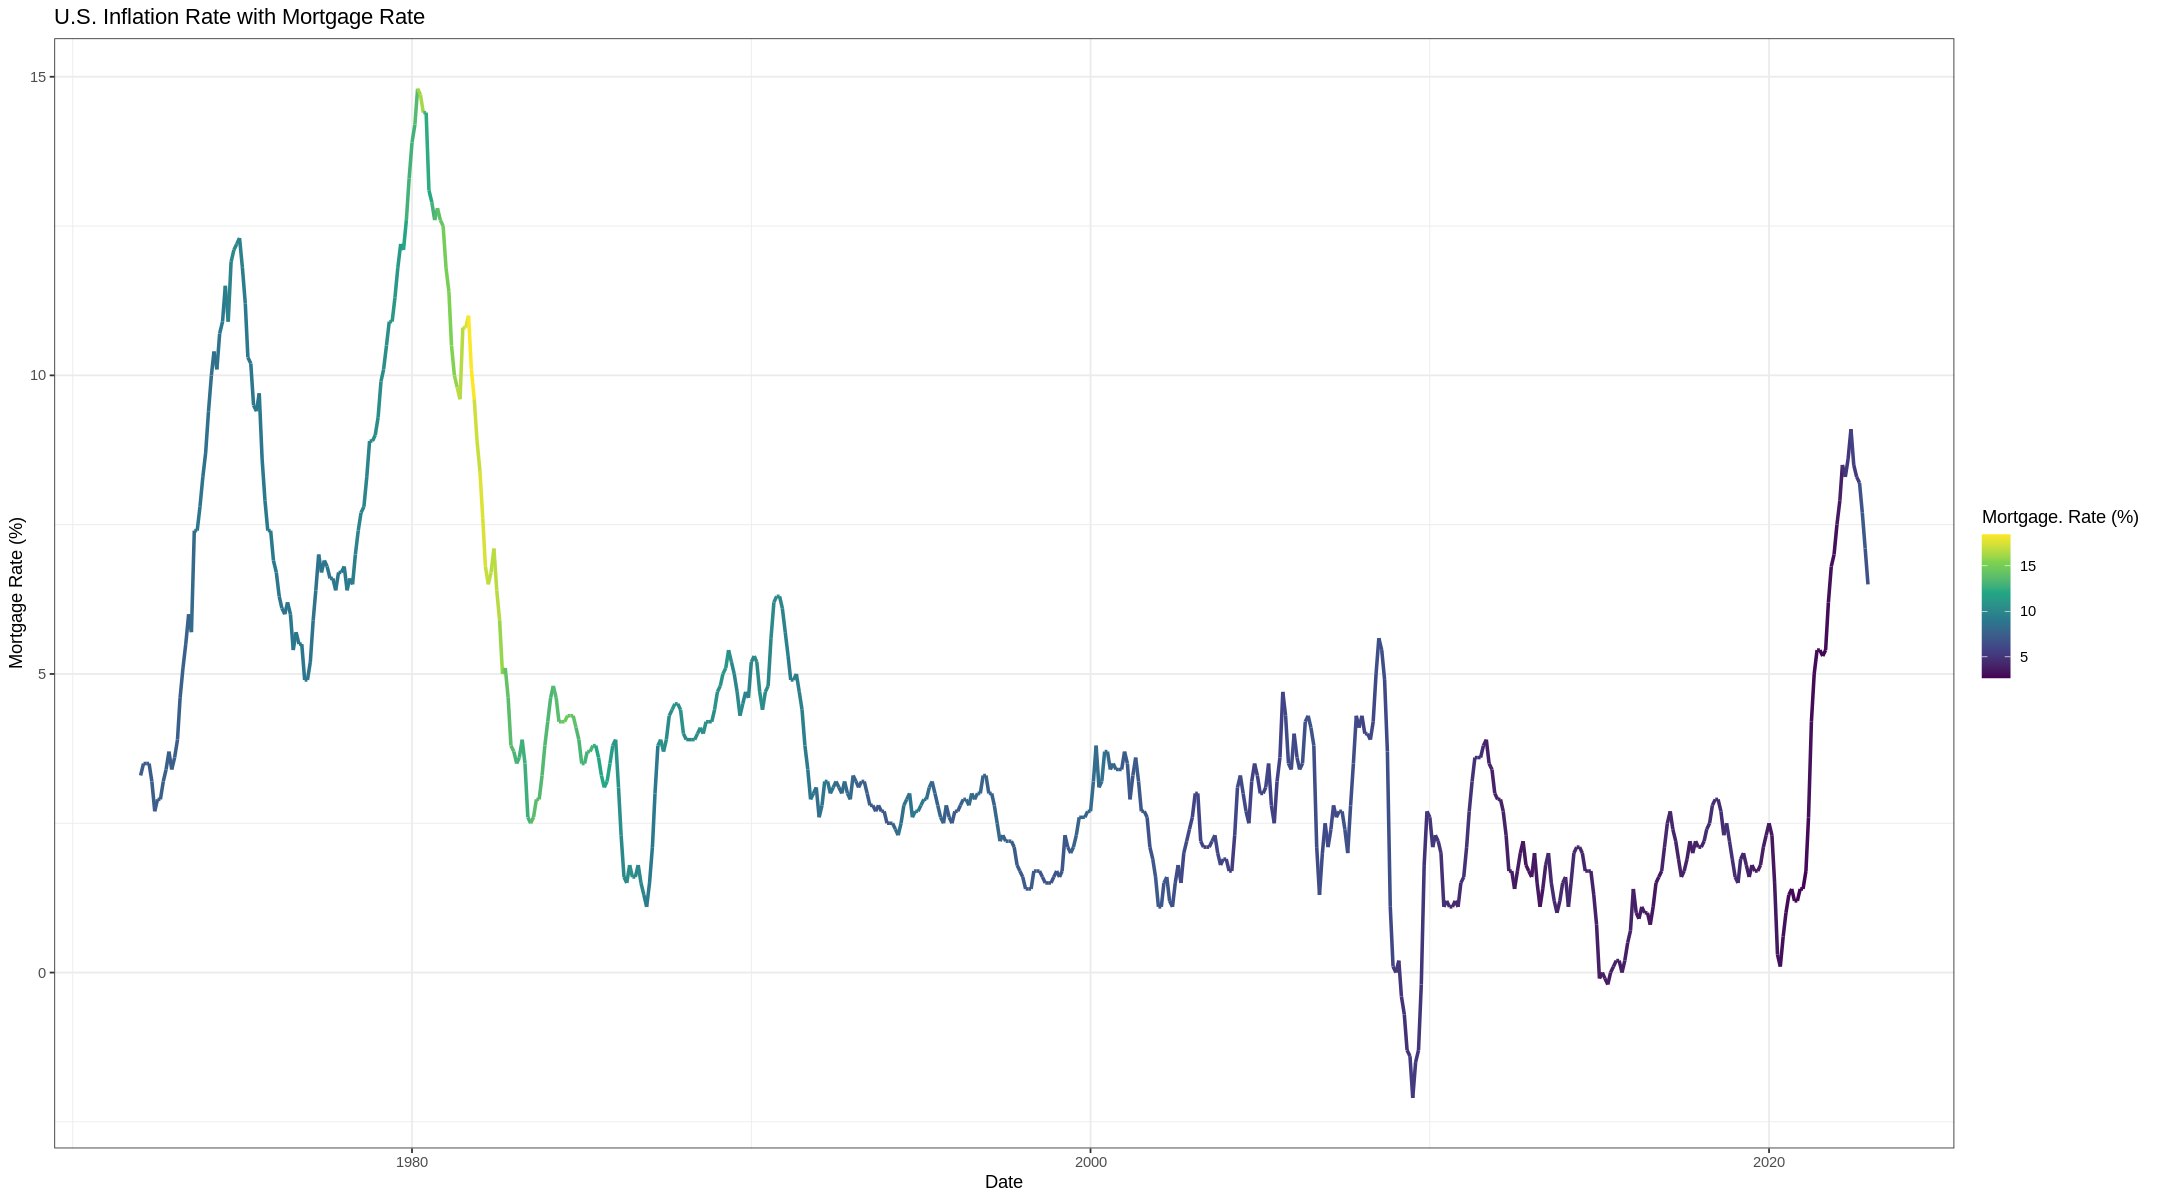

In [99]:
ggplot(data=Inflation_full, mapping=aes(x=Date, Rate)) + 
  geom_line(mapping=aes(col=`MortgageRate`), size=1) +
  theme_bw() + labs(title="U.S. Inflation Rate with Mortgage Rate",
                    y="Mortgage Rate (%)") +
  scale_colour_viridis_c(name="Mortgage. Rate (%)")

We can see that mortgage rate sometimes rises and sometimes drops at inflation peak. So, it is clear that effect on mortgage rate is not completely dependent on inflation and inflation only has a moderate effect on mortgage rate.

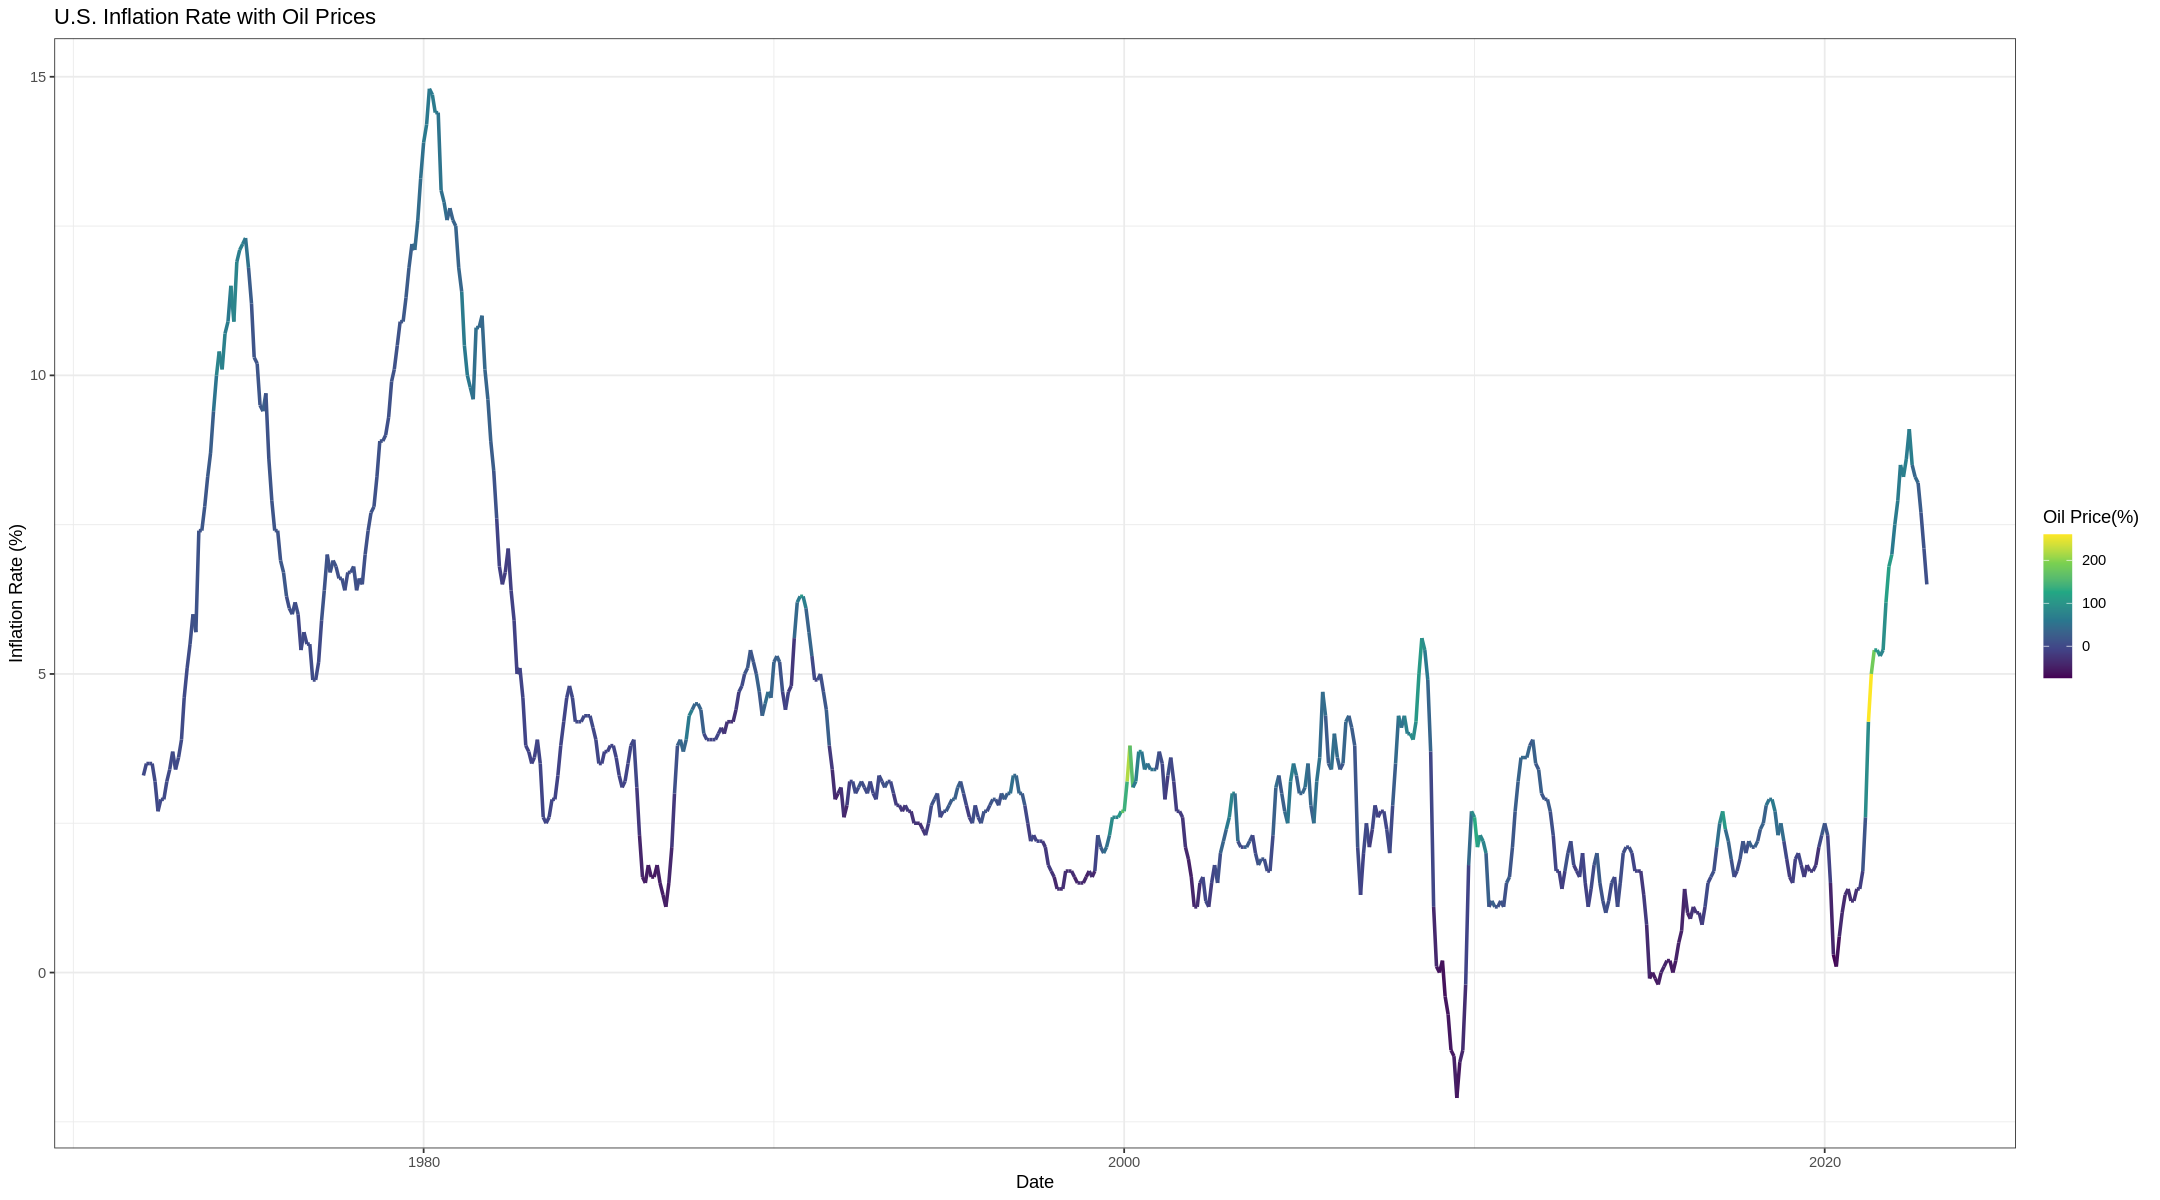

In [100]:
ggplot(data=Inflation_full, mapping=aes(x=Date, Rate)) + 
  geom_line(mapping=aes(col=`Oil_Change`), size=1) +
  theme_bw() + labs(title="U.S. Inflation Rate with Oil Prices",
                    y="Inflation Rate (%)") +
  scale_colour_viridis_c(name="Oil Price(%)")

There is only a slight increase in oil prices at the peak of inflation and drops when inflation rate decreases. But as we can see like mortgage rate, oil prices also have moderate effect due to inflation rate. 

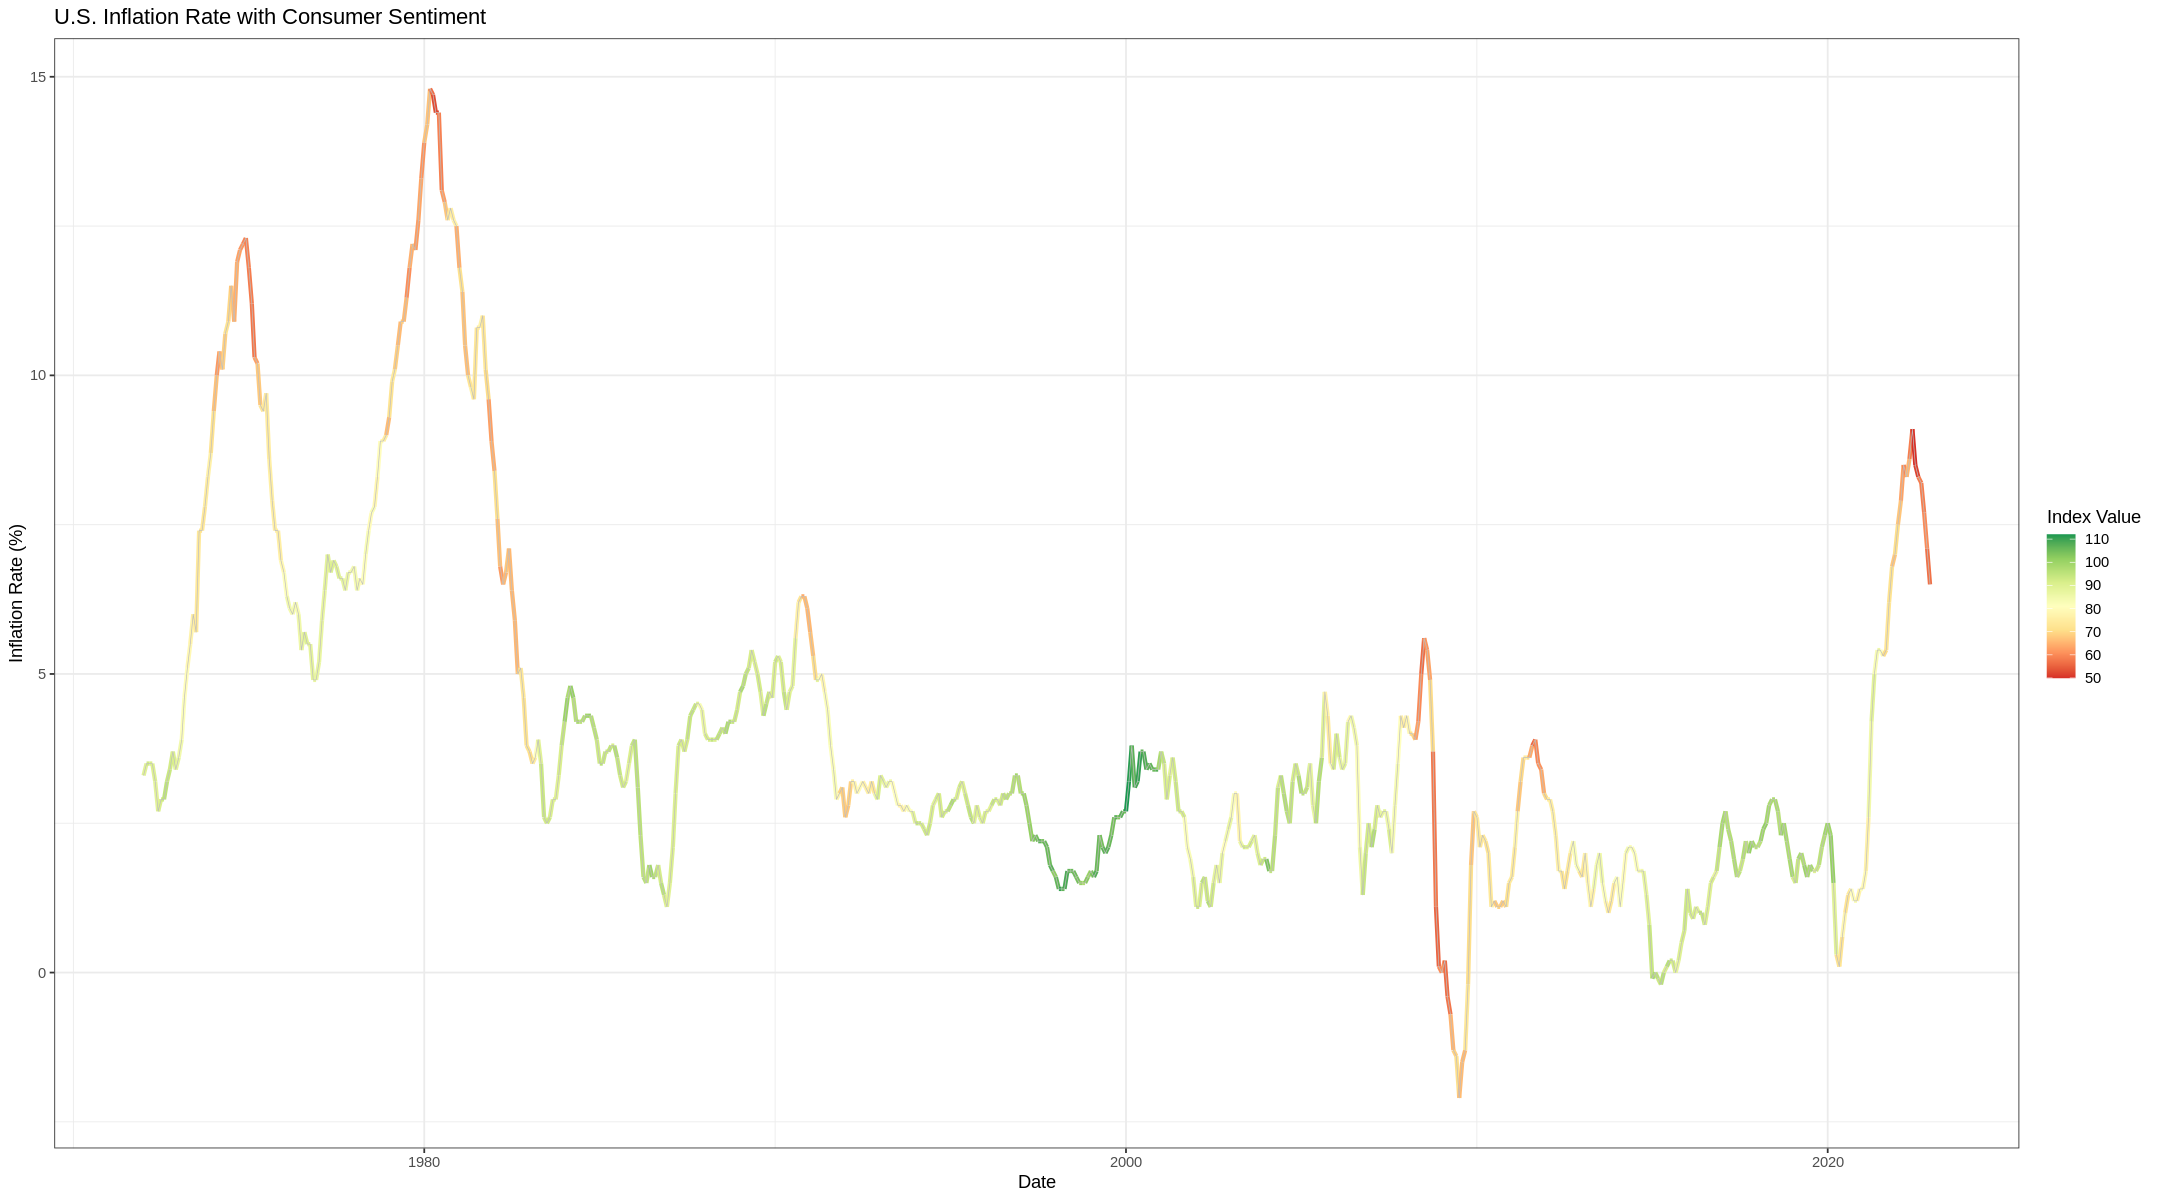

In [101]:
ggplot(data=Inflation_full, mapping=aes(x=Date, Rate)) + 
  geom_line(mapping=aes(col=`UMCSENT`), size=1.2) +
  geom_line(size=0.2, col="gray") +
  theme_bw() + labs(title="U.S. Inflation Rate with Consumer Sentiment",
                    y="Inflation Rate (%)") +
  scale_color_distiller(name="Index Value", palette="RdYlGn", direction=1)

We can see that consumer sentiment drops at the peaks of Inflation but not at normal rise in inflation rates. 

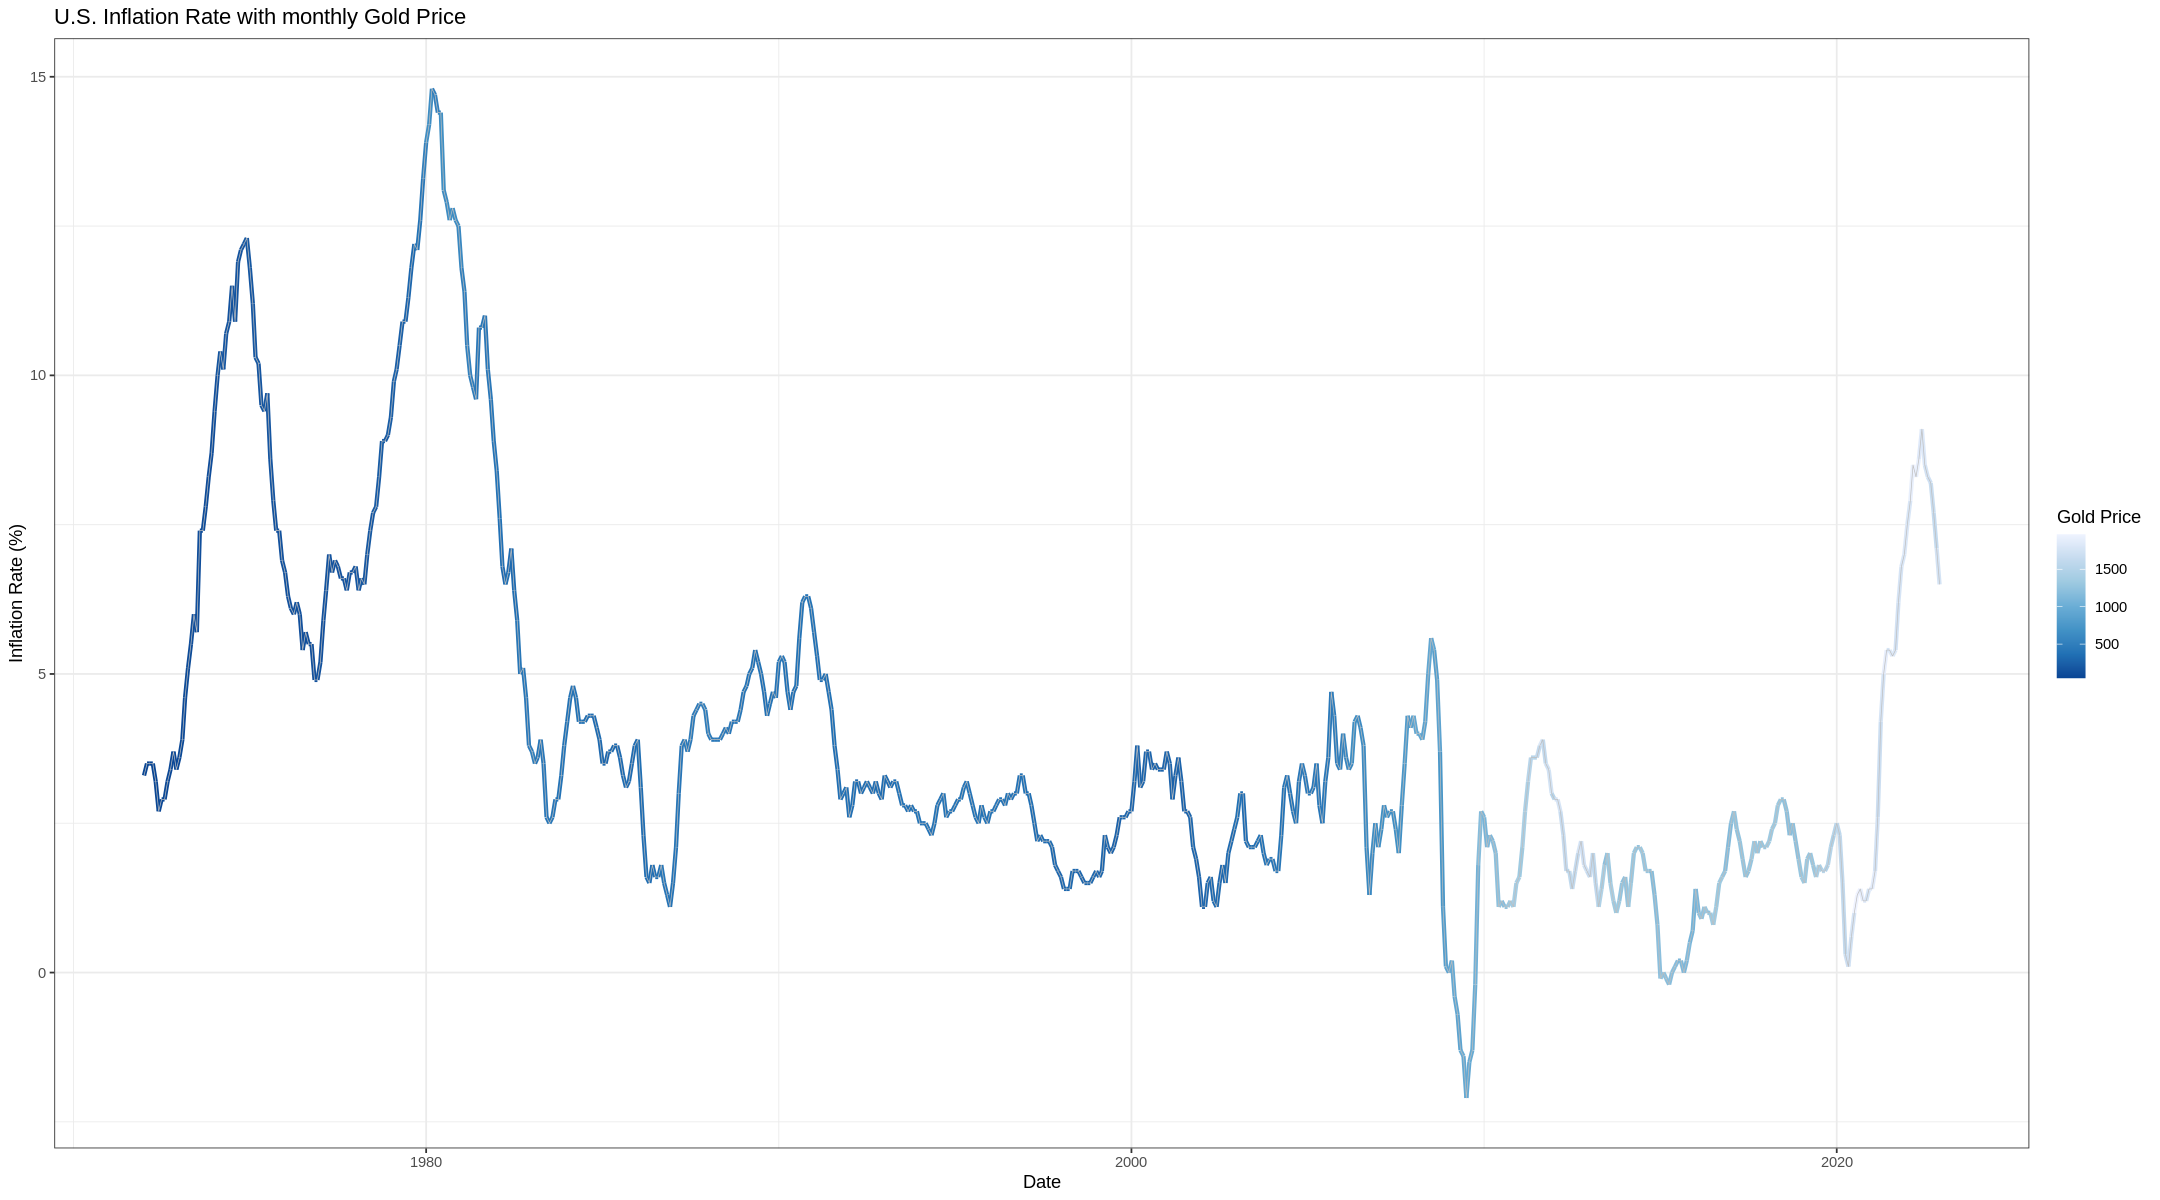

In [102]:
ggplot(data=Inflation_full, mapping=aes(x=Date, Rate)) + 
  geom_line(mapping=aes(col=`GoldPrice`), size=1.2) +
  geom_line(size=0.2, col="gray") +
  theme_bw() + labs(title="U.S. Inflation Rate with monthly Gold Price",
                    y="Inflation Rate (%)") + scale_color_distiller(name="Gold Price")

Based on the plot, it is clear that gold prices are decreasing when inflation is up and increasing when inflation is down but still we can see there is only moderate relation between both of them.

In [103]:
install.packages("patchwork")
library(patchwork) # To display 2 charts together

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘patchwork’


The following object is masked from ‘package:MASS’:

    area




In [104]:
install.packages("hrbrthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘triebeard’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘urltools’, ‘httpcode’, ‘shiny’, ‘crul’, ‘fontBitstreamVera’, ‘fontLiberation’, ‘extrafontdb’, ‘Rttf2pt1’, ‘gfonts’, ‘fontquiver’, ‘extrafont’, ‘gdtools’




In [105]:
install.packages('https://cran.r-project.org/src/contrib/Archive/hrbrthemes/hrbrthemes_0.1.0.tar.gz', type='source', repos=NULL)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [106]:
install.packages("ggthemes")
library(ggthemes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



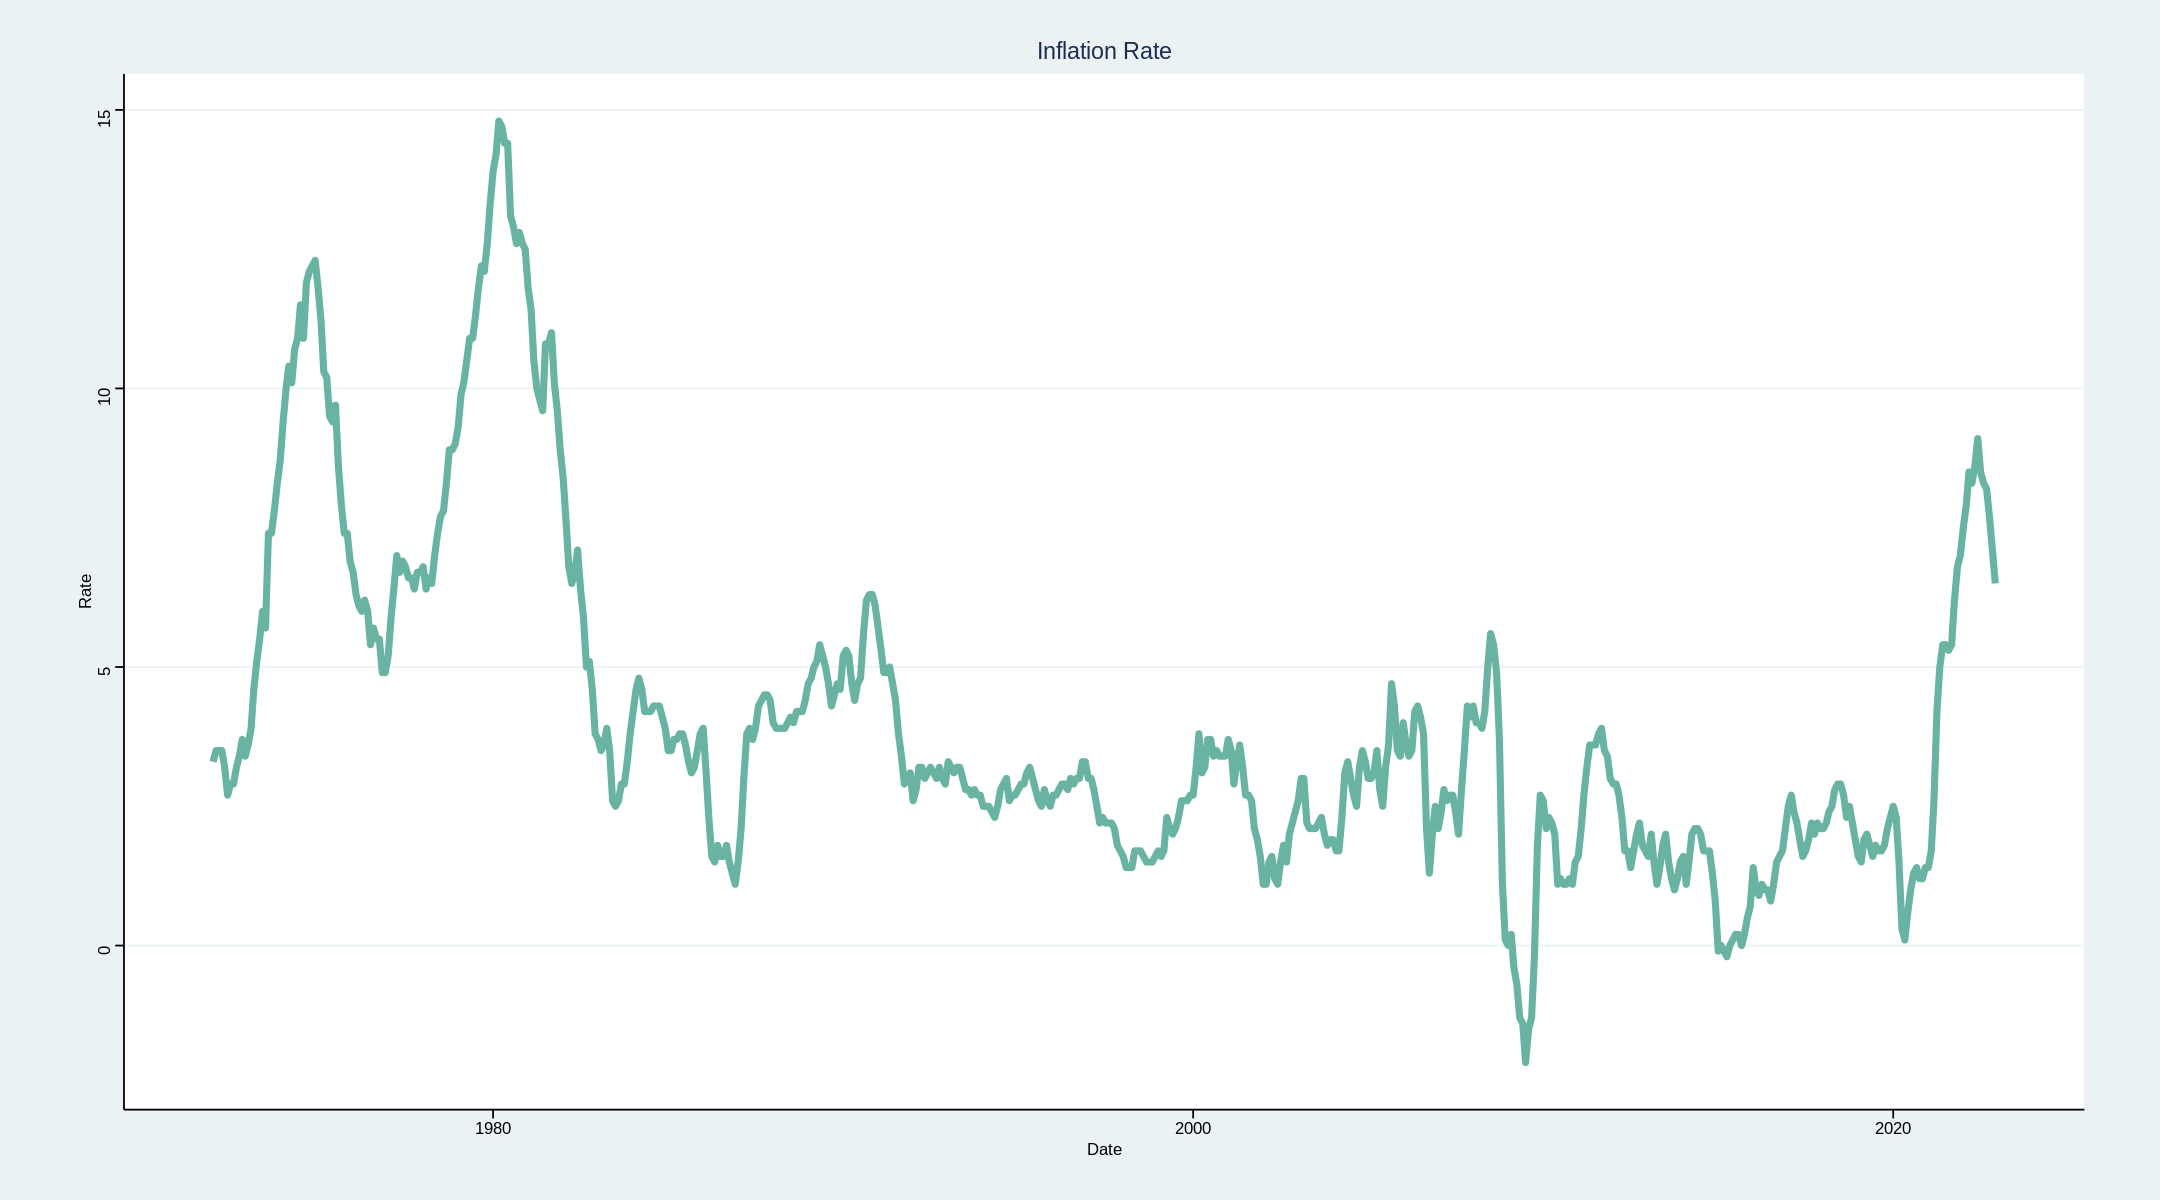

In [107]:
# basic line chart for Inflation Rate
library(ggthemes)
p1 <- ggplot(Inflation_full, aes(x=Date, y=Rate)) +
  geom_line(color="#69b3a2", size=2) +
  ggtitle("Inflation Rate") + theme_stata()

p1

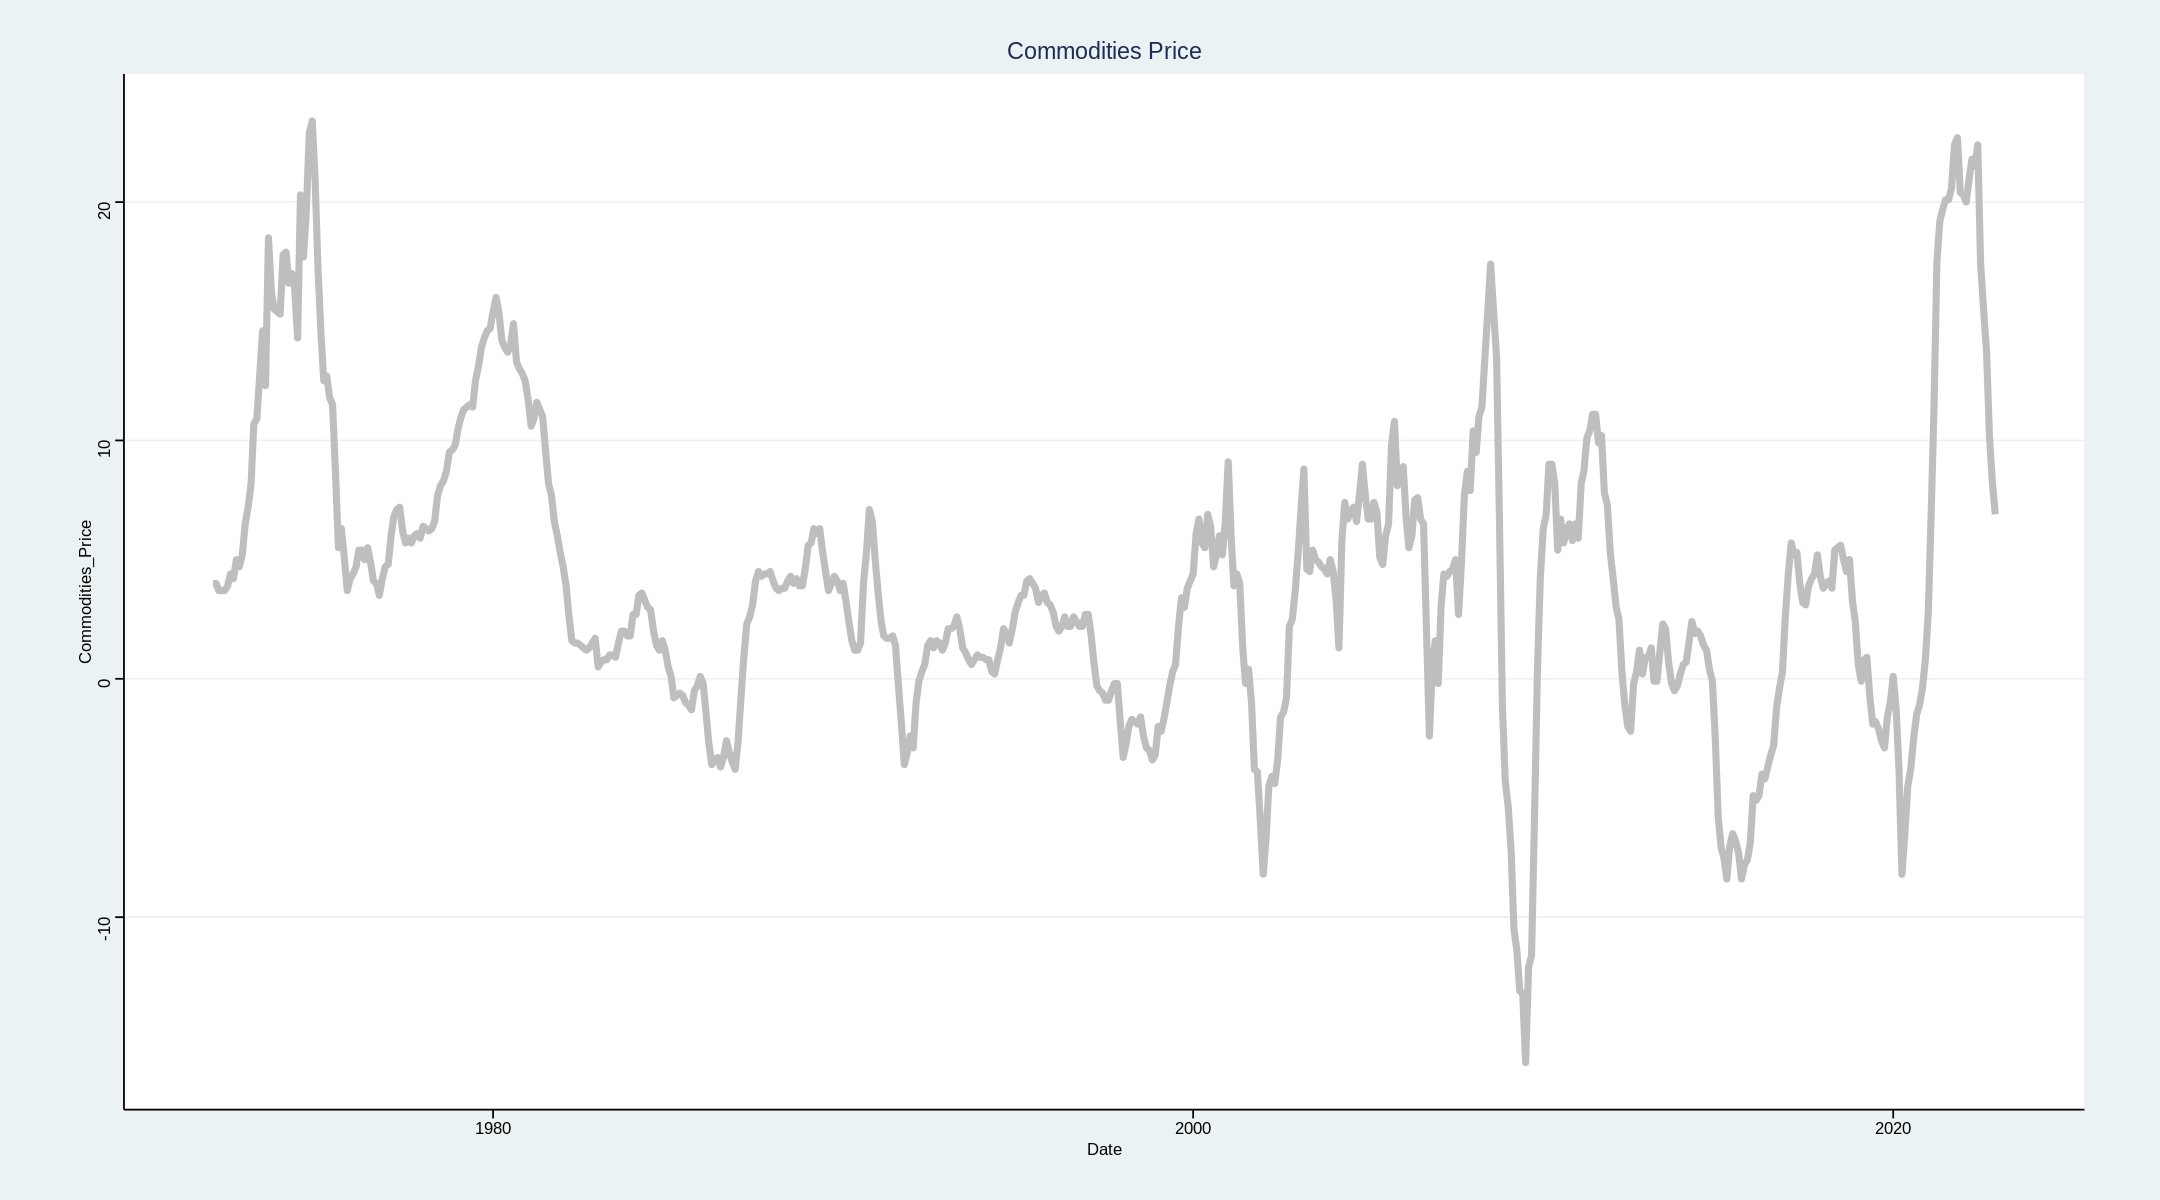

In [108]:
#line chart for Commodities price
p2 <- ggplot(Inflation_full, aes(x=Date, y=Commodities_Price)) +
  geom_line(color="grey",size=2) +
  ggtitle("Commodities Price") +
  theme_stata()

p2

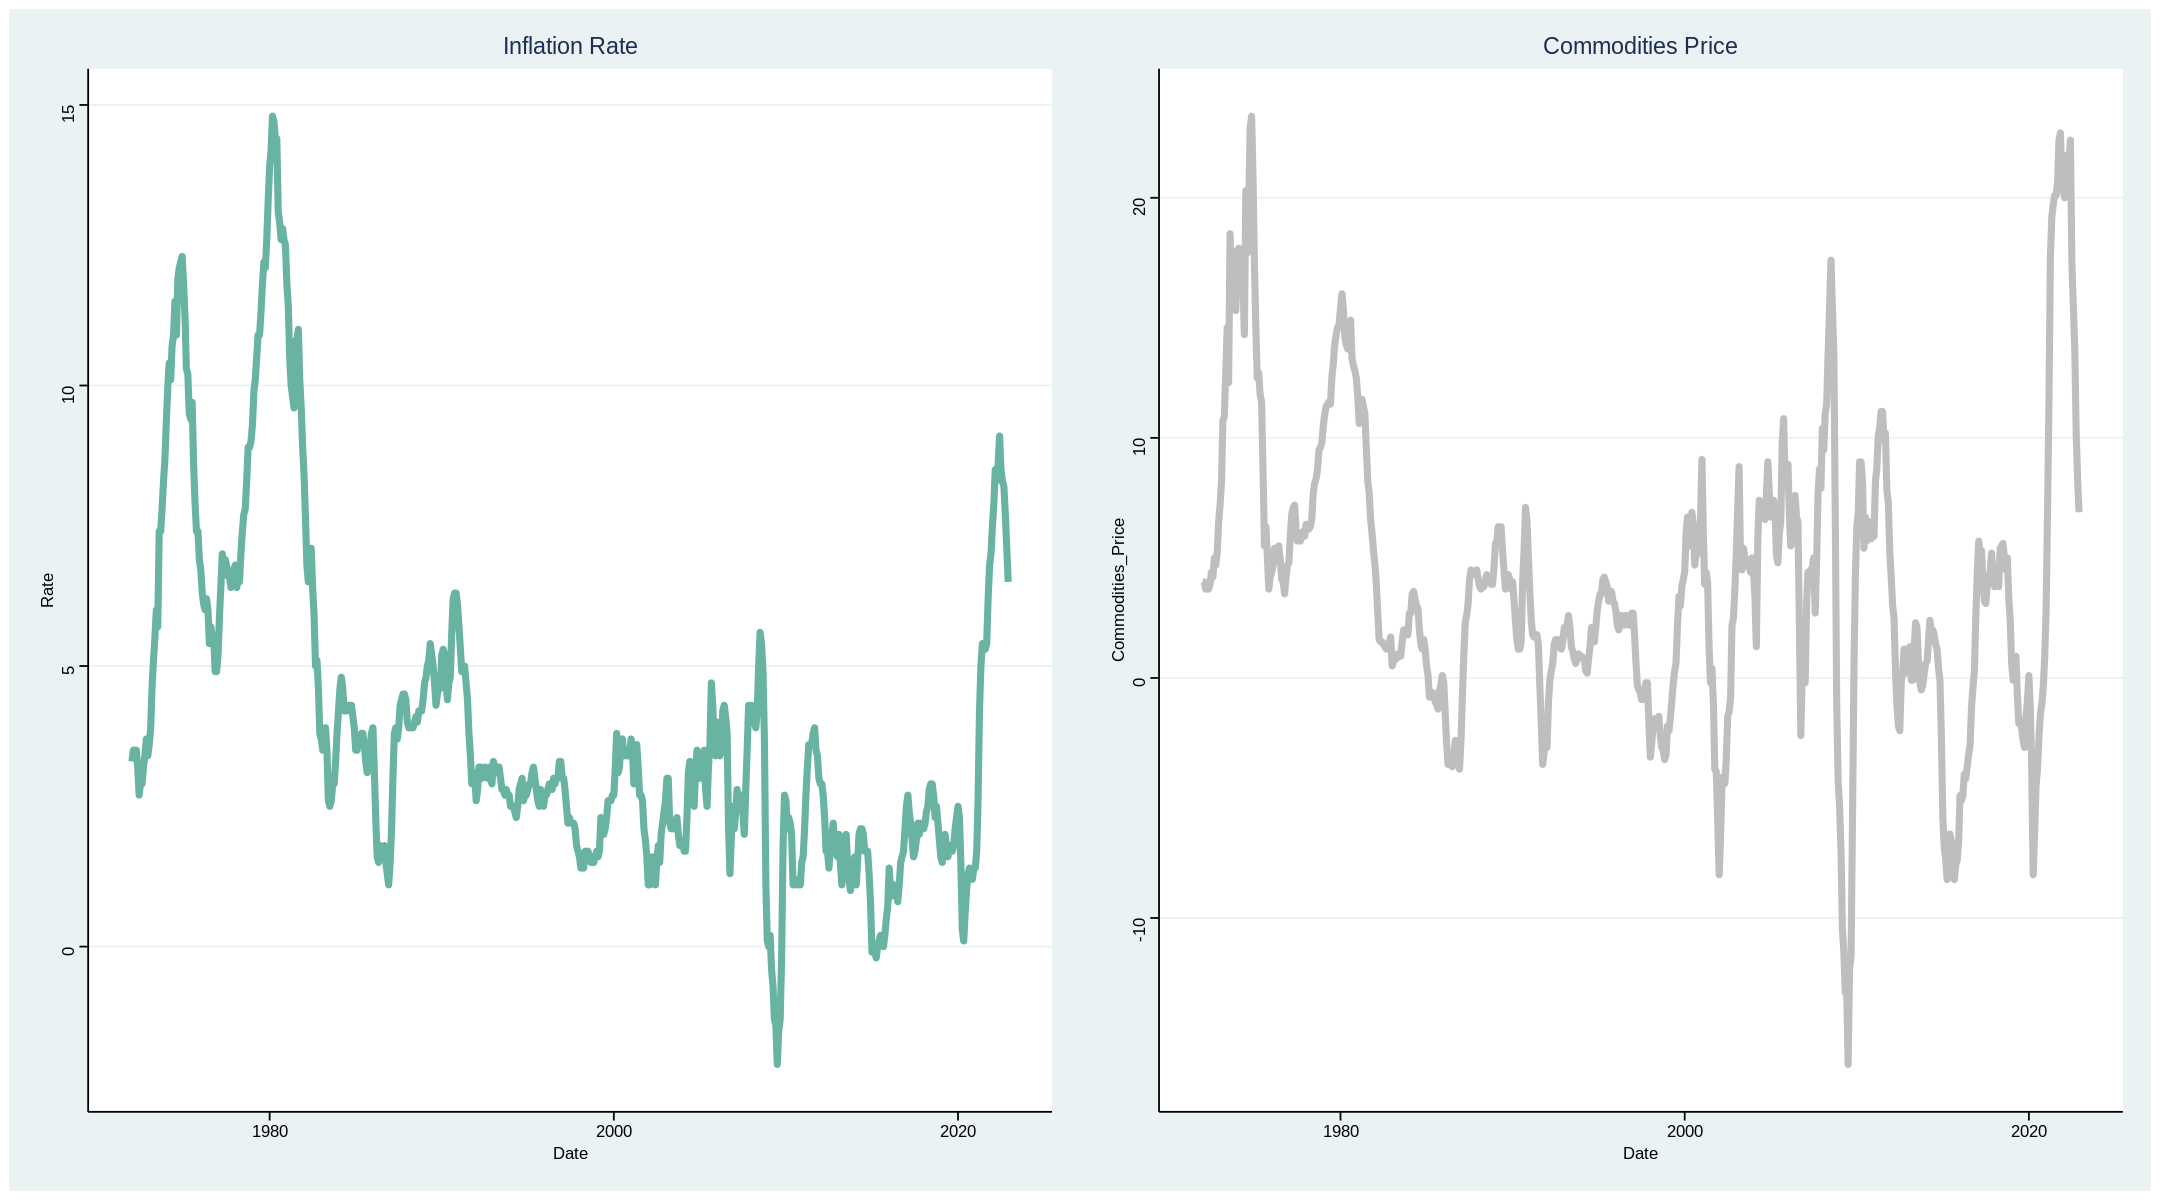

In [109]:
#combining both line charts
p1+p2

**Overlapping two Line charts without Y axis customization**

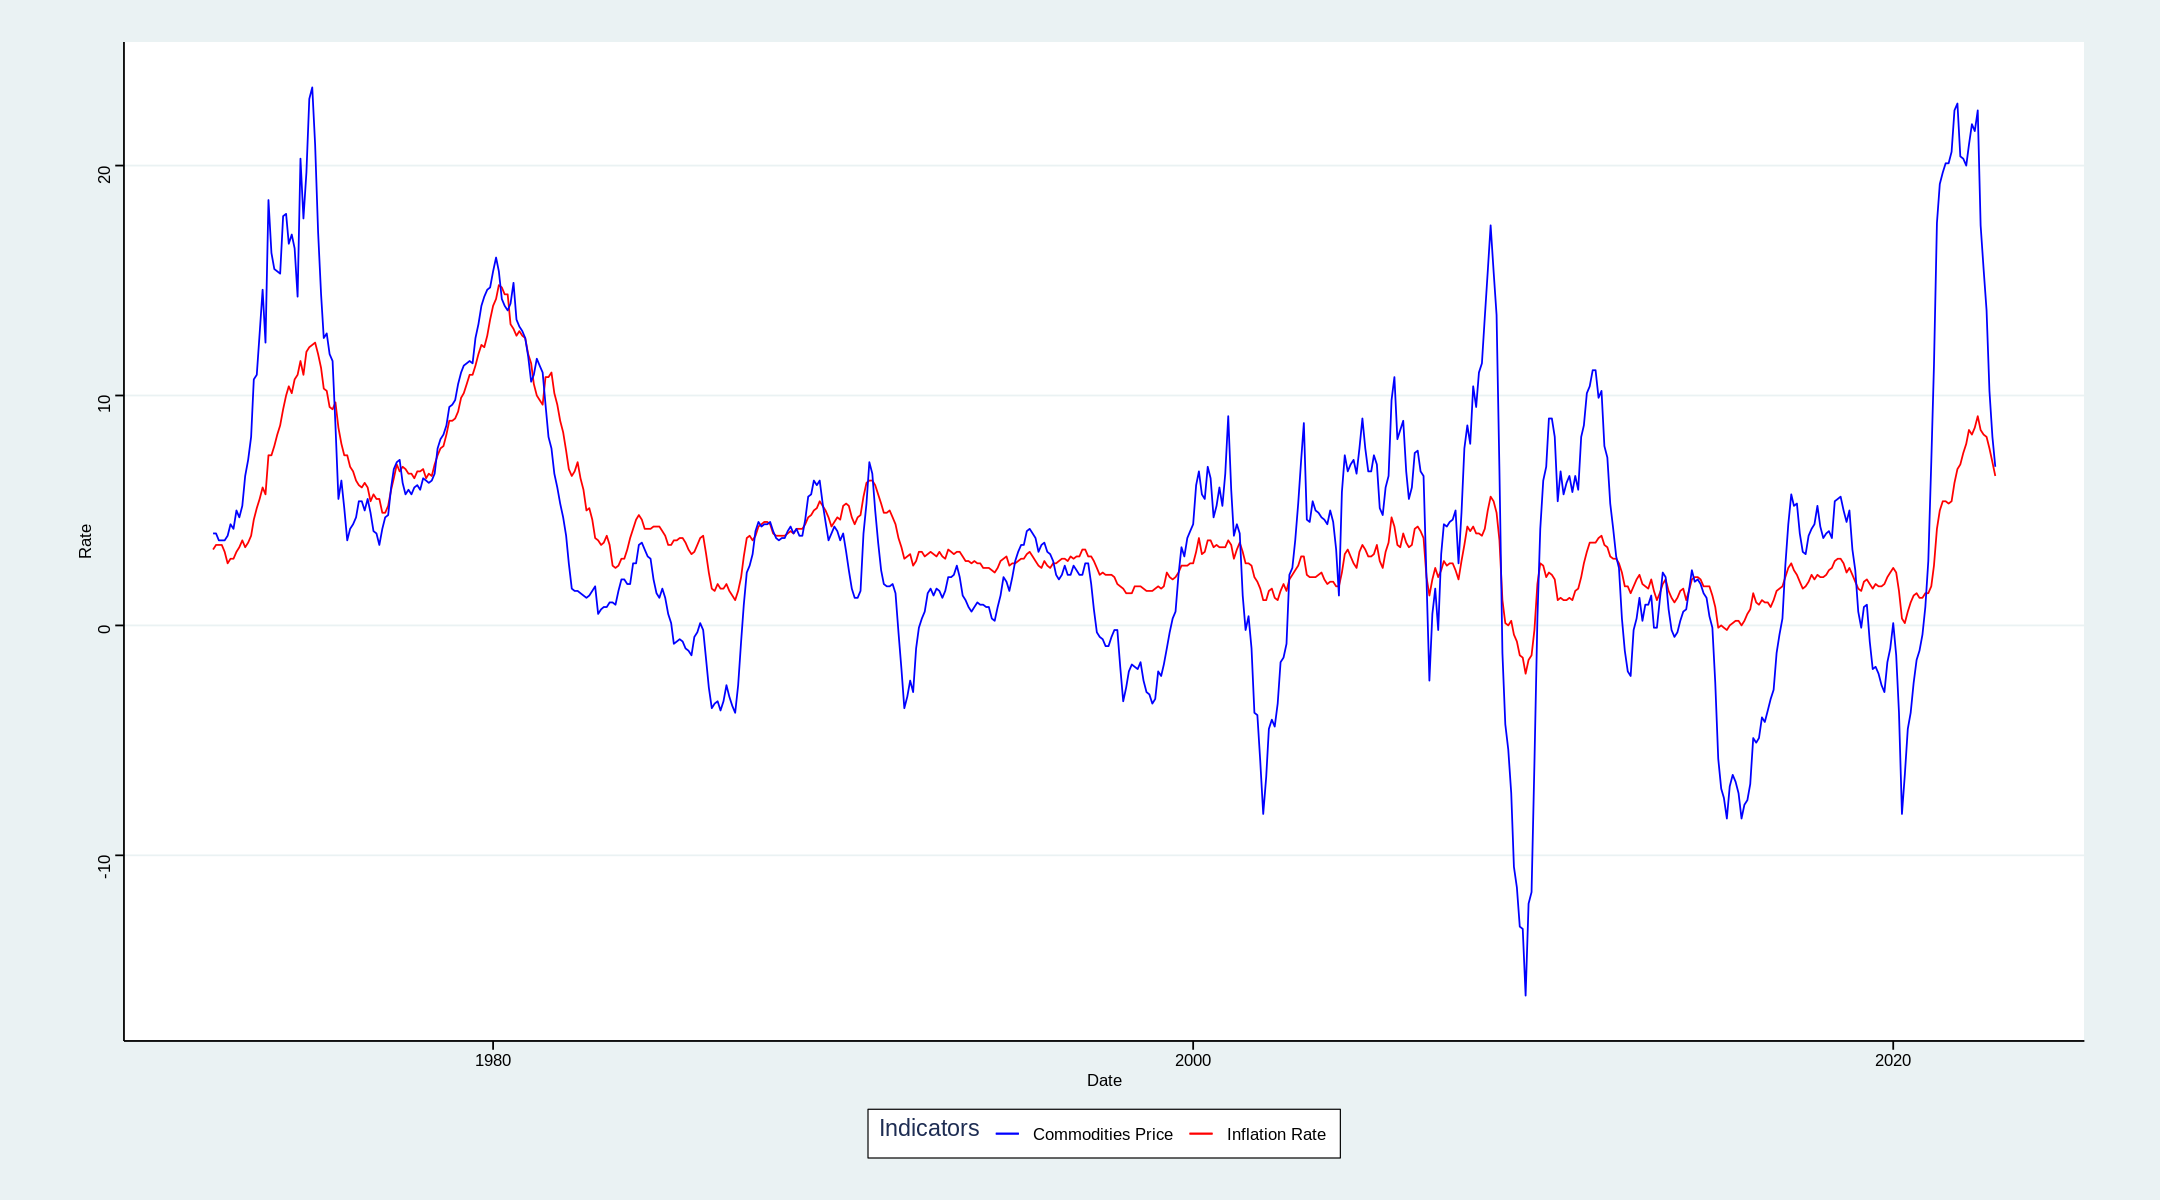

In [110]:
#inflation Rate and Commodities Price
ggplot(Inflation_full, aes(x = Date)) +
  geom_line(aes(y = Rate, color = "Inflation Rate")) +
  geom_line(aes(y = Commodities_Price, color = "Commodities Price")) +
  scale_color_manual(name = "Indicators",
                     values = c("Inflation Rate" = "red", "Commodities Price" = "blue")) +
                     theme_stata() 

we can see that when inflation is up, commodities are also increasing.

**Overlapping 2 line charts by customising second Y axis**

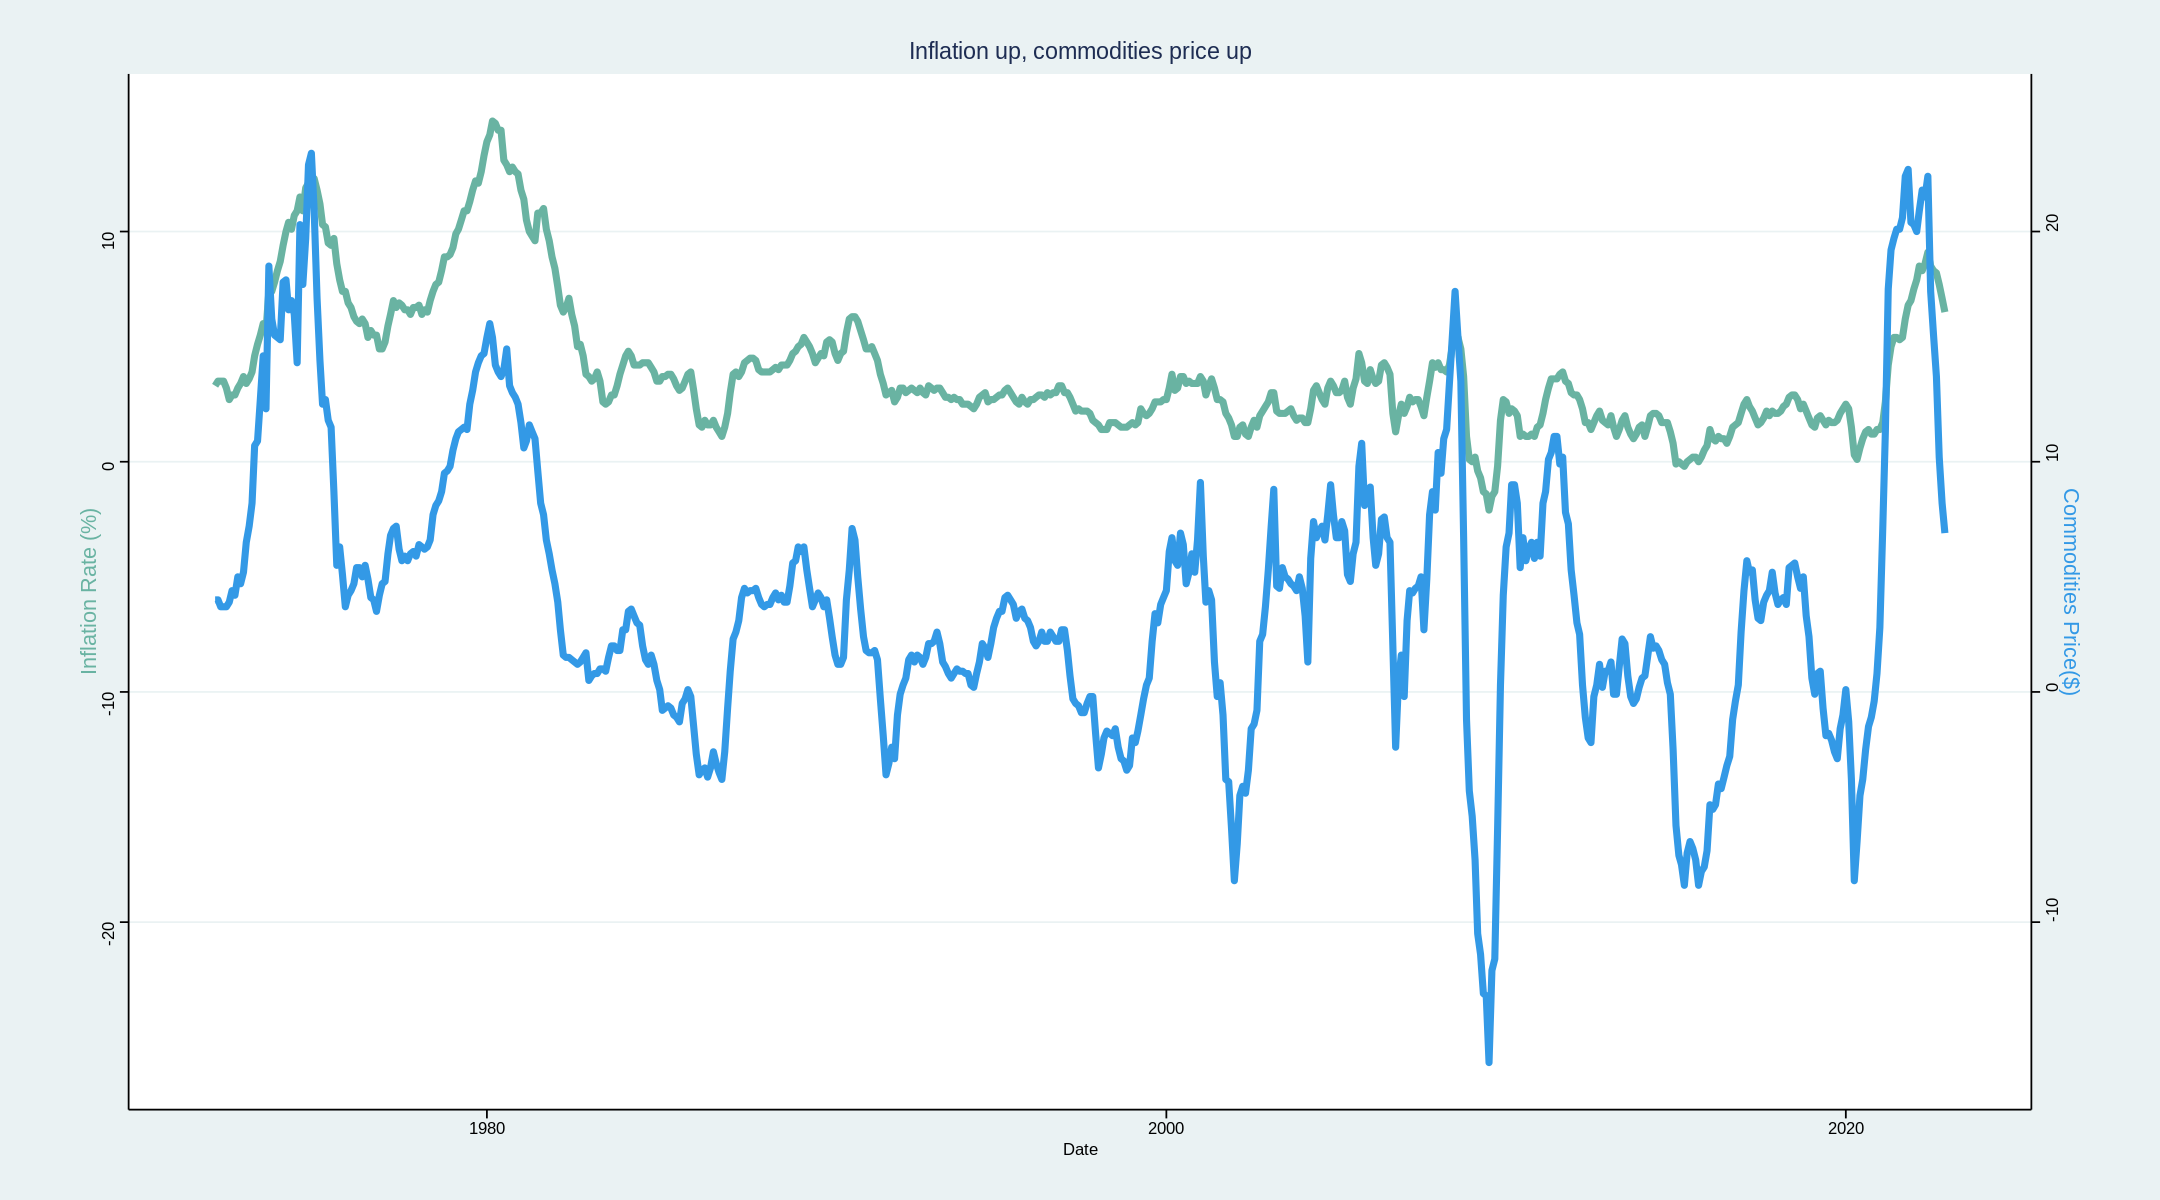

In [111]:
# Value used to transform the data
coeff <- 10

# A few constants
RateColor <- "#69b3a2"
priceColor <- rgb(0.2, 0.6, 0.9, 1)

ggplot(Inflation_full, aes(x=Date)) +
  
  geom_line( aes(y=Rate), size=2, color=RateColor) + 
  geom_line( aes(y=Commodities_Price-coeff), size=2, color=priceColor) +
    
  scale_y_continuous(
    
    # Features of the first axis
    name = "Inflation Rate (%)",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~.+coeff, name="Commodities Price($)")
  ) + 
    
                     theme_stata() + 
                      theme(axis.title.y = element_text(color = RateColor, size=13),
    axis.title.y.right = element_text(color = priceColor, size=13)
  ) +

  ggtitle("Inflation up, commodities price up")

Overlapping Inflation and Consumer sentiment line charts by customization

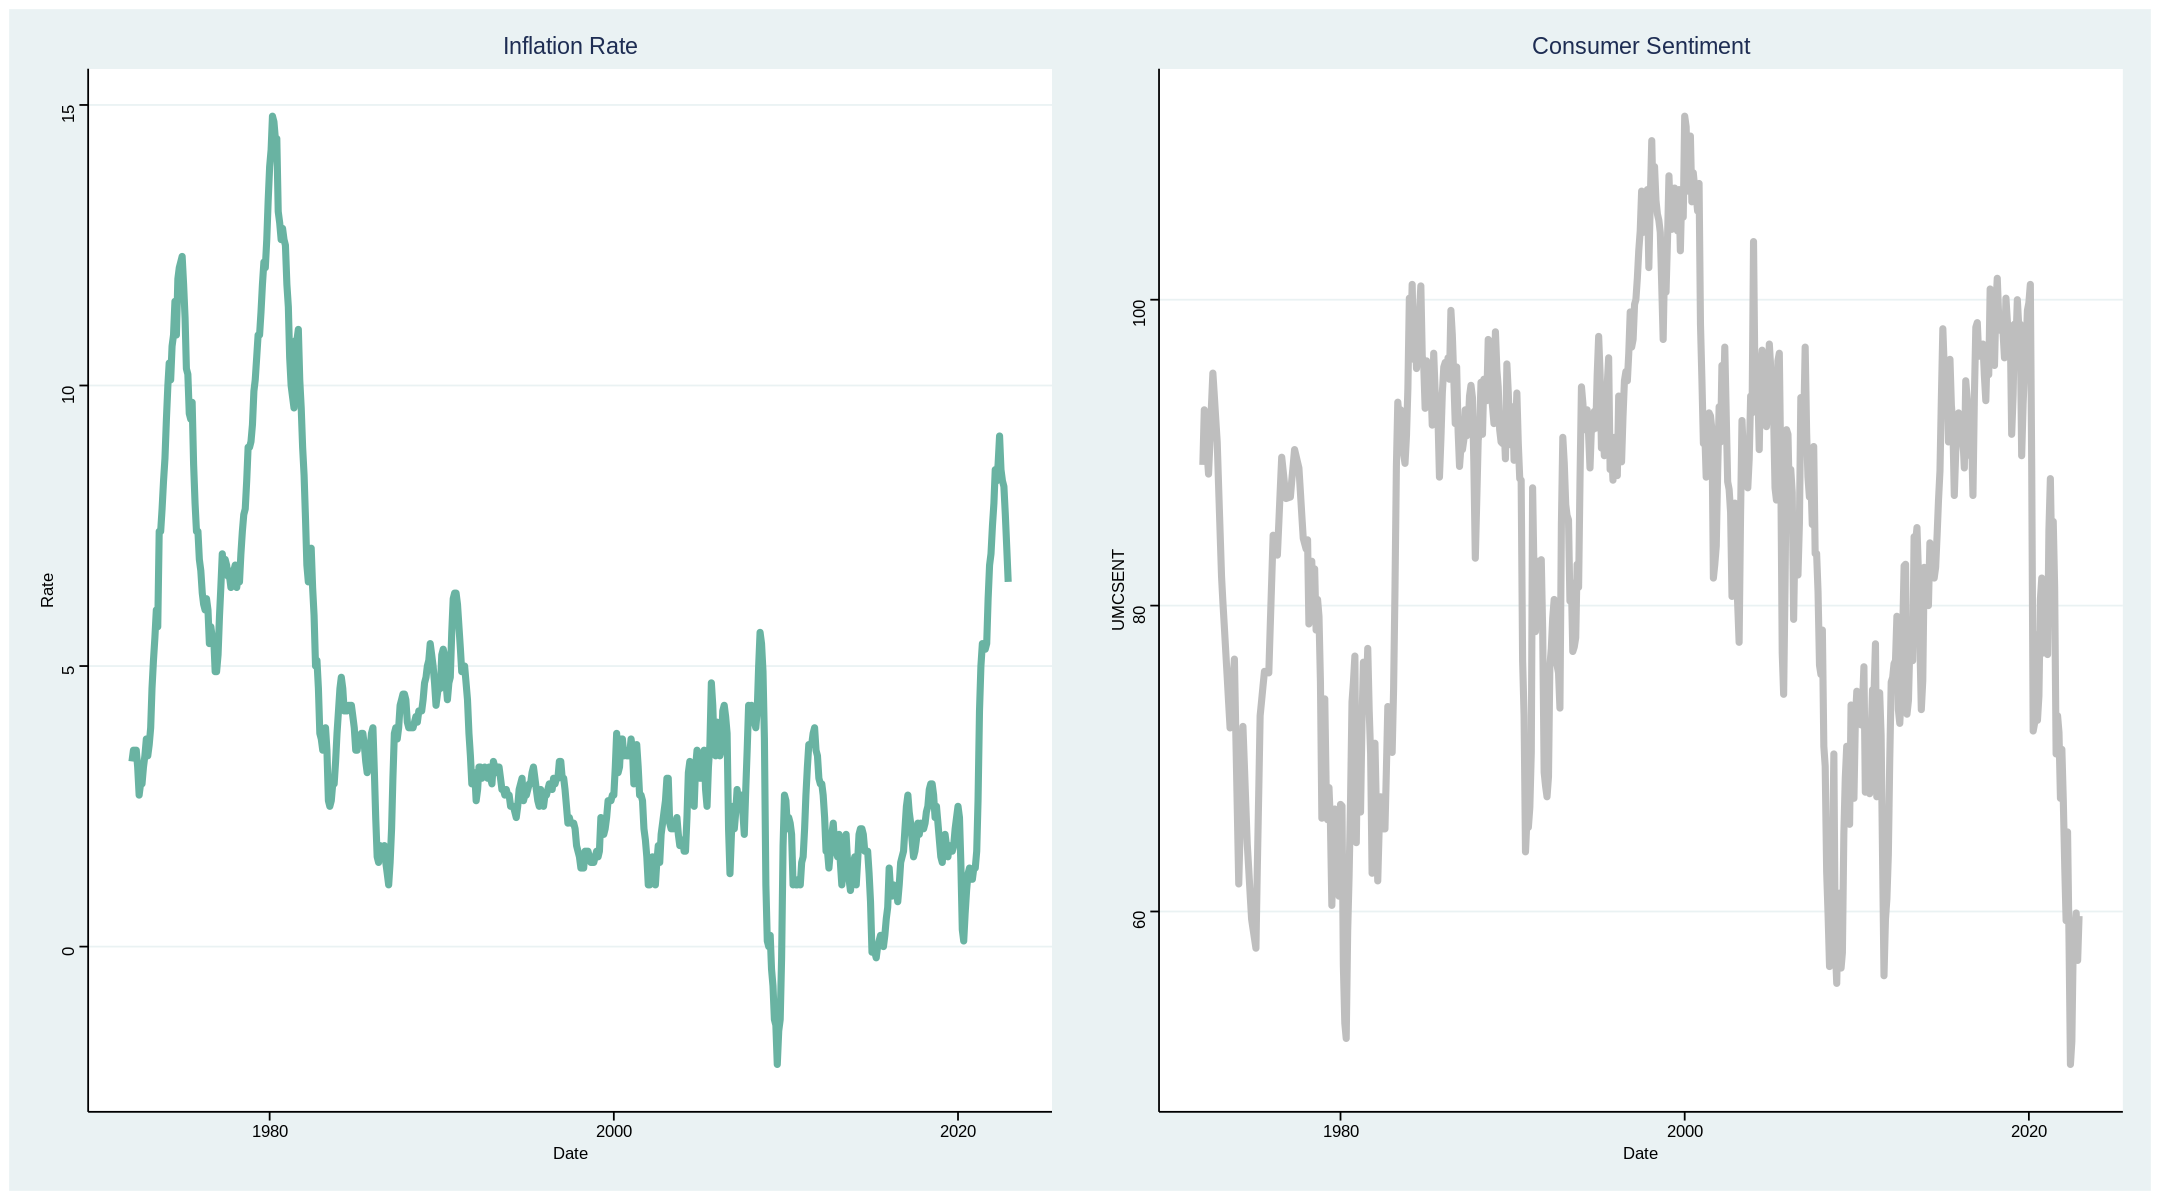

In [112]:
p3 <- ggplot(Inflation_full, aes(x=Date, y=UMCSENT)) +
  geom_line(color="grey",size=2) +
  ggtitle("Consumer Sentiment") +
  theme_stata()
#combining Inflation and comsumer sentiment line charts
p1+p3

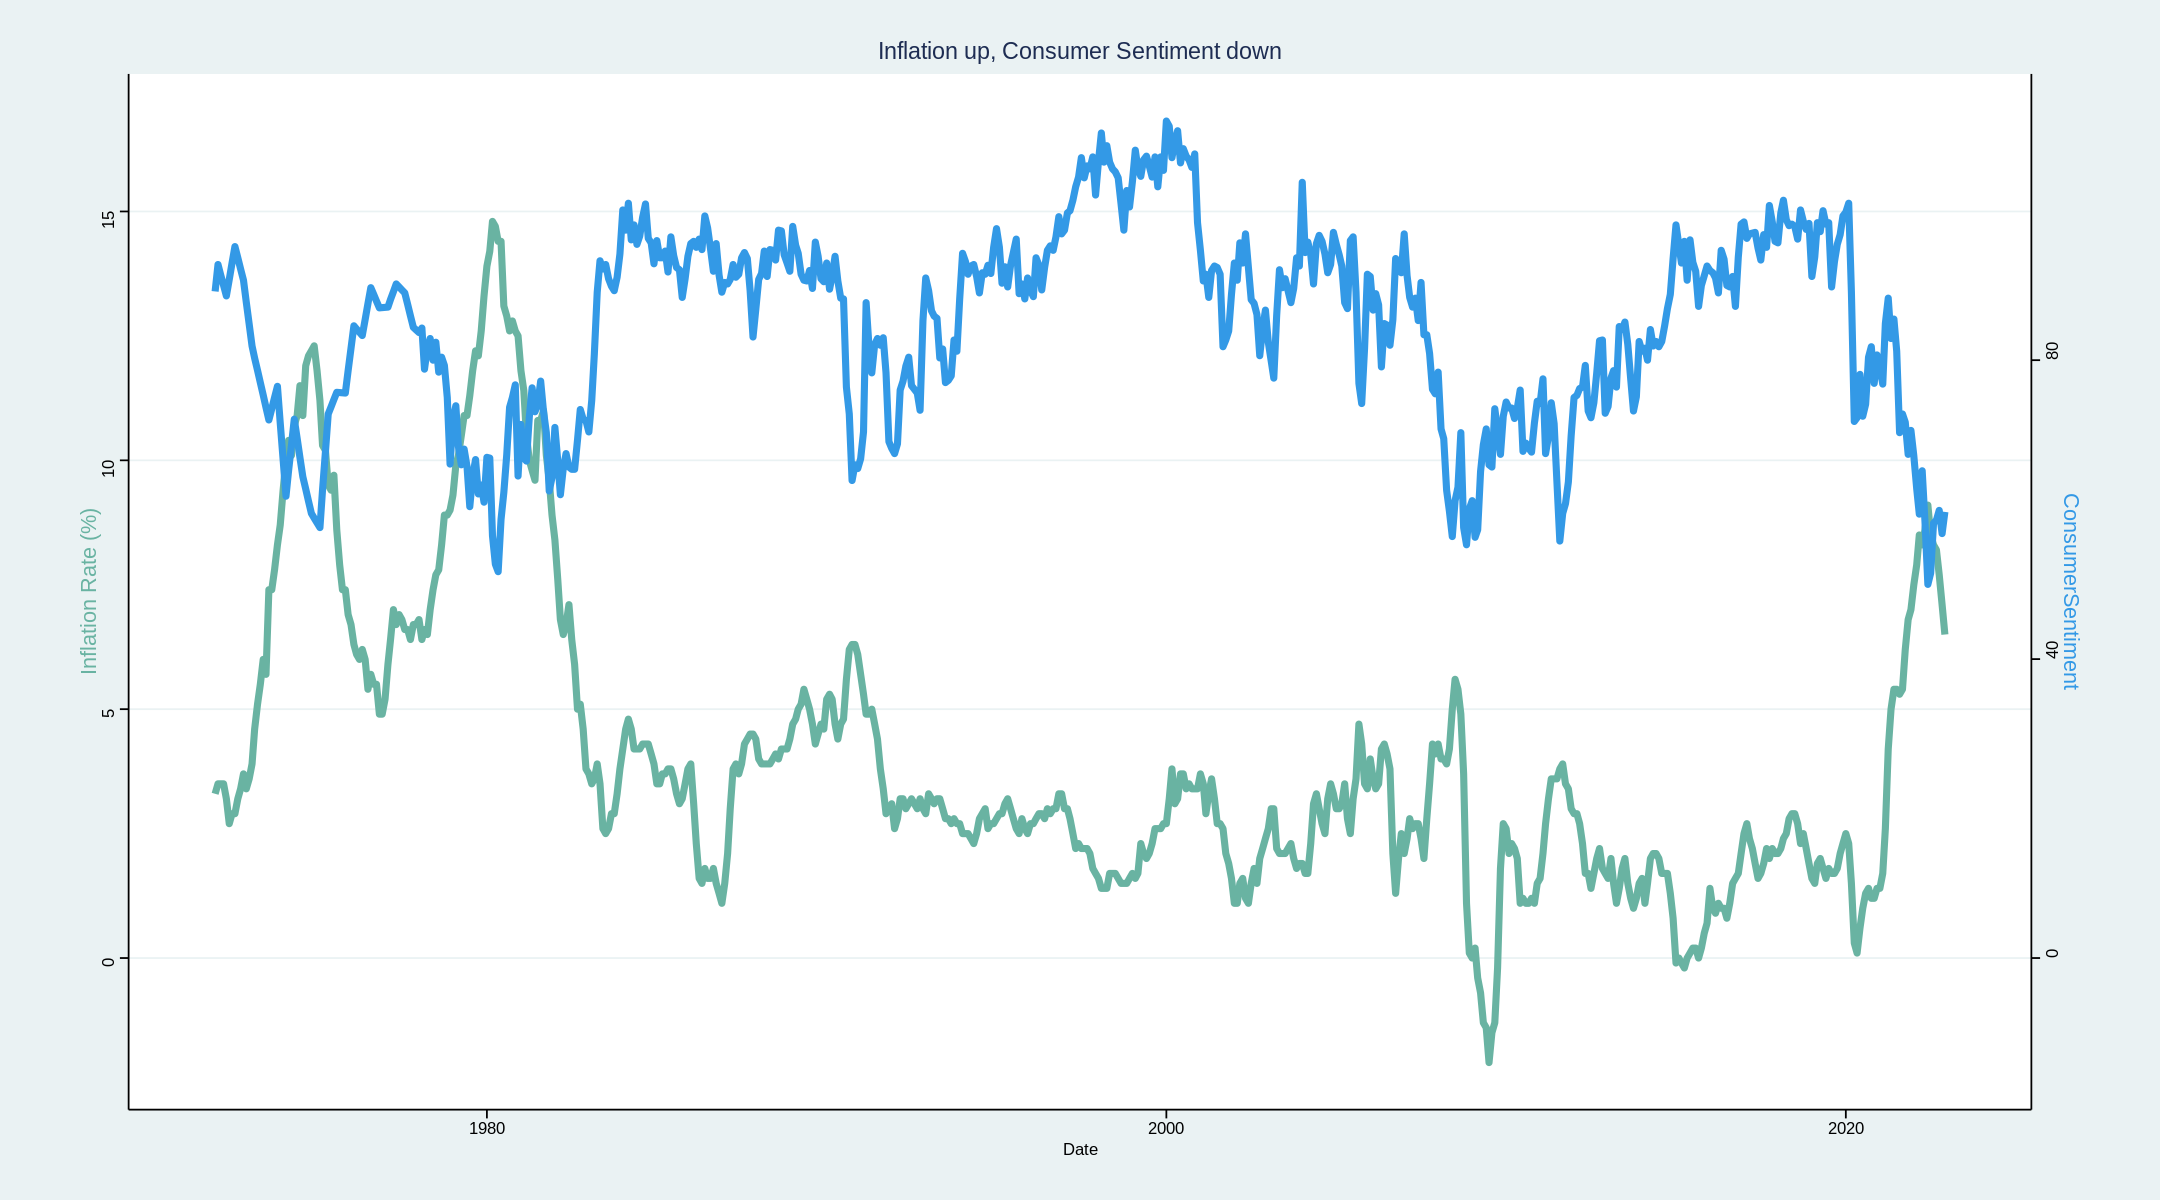

In [113]:
# Value used to transform the data
coeff <- 6.66

# A few constants
RateColor <- "#69b3a2"
SentimentColor <- rgb(0.2, 0.6, 0.9, 1)

ggplot(Inflation_full, aes(x=Date)) +
  
  geom_line( aes(y=Rate), size=2, color=RateColor) + 
  geom_line( aes(y=UMCSENT/coeff), size=2, color=SentimentColor) +
    
  scale_y_continuous(
    
    # Features of the first axis
    name = "Inflation Rate (%)",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~.*coeff, name="ConsumerSentiment")
  ) + 
    
                     theme_stata() + 
                      theme(axis.title.y = element_text(color = RateColor, size=13),
    axis.title.y.right = element_text(color = SentimentColor, size=13)
  ) +

  ggtitle("Inflation up, Consumer Sentiment down")

Overlapping bar chart and line chart

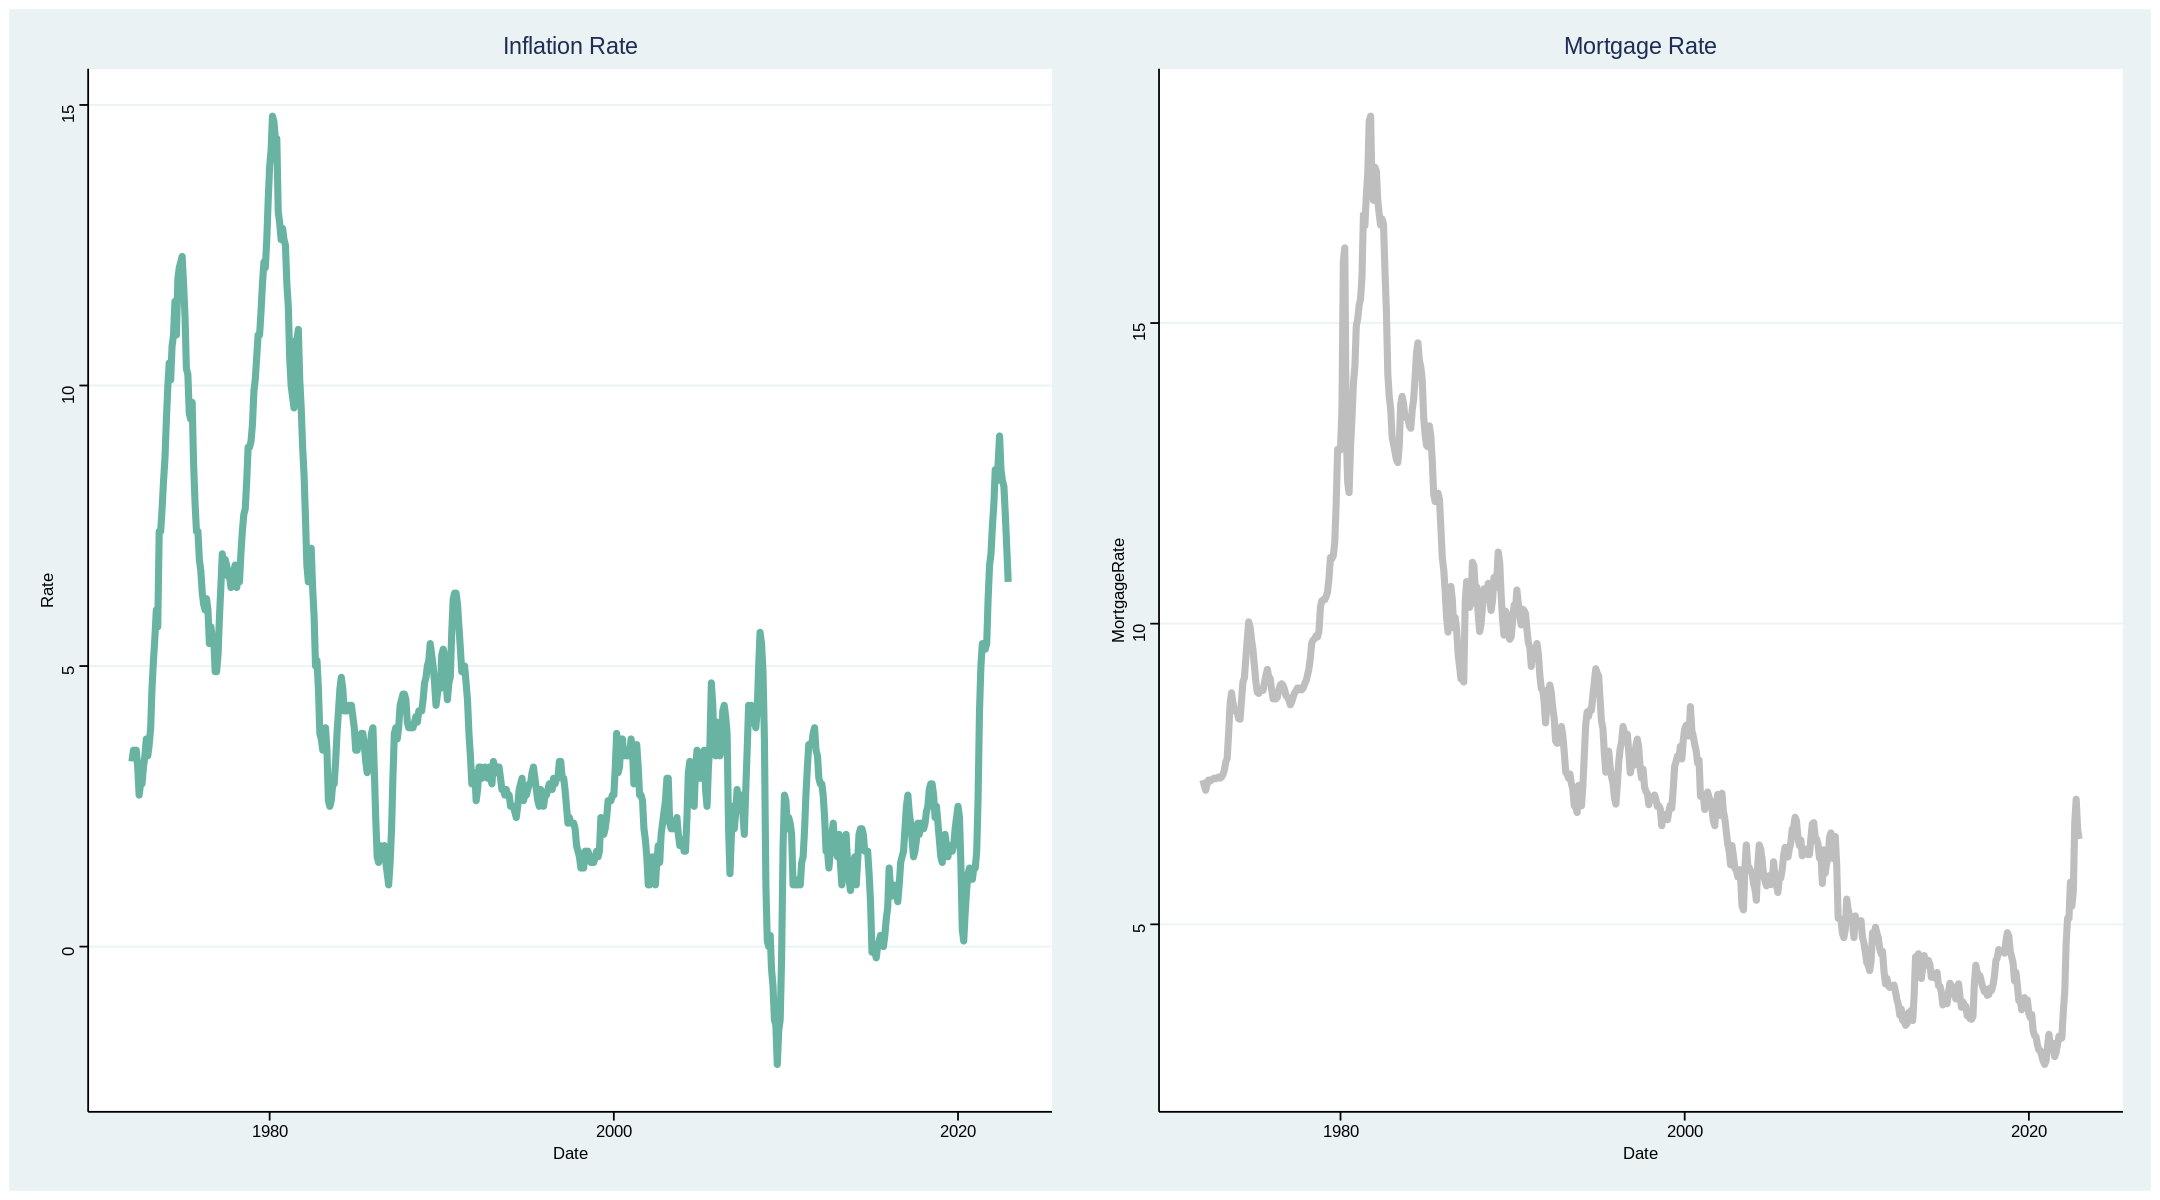

In [114]:
p4 <- ggplot(Inflation_full, aes(x=Date, y=MortgageRate)) +
  geom_line(color="grey",size=2) +
  ggtitle("Mortgage Rate") +
  theme_stata()

#combining Inflation and Mortgage Rate line charts
p1+p4

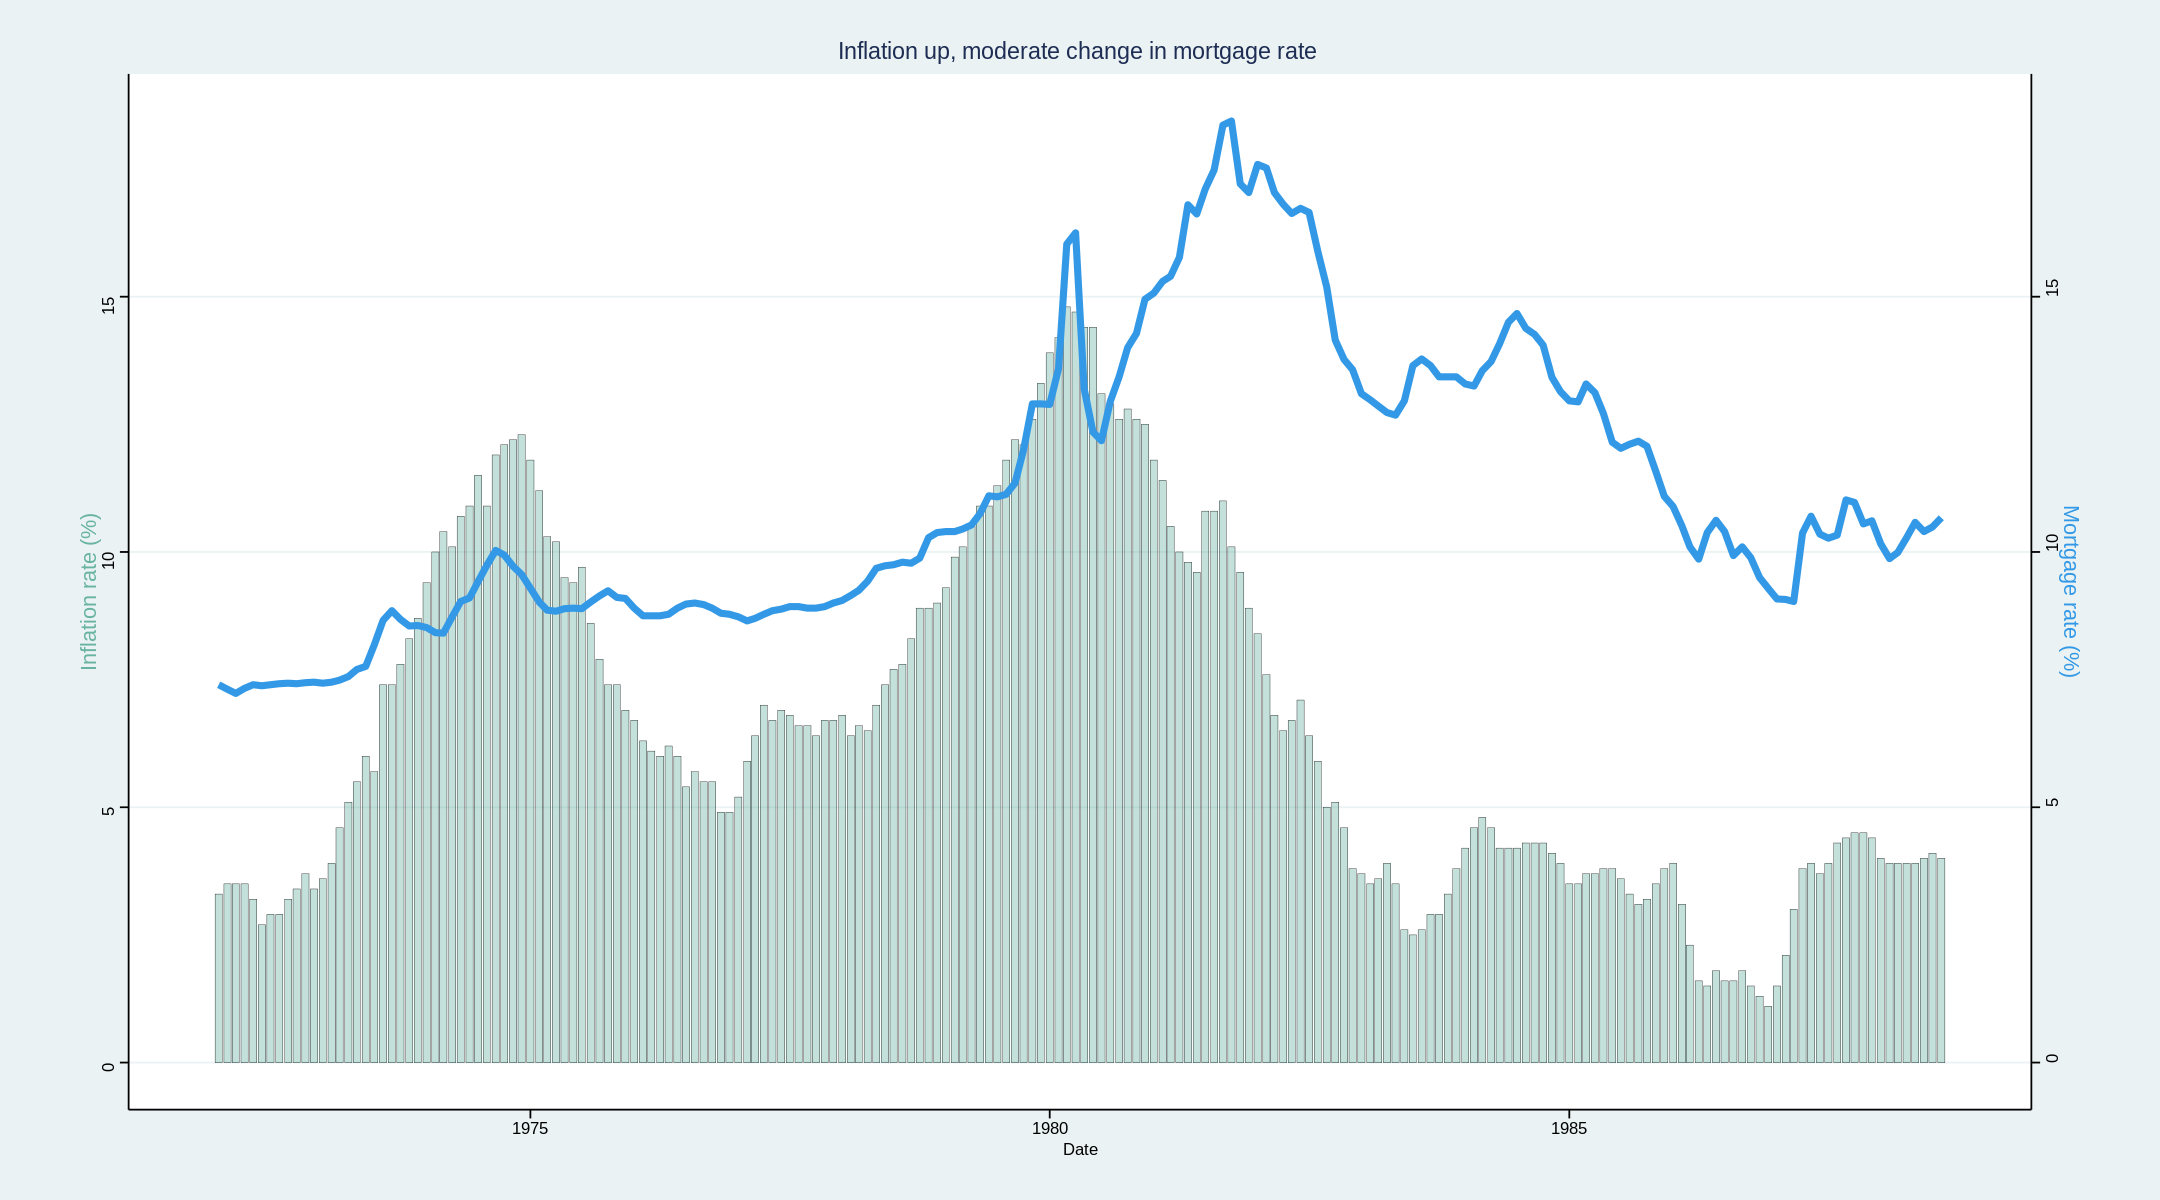

In [115]:
# Value used to transform the data
coeff <- 1

RateColor <- "#69b3a2"
MortgageColor <- rgb(0.2, 0.6, 0.9, 1)

ggplot(head(Inflation_full,200),  aes(x=Date)) +
  
  geom_bar( aes(y=Rate), stat="identity", size=.1, fill=RateColor, color="black", alpha=.4) + 
  geom_line( aes(y=MortgageRate), size=2, color=priceColor) +
  
  scale_y_continuous(
    
    # Features of the first axis
    name = "Inflation rate (%)",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~.*coeff, name="Mortgage rate (%)")
  ) + 
  
  theme_stata() +

  theme(
    axis.title.y = element_text(color = RateColor, size=13),
    axis.title.y.right = element_text(color = MortgageColor, size=13)
  ) +

  ggtitle("Inflation up, moderate change in mortgage rate ")

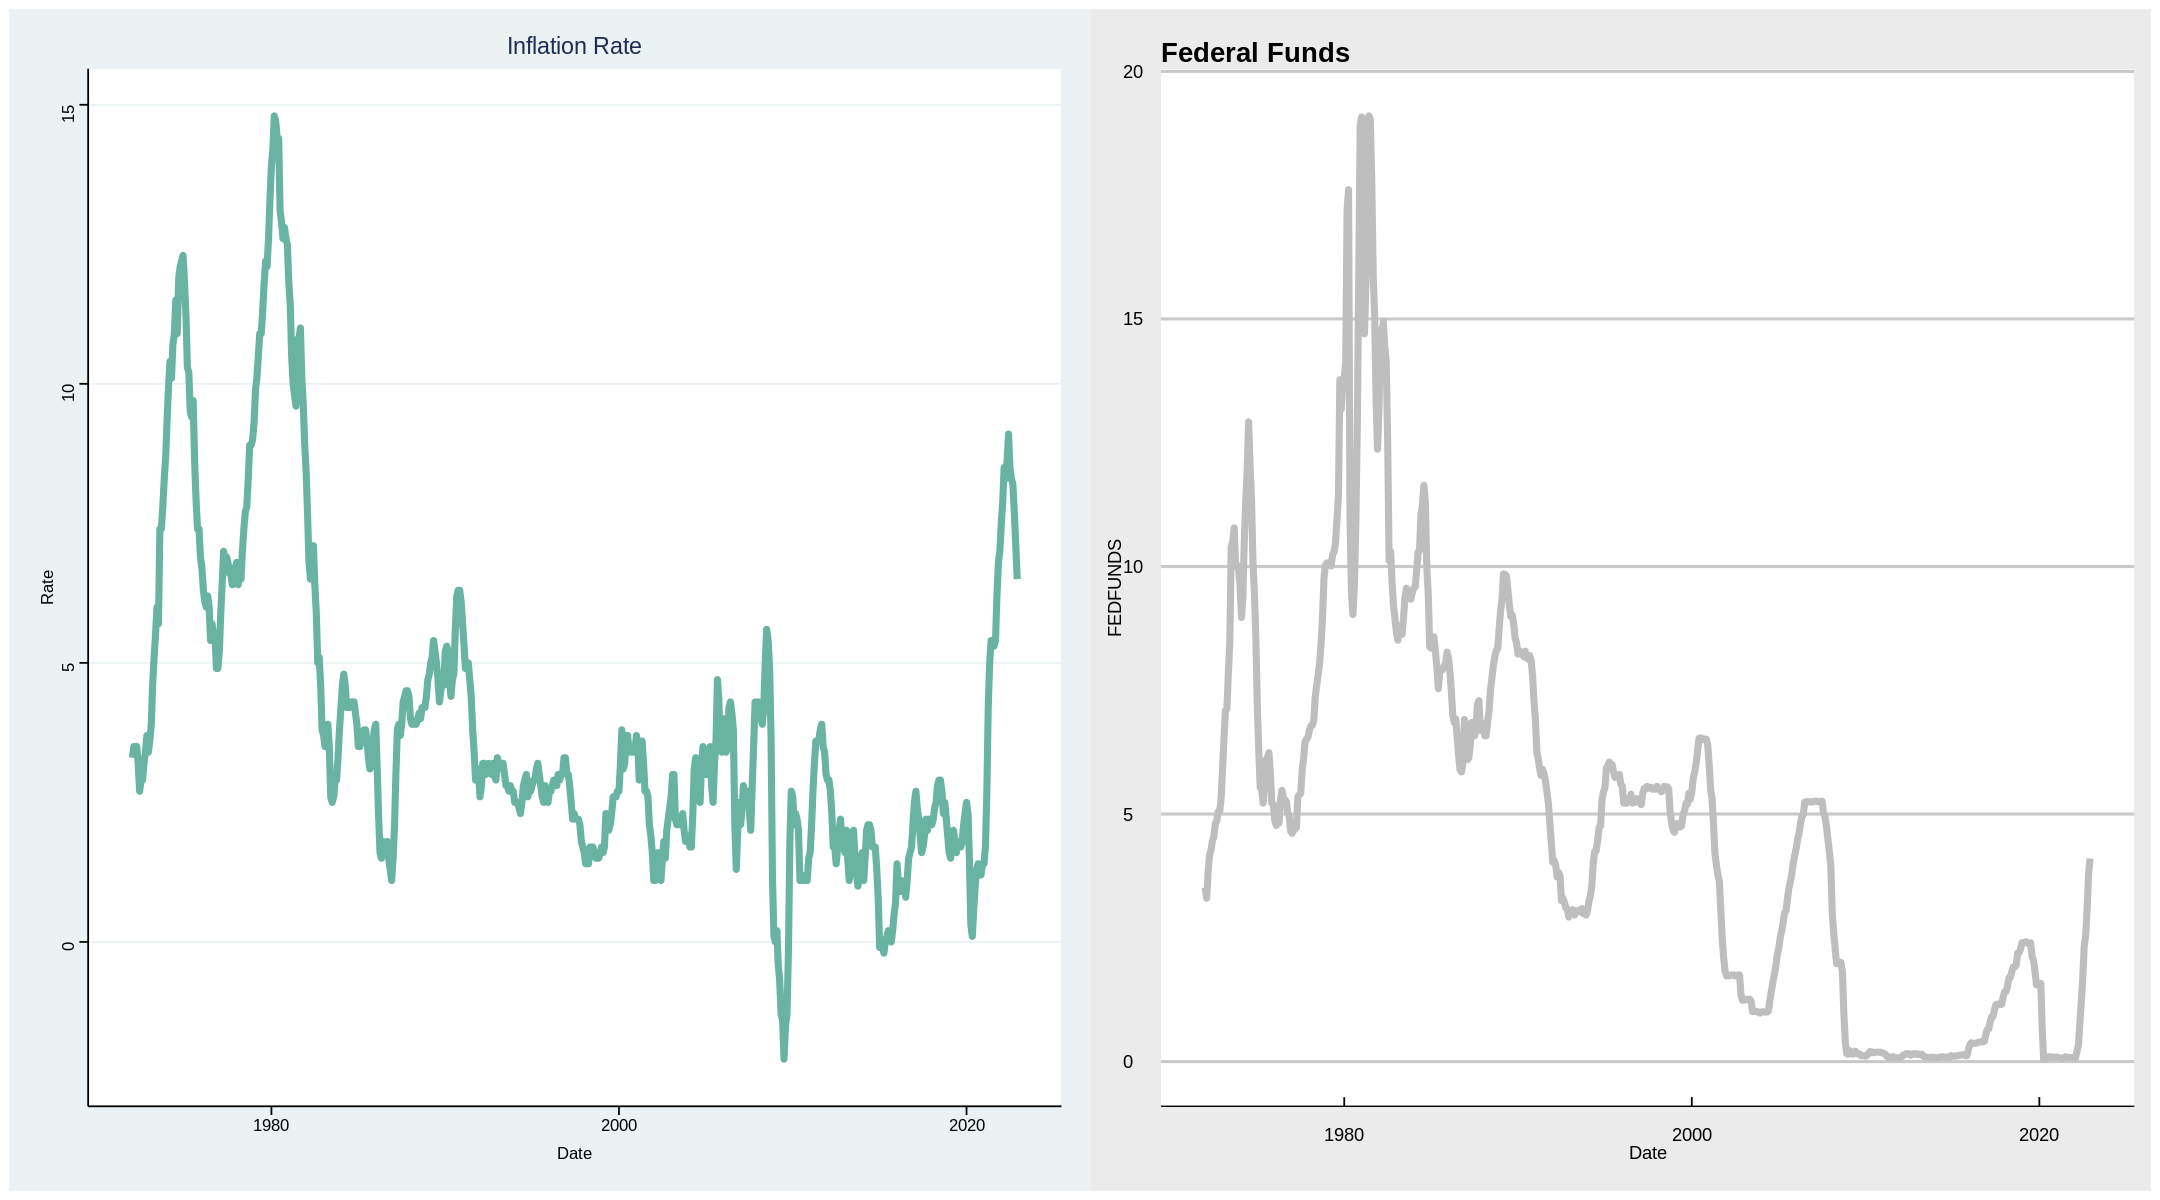

In [116]:
p5 <- ggplot(Inflation_full, aes(x=Date, y=FEDFUNDS)) +
  geom_line(color="grey",size=2) +
  ggtitle("Federal Funds") +
  theme_economist_white()

#combining Inflation and Federal Funds Rate line charts
p1+p5

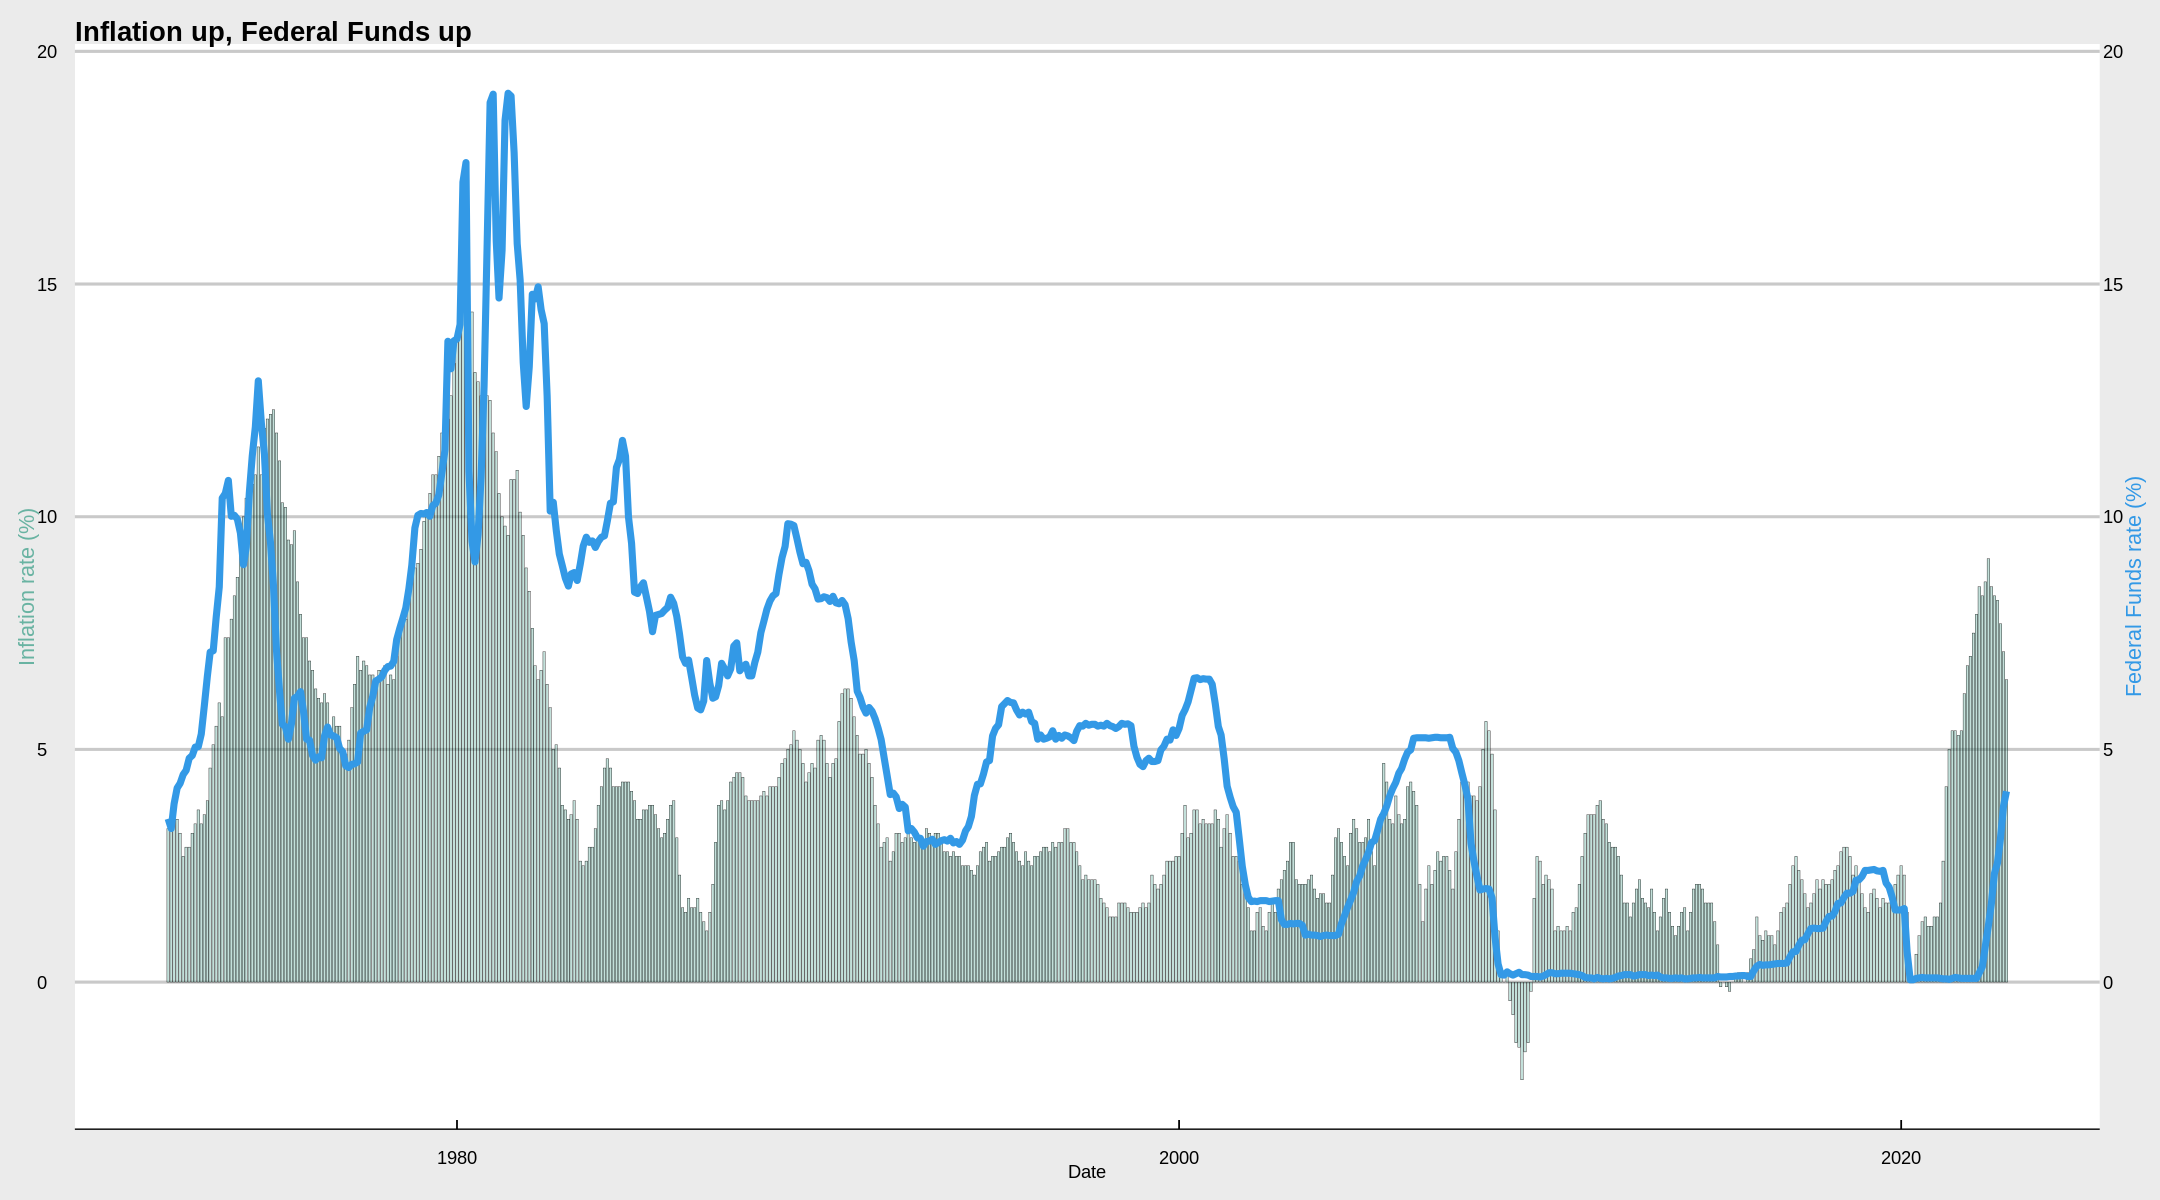

In [117]:
# Value used to transform the data
coeff <- 1

RateColor <- "#69b3a2"
FundsColor <- rgb(0.2, 0.6, 0.9, 1)

ggplot(Inflation_full,  aes(x=Date)) +
  
  geom_bar( aes(y=Rate), stat="identity", size=.1, fill=RateColor, color="black", alpha=.4) + 
  geom_line( aes(y=FEDFUNDS), size=2, color=FundsColor) +
  
  scale_y_continuous(
    
    # Features of the first axis
    name = "Inflation rate (%)",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis(~.*coeff, name="Federal Funds rate (%)")
  ) + 
  
  theme_economist_white() +

  theme(
    axis.title.y = element_text(color = RateColor, size=13),
    axis.title.y.right = element_text(color = FundsColor, size=13)
  ) +

  ggtitle("Inflation up, Federal Funds up ")

**Connected Scatter Plot**

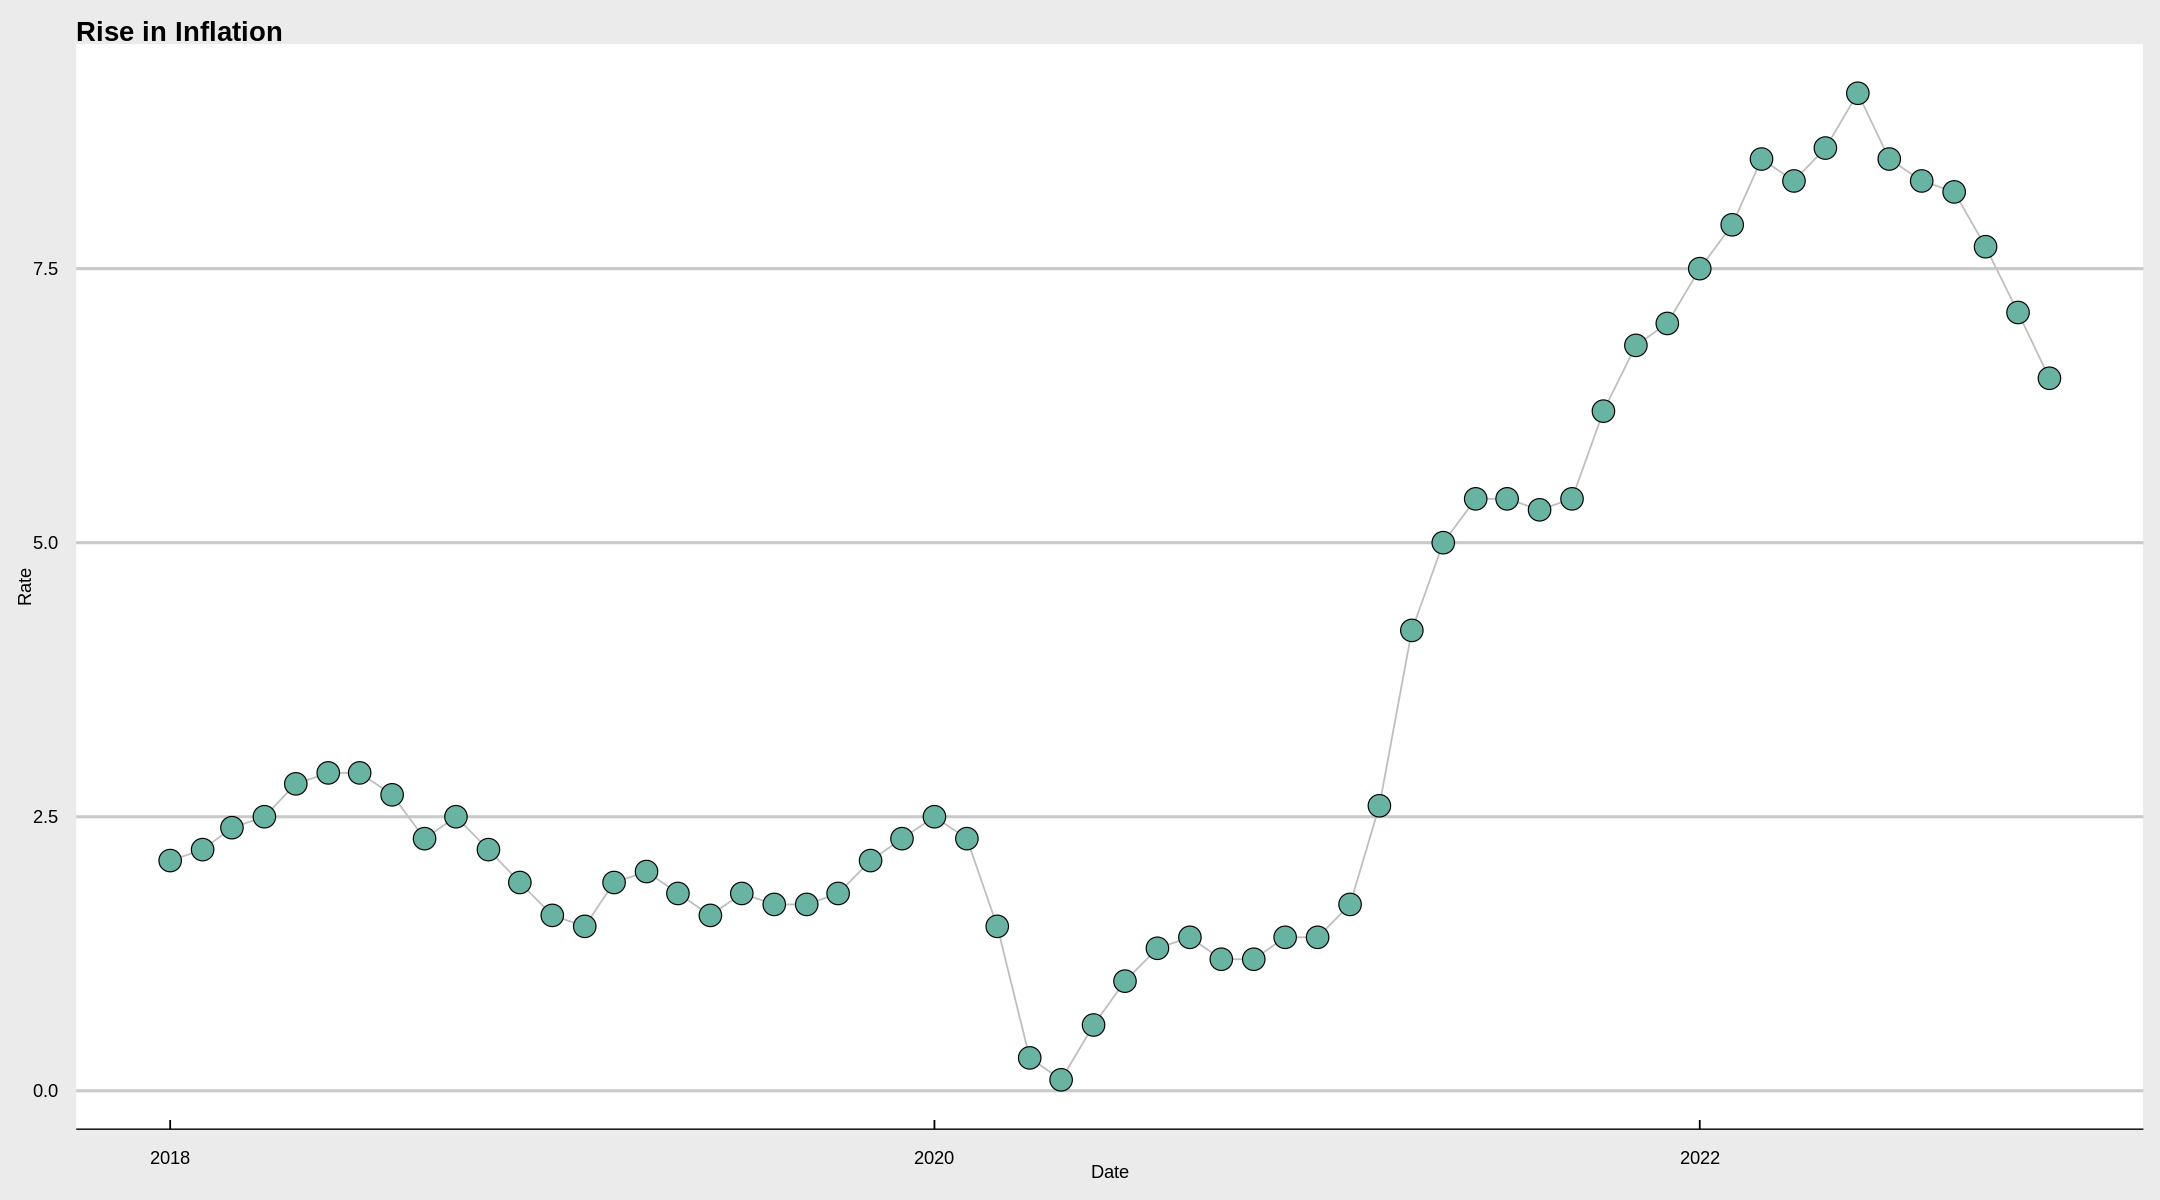

In [118]:
#combining scatter plot and line plot
# Plot for knowing the inflation rate in the past 5 years
Inflation_full %>%
  tail(60) %>%
  ggplot( aes(x=Date, y=Rate)) +
    geom_line( color="grey") +
    geom_point(shape=21, color="black", fill="#69b3a2", size=6) +
    theme_economist_white() +
    ggtitle("Rise in Inflation")

In the past five years, we can see that inflation has drastically increased in the year 2020 when COVID has started and continued increasing till the mid of 2022 and started to decrease in the past few months.

Multi Linear Regression Model

In [119]:
# Create a multiple linear regression model using the `lm()` function
model <- lm(Rate ~ Unemployment + FEDFUNDS + GoldPrice + Oil_Change + MortgageRate + Commodities_Price + UMCSENT + M1_change, data=Inflation_full)

# Get the summary of the multiple linear regression model using the `summary()` function
summary(model)


Call:
lm(formula = Rate ~ Unemployment + FEDFUNDS + GoldPrice + Oil_Change + 
    MortgageRate + Commodities_Price + UMCSENT + M1_change, data = Inflation_full)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9356 -0.5798 -0.0174  0.6317  4.5085 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.4984680  0.6374916  11.762  < 2e-16 ***
Unemployment      -0.2044336  0.0392992  -5.202 2.71e-07 ***
FEDFUNDS           0.2333212  0.0363082   6.426 2.66e-10 ***
GoldPrice         -0.0002433  0.0001231  -1.976  0.04862 *  
Oil_Change        -0.0030484  0.0016838  -1.810  0.07073 .  
MortgageRate       0.1742542  0.0456698   3.816  0.00015 ***
Commodities_Price  0.2459945  0.0132997  18.496  < 2e-16 ***
UMCSENT           -0.0718324  0.0051799 -13.868  < 2e-16 ***
M1_change          7.6189057  1.1213561   6.794 2.62e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.066 on 603 degrees of fr

We can see that all predictor variables have p-values less than 0.05 which indicates that each of them have a significant relation with response variable, Rate. Compared to other predictor variables in the model, Oil_Change and GoldPrice have smaller coefficicents so their effect on the response variable may be relatively small. 

The adjusted R2 value, 0.8746 suggests that the model is a good fit for the data. Additionally, it is always good to perform further checks on the model assumptions and evaluate the model's predictive performance.

Splitting data into train and test sets

In [120]:
# Extract the rows from 1972 to 2017
#training dataset includes all rows from 1972 to 2017
#testing dataset includes all rows from 2018 to 2022
# split data into train and test based on date
train <- Inflation_full[Inflation_full$Date >= as.Date("1972-01-01") & Inflation_full$Date <= as.Date("2017-12-01"), ]
test <- Inflation_full[Inflation_full$Date >= as.Date("2018-01-01") & Inflation_full$Date <= as.Date("2022-12-01"), ]


#check shape of train and test dataset
train_size <- nrow(train)
test_size <- nrow(test)

#prints only rows of the datasets
train_size
test_size
dim(train)
dim(test)

[1] 552

[1] 60

[1] 552  10

[1] 60 10

Linear Regression Forecast

The linear regression forecast plot shows the actual inflation rate from 1972 to 2022 in dark red and the forecasted inflation rate from 2018 to 2022 in dark blue. The plot also includes a vertical line indicating the end of the training data in December 2017.

[1] 0.6250961

[1] 0.6109154

[1] 1683.012

[1] 1726.148

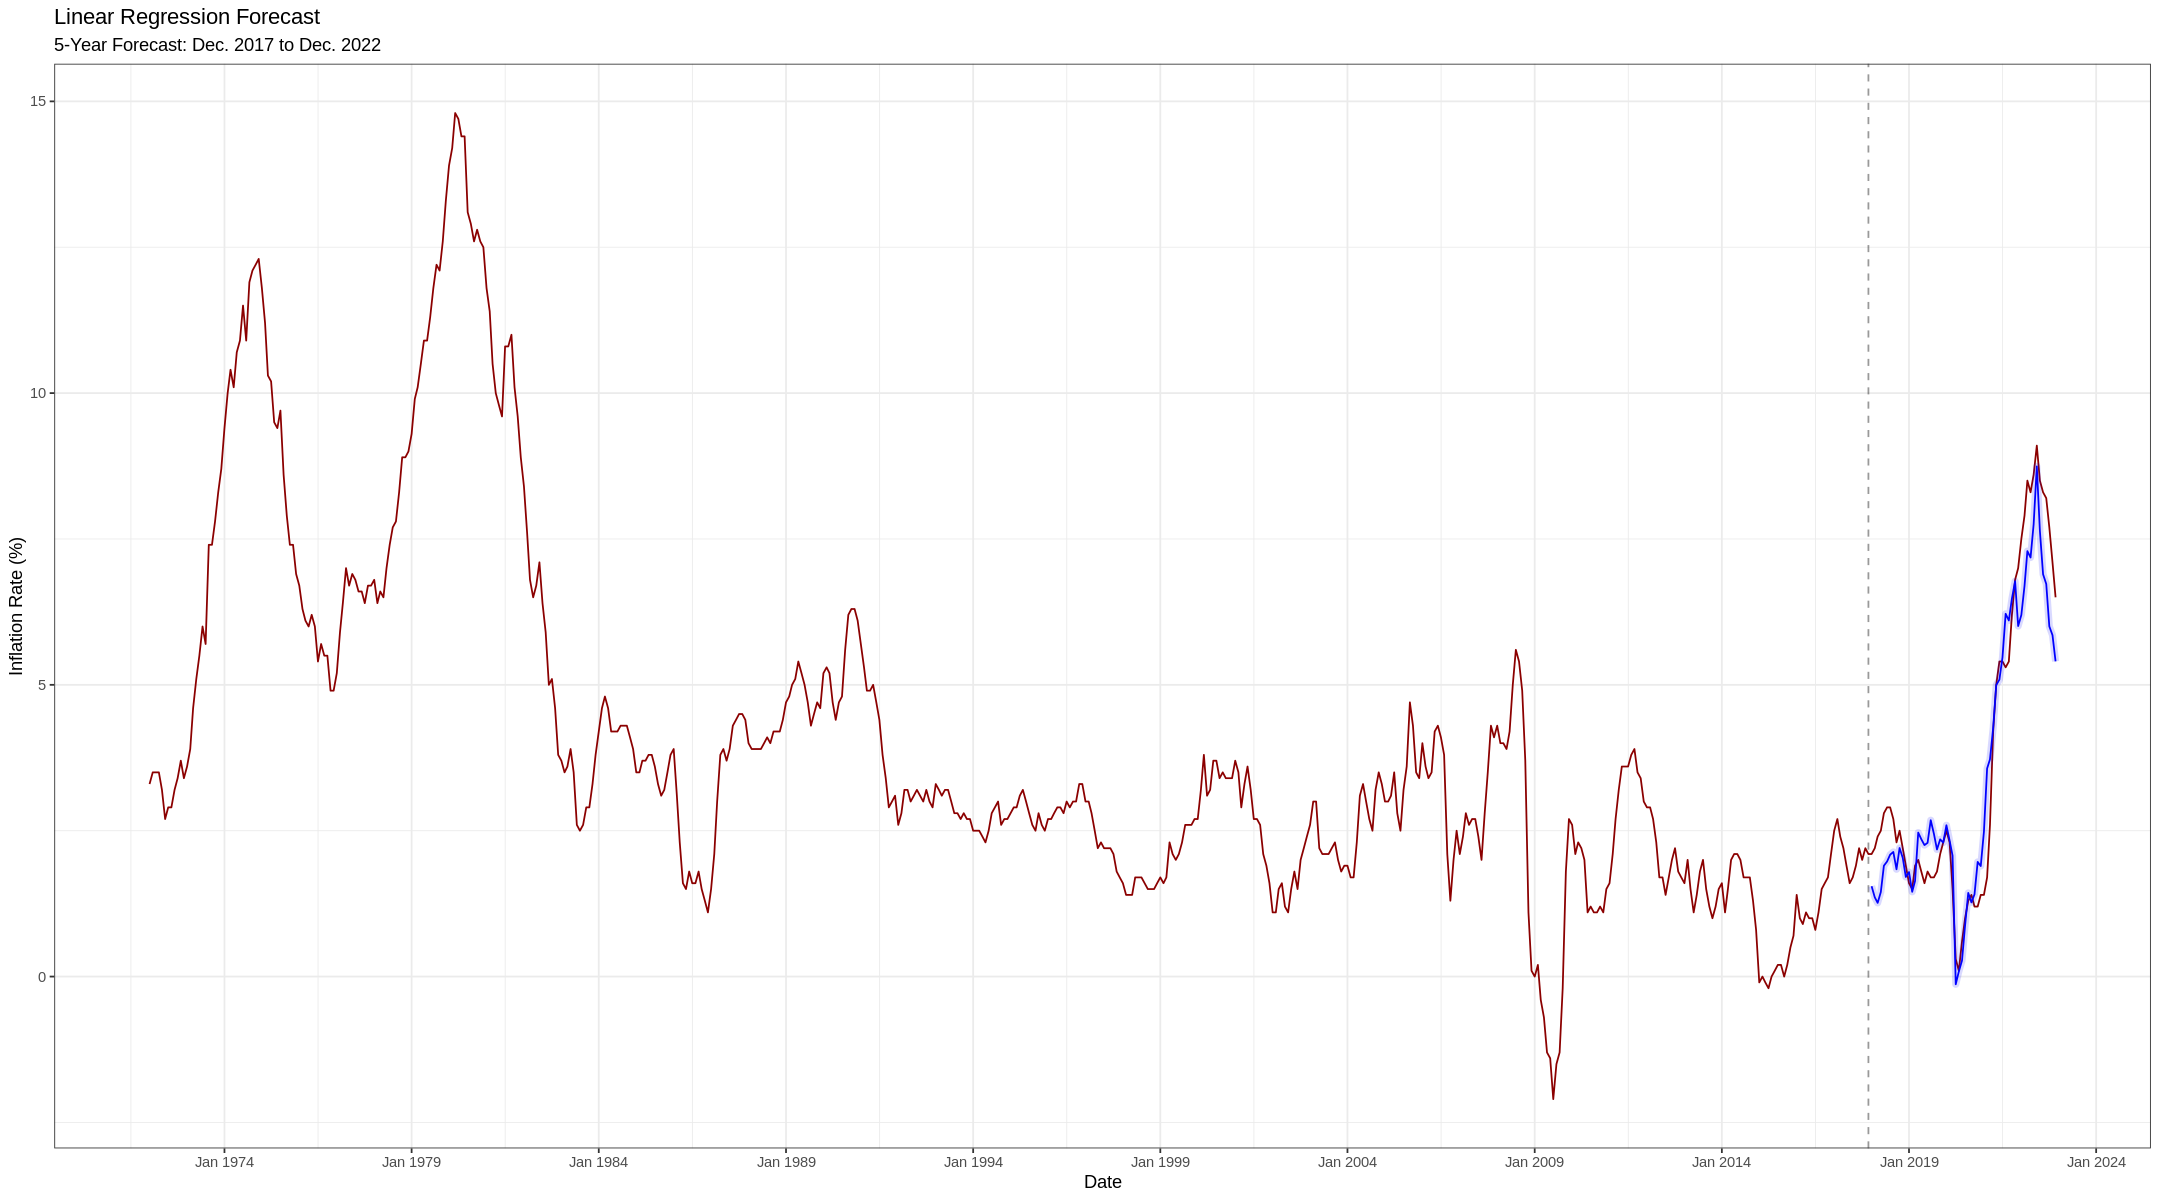

In [121]:
# Full Linear Model
full_model <- lm(data=train, Rate~Unemployment+FEDFUNDS+UMCSENT+Oil_Change+Commodities_Price+M1_change+MortgageRate+GoldPrice)
linearmodel_forecast1 <- predict(full_model, h=60, newdata=test)
full_model_MAE <- mean(abs(linearmodel_forecast1-test$Rate))
full_model_MSE <- mean((linearmodel_forecast1 - test$Rate)^2)
full_model_MedAE <- median(abs(linearmodel_forecast1-test$Rate))
full_model_Max_Error <- max(abs(linearmodel_forecast1-test$Rate))
full_model_AIC <- AIC(full_model)
full_model_BIC <- BIC(full_model)
full_model_MAE
full_model_MSE
full_model_AIC
full_model_BIC

ggplot() +
  geom_vline(xintercept=as.Date("2017-12-01"), alpha=0.4, linetype="dashed") +
  geom_line(data=Inflation_full, mapping=aes(x=Date, y=Rate), col="darkred") +
  geom_line(data = Inflation_full[Inflation_full$Date >= as.Date("2018-1-01") & Inflation_full$Date <= as.Date("2022-12-01"), ], 
          mapping = aes(x = Date, y = linearmodel_forecast1), 
          col = "blue") +
  geom_line(data = Inflation_full[Inflation_full$Date >= as.Date("2018-1-01") & Inflation_full$Date <= as.Date("2022-12-01"), ], 
          mapping = aes(x = Date, y = linearmodel_forecast1), 
          col = "blue", size = 2, alpha = 0.15) +   
  #geom_line(mapping=aes(x=Inflation_full$Date[(length(Inflation_full$Date)-60+1):length(Inflation_full$Date)],
                       # y=linearmodel_forecast1), col="blue") +
  #geom_line(mapping=aes(x=Inflation_full$Date[(length(Inflation_full$Date)-60+1):length(Inflation_full$Date)],
                       # y=linearmodel_forecast1), col="blue", size=2, alpha=0.15) +
  labs(title="Linear Regression Forecast",
       subtitle="5-Year Forecast: Dec. 2017 to Dec. 2022", y="Inflation Rate (%)") + 
  scale_x_date(date_labels="%b %Y", breaks="5 years") + theme_bw()


Seeing the forecasted values, we can say that the model has been able to fit the data well. 

The lower the AIC or BIC values, better the model is. But here we can AIC and BIC values are bigger so it says that this model is not suitable for the data. To be sure, I am going ahead and checking the vaildity of the model.

Verifying Assumptions

There are several assumptions that need to be verified in order to assess the validity of a linear model

Linearity

The first assumptions of a linear model is that the relationship between response variable and each of independent variables should be linear. This is checked by plotting scatter plots of the dependent variable(Inflation Rate) against each dependent variable.

In [122]:
install.packages("ggfortify")
library(ggfortify)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Registered S3 methods overwritten by 'ggfortify':
  method                 from    
  autoplot.Arima         forecast
  autoplot.acf           forecast
  autoplot.ar            forecast
  autoplot.bats          forecast
  autoplot.decomposed.ts forecast
  autoplot.ets           forecast
  autoplot.forecast      forecast
  autoplot.stl           forecast
  autoplot.ts            forecast
  fitted.ar              forecast
  fortify.ts             forecast
  residuals.ar           forecast



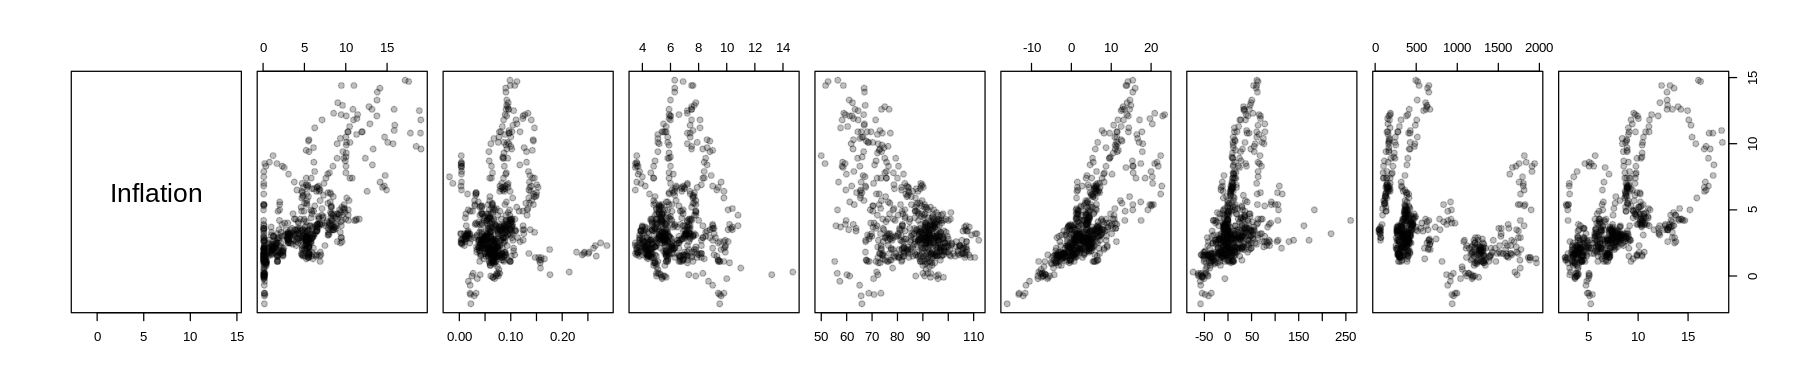

In [123]:
#setting figure size
fig(15,3.2)
#defines color
plainc <- rgb(red=0, green=0, blue=0, alpha=0.25)
#scatterplot matrix
pairs(Inflation_filtered, cex.labels=2, horInd=1, labels=c("Inflation", "Fedfunds", "M1_change", "Unemployment", "Consumersentiment", "CommoditiesPrice","OilChange", "GoldPrice", "MortgageRate"), col=plainc, pch=19)

Federal funds rate, consumer sentiment index, and commodity price index appear to be linearly related to inflation but for the other variables, their relationship is not clearly linear.

Normality

Normality is checked using histogram plot of the residuals. Residuals should be normally distributed which means histogram should be bell-shaped if it is not then it indicates that residuals are not normally distributed.

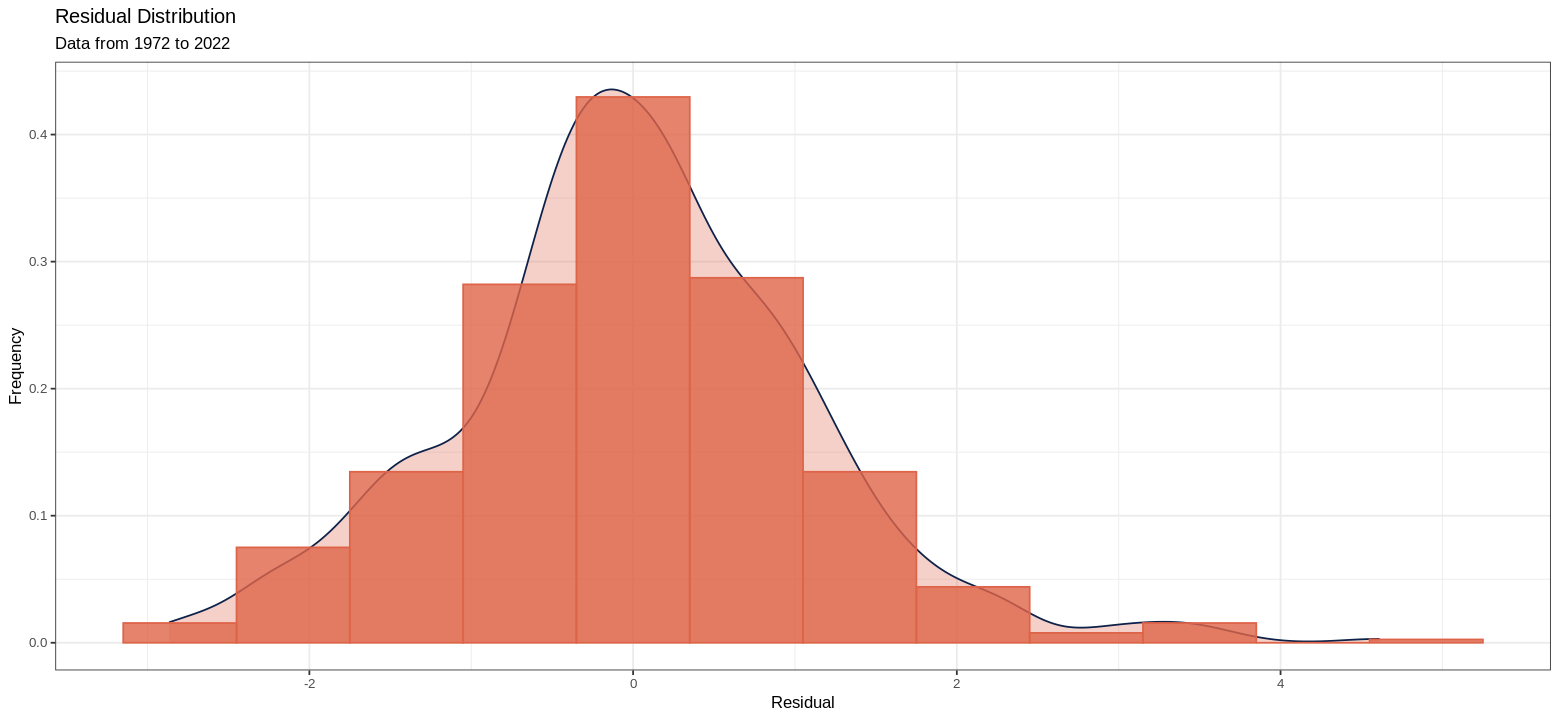

In [124]:
fig(13,6)
ggplot() +
  geom_density(mapping=aes(x=full_model$residuals), col="#0D2149", fill="#de6449", size=0.5, alpha=0.3) +
  geom_histogram(mapping=aes(x=full_model$residuals, y=after_stat(density)), col="#de6449", fill="#de6449",
                 binwidth=0.7, alpha=0.8) +
  labs(title="Residual Distribution", subtitle="Data from 1972 to 2022", 
       x="Residual", y="Frequency") + theme_bw() + theme(text = element_text(size = 10))

Based on the plot above, there appears to be a slight positive skew in the data and from this we can say that the residuals are not normally distributed.  To re-verify the normality, I am doing Shapiro and Kolmogorov-Smirnov test.

Shapiro test and Kolmogorov-Smirnov test

In [125]:
shapiro.test(full_model$residuals)
ks.test(full_model$residuals, "pnorm")


	Shapiro-Wilk normality test

data:  full_model$residuals
W = 0.98591, p-value = 3.545e-05



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  full_model$residuals
D = 0.031468, p-value = 0.6451
alternative hypothesis: two-sided


Shapiro-Wilk test resulted in a p-value of 3.545e-05, which is less than the significance level of 0.05. Therefore, we can reject the null hypothesis that the residuals are normally distributed.

On the other hand, the Kolmogorov-Smirnov test resulted in a p-value of 0.6451, which is greater than 0.05. This indicates that we cannot reject the null hypothesis that the residuals follow a normal distribution.

While the results of the two tests are not entirely consistent, the assumption of normality for the residuals in the model may be violated to some extent.So, I am checking using normal probability plot too.

Normal Probability Plot

Since the above results are not consistent, I just want to check the normality by all means to be sure of it. Normality can also be checked using Normal Probability plot.

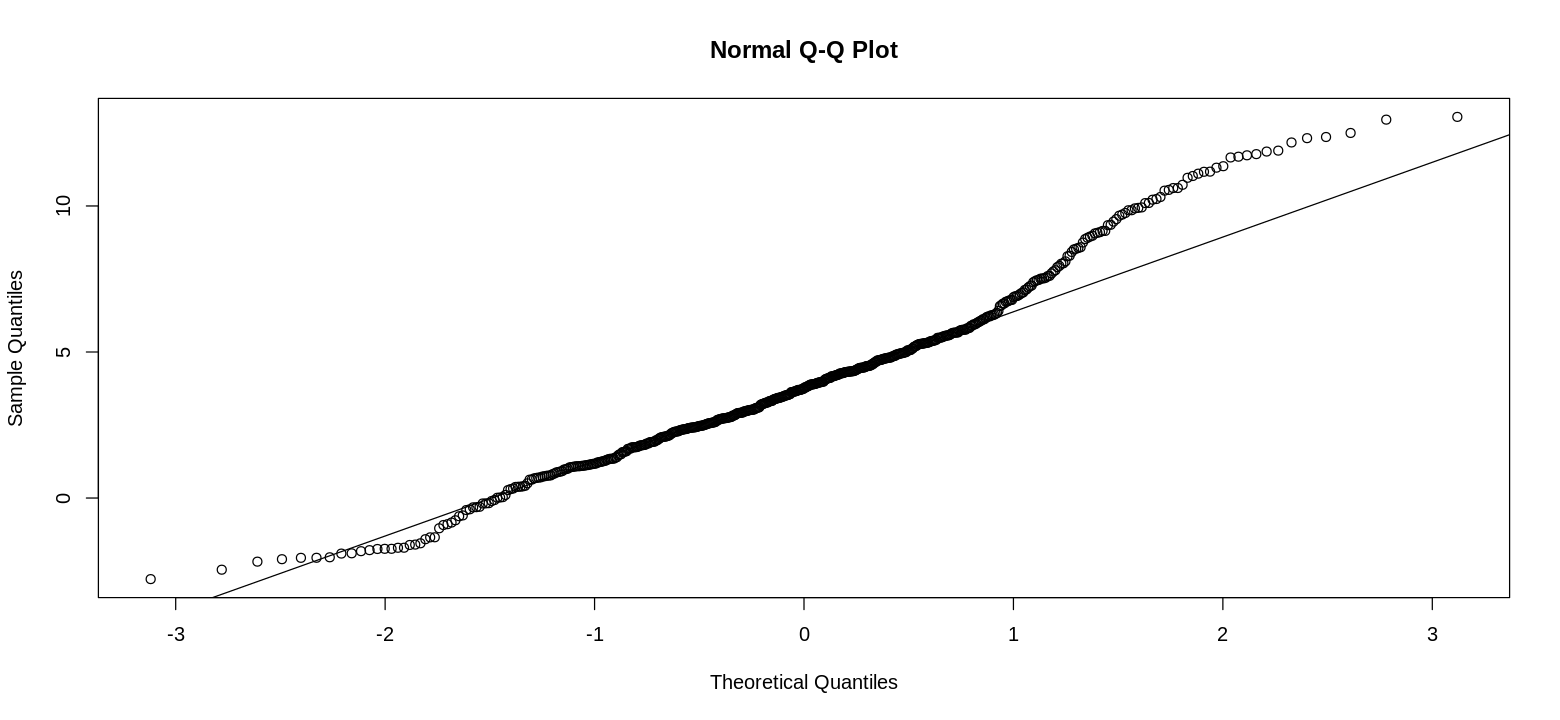

In [126]:
# Get the residuals
residuals <- full_model$fitted.values - full_model$residuals

# Create a normal probability plot of the residuals
#plot of the residuals against the quantiles of a normal distribution. 
#If the residuals are normally distributed, they should follow a straight line.
qqnorm(residuals)

#to further asses the normality of residuals adding a reference line to the plot that represents the expected distribution of 
#residuals if they are normally distributed. If the residuals follow this line closely, then they are likely to be  
#normally distributed.
qqline(residuals)

In this plot, we can see that the residuals at the centre follow the reference line but at the right edge of the line we can see that they are far away from the reference line because they are positively skewed. It is also clear that data is slightly negatively skewed too. Above one is a tailed q-q plot because they are skewed at the tails. So, as said in Shapiro and histogram plot, residuals are not normally distributed.

Independence

The residuals should be independent of each other. This is checked by examining the residuals (the difference between the observed and predicted values) against the predicted values. If there is a pattern in the residuals, it indicates that there is a relationship between the residuals and violates the independence assumption. If there is no pattern and all the residuals are randomly scattered around 0 then then we can say that they are independent of each other.

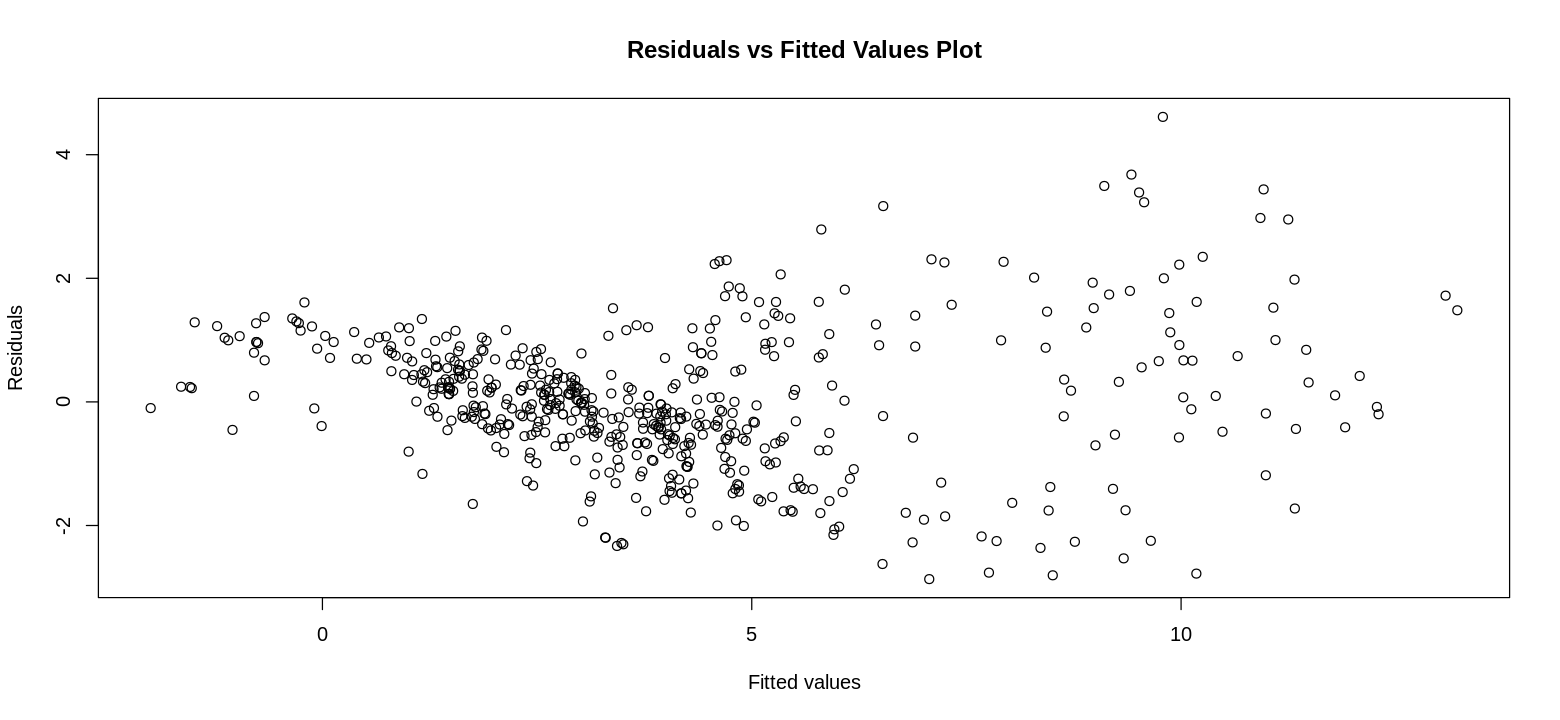

In [127]:
# Create a plot of residuals against fitted values
plot(full_model$fitted.values, full_model$residuals, xlab="Fitted values", ylab="Residuals", main="Residuals vs Fitted Values Plot")

Since the residuals are scattered everywhere around so we can say that residuals are not indepenent to each other. This can also be checked by using Durbin-watson test. We can also check if the residuals are autocorrelated or not using this test.

Autocorrelation and Independence

In [128]:
durbinWatsonTest(full_model)

 lag Autocorrelation D-W Statistic p-value
   1       0.9285714     0.1410359       0
 Alternative hypothesis: rho != 0

If p-value is greater than significance value (0.05) then we can say that residuals are not autocorrelated and there is evidence of independence. But here we can see that p-value is 0, so independence assumption is rejected and we can also see that residuals are autocorrelated with a high autocorrelation value of 0.92.

Multicollinearity

The independent variables should not be highly correlated with each other. This can be checked be calculating VIF for each predictor using the vif() function from the car package. If the VIF value for a variable is greater than 5 or 10, it indicates multicollinearity.

In [129]:
# calculate VIF
vif_values <- vif(full_model)
# print VIF values
print(vif_values)

     Unemployment          FEDFUNDS           UMCSENT        Oil_Change 
         3.397681         13.944254          2.419693          2.149131 
Commodities_Price         M1_change      MortgageRate         GoldPrice 
         3.745802          1.358345         15.281376          2.122285 


Based on the VIF values above, it seems that FEDFUNDS and MortgageRate have VIF values above 10, which indicate high multicollinearity with other predictors in the model.

Homoscedascity

The variance of the residuals should be constant across all values of the predicted variable. This can be checked by creating a scatterplot of the residuals against the predicted values. If there is a pattern or cone shape in the plot, it indicates that the variance of the residuals is not constant, and the homoscedasticity assumption is violated.

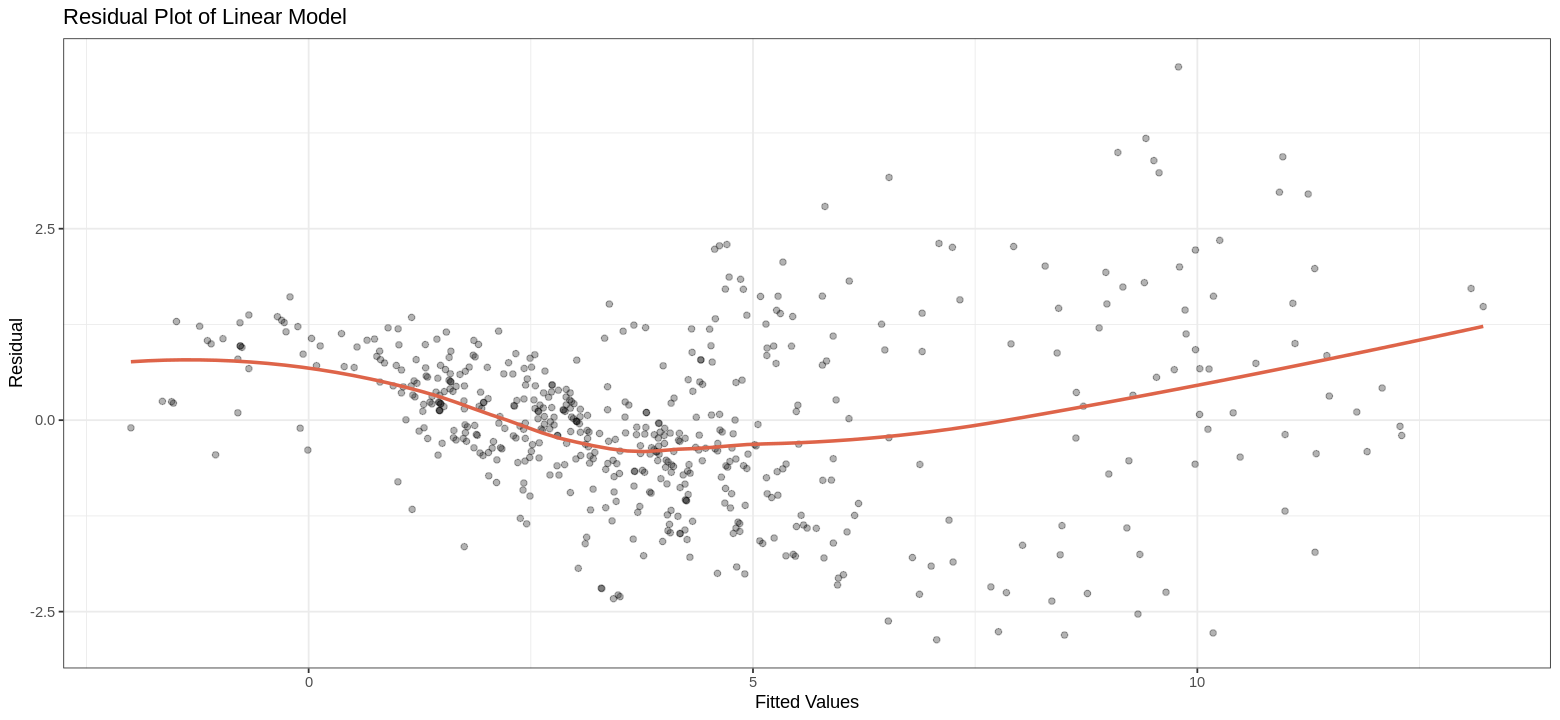

In [130]:
ggplot(mapping=aes(x=full_model$fitted.values, y=full_model$residuals)) +
  geom_point(alpha=0.3) +
  geom_smooth(method='loess', formula='y~x', se=FALSE, col="#DE6449") + theme_bw() +
  labs(title="Residual Plot of Linear Model", x="Fitted Values", y="Residual")

It can be seen that the variances of the residual points became larger with the larger fitted outcome variable (Inflation Rate), suggesting non-constant variances in the residuals errors (or heteroscedasticity).

Checking Outliers

In [131]:
# Test for outliers
outliers <- outlierTest(full_model)

# View results
outliers

    rstudent unadjusted p-value Bonferroni p
102 4.300045         2.0254e-05      0.01118

There is only one outlier in the data and I don't want to remove it because I feel that every value is important for forecasting the data.

All assumptions for linear model have been violated despite linear model being able to fit the data well. I will try performing step wise regression with both forward and backward selection based on AIC and see if model improves. 

In [132]:
# Perform stepwise regression
step.model <- stepAIC(full_model, direction = "both", trace = FALSE)

# Print the summary of the stepwise model
summary(step.model)


Call:
lm(formula = Rate ~ Unemployment + FEDFUNDS + UMCSENT + Commodities_Price + 
    M1_change + MortgageRate + GoldPrice, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9605 -0.5945 -0.0581  0.6614  4.6147 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.5254893  0.6927733  10.863  < 2e-16 ***
Unemployment      -0.1607729  0.0549691  -2.925  0.00359 ** 
FEDFUNDS           0.2717161  0.0426551   6.370 4.03e-10 ***
UMCSENT           -0.0718966  0.0057037 -12.605  < 2e-16 ***
Commodities_Price  0.2235019  0.0117448  19.030  < 2e-16 ***
M1_change          9.7411436  1.7379202   5.605 3.31e-08 ***
MortgageRate       0.1116332  0.0559979   1.994  0.04670 *  
GoldPrice         -0.0004249  0.0001605  -2.647  0.00835 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.101 on 544 degrees of freedom
Multiple R-squared:  0.8709,	Adjusted R-squared:  0.8693 
F-statistic: 524.4 

After trying both forward and backward selection, both ways they are selecting only one model with all variables except oil prices.

In [133]:
summary(full_model)
summary(step.model)


Call:
lm(formula = Rate ~ Unemployment + FEDFUNDS + UMCSENT + Oil_Change + 
    Commodities_Price + M1_change + MortgageRate + GoldPrice, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8671 -0.5863 -0.0392  0.6735  4.6120 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.3840807  0.7039049  10.490  < 2e-16 ***
Unemployment      -0.1675466  0.0552841  -3.031  0.00256 ** 
FEDFUNDS           0.2613273  0.0436319   5.989 3.84e-09 ***
UMCSENT           -0.0707523  0.0057922 -12.215  < 2e-16 ***
Oil_Change        -0.0021493  0.0019095  -1.126  0.26083    
Commodities_Price  0.2358737  0.0160835  14.666  < 2e-16 ***
M1_change          9.5609695  1.7448516   5.480 6.54e-08 ***
MortgageRate       0.1250888  0.0572462   2.185  0.02931 *  
GoldPrice         -0.0003863  0.0001641  -2.355  0.01890 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.1 on 543 degrees of freedom



Call:
lm(formula = Rate ~ Unemployment + FEDFUNDS + UMCSENT + Commodities_Price + 
    M1_change + MortgageRate + GoldPrice, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9605 -0.5945 -0.0581  0.6614  4.6147 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.5254893  0.6927733  10.863  < 2e-16 ***
Unemployment      -0.1607729  0.0549691  -2.925  0.00359 ** 
FEDFUNDS           0.2717161  0.0426551   6.370 4.03e-10 ***
UMCSENT           -0.0718966  0.0057037 -12.605  < 2e-16 ***
Commodities_Price  0.2235019  0.0117448  19.030  < 2e-16 ***
M1_change          9.7411436  1.7379202   5.605 3.31e-08 ***
MortgageRate       0.1116332  0.0559979   1.994  0.04670 *  
GoldPrice         -0.0004249  0.0001605  -2.647  0.00835 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.101 on 544 degrees of freedom
Multiple R-squared:  0.8709,	Adjusted R-squared:  0.8693 
F-statistic: 524.4 

In [134]:
# Make predictions on test data
pred <- predict(step.model, newdata = test)

install.packages("Metrics")
library(Metrics)
# Calculate and print the accuracy metrics of step model
mae <- mae(test$Rate, pred)
mse <- mse(test$Rate, pred)
rmse <- rmse(test$Rate, pred)
mape <- mape(test$Rate, pred)
accuracy_df1 <- data.frame(MAE = mae, MSE = mse, RMSE = rmse, MAPE = mape)
print(accuracy_df1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




        MAE       MSE      RMSE      MAPE
1 0.6597868 0.6764271 0.8224519 0.2450378


In [135]:
# Calculate and print the accuracy metrics of linear model forecast
mae <- mae(test$Rate, linearmodel_forecast1)
mse <- mse(test$Rate, linearmodel_forecast1)
rmse <- rmse(test$Rate, linearmodel_forecast1)
mape <- mape(test$Rate, linearmodel_forecast1)
accuracy_df <- data.frame(MAE = mae, MSE = mse, RMSE = rmse, MAPE = mape)
print(accuracy_df)

        MAE       MSE      RMSE      MAPE
1 0.6250961 0.6109154 0.7816108 0.2451675


Based on the results above, we can see that linear model without step wise regression seemed to perform better. Therefore, the we will evaluate a few other methods like ARIMA and NNAR modeling that are better suitable to work with autocorrelated data and univariate time series data.

In [137]:
colnames(train)

[1] "Date"              "Rate"              "FEDFUNDS"         
 [4] "M1_change"         "Unemployment"      "UMCSENT"          
 [7] "Commodities_Price" "Oil_Change"        "GoldPrice"        
[10] "MortgageRate"

**ARIMA Modeling**

In [138]:
# Load the necessary libraries
library(forecast)
library(tidyverse)

# Convert the date column to a date object
Inflation_full$Date <- as.Date(Inflation_full$Date, format = "%Y-%m-%d")

# Create a time series object for the inflation rate
Inflation_ts <- ts(Inflation_full$Rate, start = c(1972, 1), frequency = 12)

# Create a data frame with the other variables
other_vars_df <- Inflation_full %>% select(-Date, -Rate)

# Model 13: Commodities
commodities_ts <- ts(Inflation_full$Commodities_Price, start = c(1972, 1), frequency = 12)
model_13 <- auto.arima(Inflation_ts, xreg = commodities_ts)
summary(model_13)

# Model 4: All
other_vars_mat <- as.matrix(other_vars_df)
model_4 <- auto.arima(Inflation_ts, xreg = other_vars_mat)
summary(model_4)

# Model 5: All w/o Oil
other_vars_df_no_oil <- other_vars_df %>% select(-Oil_Change)
other_vars_mat_no_oil <- as.matrix(other_vars_df_no_oil)
model_5 <- auto.arima(Inflation_ts, xreg = other_vars_mat_no_oil)
summary(model_5)

# Model 3: None
model_3 <- auto.arima(Inflation_ts)
summary(model_3)

# Model 2: FEDFUNDS
Federal_ts <- ts(Inflation_full$FEDFUNDS, start = c(1972, 1), frequency = 12)
model_2 <- auto.arima(Inflation_ts, xreg = Federal_ts)
summary(model_2)

# Model 1: Commodities and FEDFUNDS
other_vars_df_select <- other_vars_df %>% 
  select(FEDFUNDS, Commodities_Price)

other_vars_mat_select <- as.matrix(other_vars_df_select)
model_1<- auto.arima(Inflation_ts, xreg = other_vars_mat_select)
summary(model_1)

#Model 6: Consumer Sentiment and GoldPrice

other_vars_df_select1 <- other_vars_df %>% 
  select(UMCSENT, GoldPrice)

other_vars_mat_select1 <- as.matrix(other_vars_df_select1)
model_6<- auto.arima(Inflation_ts, xreg = other_vars_mat_select1)
summary(model_6)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.1     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ psych::%+%()             masks ggplot2::%+%()
✖ psych::alpha()           masks ggplot2::alpha()
✖ lubridate::as.difftime() masks base::as.difftime()
✖ strucchange::boundary()  masks stringr::boundary()
✖ lubridate::date()        masks base::date()
✖ plotly::filter()         masks dplyr::filter(), stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ car::recode()            masks dplyr::recode()
✖ plotly::select()         masks MASS::select(), dplyr::select()
✖ lubridate::setdiff()     masks base::setdiff()
✖ car::some()              masks purrr::some()
✖ lubridate::union()       masks base::union()



Series: Inflation_ts 
Regression with ARIMA(1,1,2)(1,0,1)[12] errors 

Coefficients:
         ar1      ma1      ma2     sar1     sma1    xreg
      0.9613  -0.6499  -0.1771  -0.0374  -0.7320  0.1876
s.e.  0.0184   0.0461   0.0408   0.0558   0.0387  0.0092

sigma^2 = 0.05227:  log likelihood = 32.98
AIC=-51.97   AICc=-51.78   BIC=-21.06

Training set error measures:
                      ME      RMSE       MAE MPE MAPE      MASE         ACF1
Training set 0.002010202 0.2273161 0.1729304 Inf  Inf 0.1058757 -0.002263829

Series: Inflation_ts 
Regression with ARIMA(3,0,2)(1,0,1)[12] errors 

Coefficients:
         ar1      ar2      ar3      ma1      ma2     sar1     sma1  intercept
      1.8727  -0.7831  -0.0901  -0.5811  -0.2485  -0.0391  -0.7317     2.8127
s.e.  0.2246   0.4388   0.2147   0.2175   0.1764   0.0572   0.0425     0.8591
      FEDFUNDS  M1_change  Unemployment  UMCSENT  Commodities_Price  Oil_Change
       -0.0043    -0.8031       -0.0191   0.0007             0.1874       0e+00
s.e.    0.0167     1.7852        0.0149   0.0015             0.0099       6e-04
      GoldPrice  MortgageRate
          3e-04        0.0398
s.e.      2e-04        0.0255

sigma^2 = 0.05212:  log likelihood = 36.79
AIC=-39.58   AICc=-38.55   BIC=35.51

Training set error measures:
                      ME      RMSE       MAE MPE MAPE      MASE        ACF1
Training set 0.002663145 0.2252851 0.1722387 Inf  Inf 0.1054522 0.001731553

Series: Inflation_ts 
Regression with ARIMA(1,1,2)(1,0,1)[12] errors 

Coefficients:
         ar1      ma1      ma2     sar1     sma1  FEDFUNDS  M1_change
      0.9607  -0.6599  -0.1699  -0.0303  -0.7382   -0.0042    -0.8856
s.e.  0.0186   0.0465   0.0411   0.0570   0.0413    0.0167     1.7883
      Unemployment  UMCSENT  Commodities_Price  GoldPrice  MortgageRate
           -0.0198   0.0007             0.1867      3e-04        0.0386
s.e.        0.0140   0.0015             0.0092      2e-04        0.0254

sigma^2 = 0.05215:  log likelihood = 36.67
AIC=-47.34   AICc=-46.73   BIC=10.06

Training set error measures:
                      ME      RMSE       MAE MPE MAPE      MASE         ACF1
Training set 0.001160731 0.2259287 0.1726702 Inf  Inf 0.1057165 -0.002062928

Series: Inflation_ts 
ARIMA(2,1,3)(2,0,2)[12] 

Coefficients:
         ar1     ar2      ma1      ma2      ma3    sar1     sar2     sma1
      0.6851  0.2568  -0.2657  -0.3038  -0.1489  0.6707  -0.0509  -1.5288
s.e.  0.4320  0.4094   0.4285   0.2424   0.0919  0.1952   0.0632   0.1920
        sma2
      0.6278
s.e.  0.1451

sigma^2 = 0.08615:  log likelihood = -119.96
AIC=259.91   AICc=260.28   BIC=304.06

Training set error measures:
                      ME      RMSE       MAE MPE MAPE      MASE        ACF1
Training set 0.001566765 0.2911033 0.2160111 NaN  Inf 0.1322517 0.001528301

Series: Inflation_ts 
Regression with ARIMA(2,1,3)(2,0,2)[12] errors 

Coefficients:
         ar1     ar2      ma1      ma2      ma3    sar1     sar2     sma1
      0.6971  0.2450  -0.2778  -0.2985  -0.1467  0.6641  -0.0489  -1.5214
s.e.  0.3836  0.3611   0.3808   0.2128   0.0838  0.1999   0.0625   0.1963
        sma2    xreg
      0.6202  0.0110
s.e.  0.1493  0.0181

sigma^2 = 0.08625:  log likelihood = -119.77
AIC=261.54   AICc=261.98   BIC=310.1

Training set error measures:
                      ME      RMSE       MAE MPE MAPE      MASE        ACF1
Training set 0.001535651 0.2910289 0.2158807 NaN  Inf 0.1321719 0.001447291

Series: Inflation_ts 
Regression with ARIMA(1,1,2)(1,0,1)[12] errors 

Coefficients:
         ar1      ma1      ma2     sar1     sma1  FEDFUNDS  Commodities_Price
      0.9611  -0.6502  -0.1776  -0.0364  -0.7321    0.0056             0.1875
s.e.  0.0185   0.0462   0.0408   0.0560   0.0390    0.0155             0.0092

sigma^2 = 0.05235:  log likelihood = 33.05
AIC=-50.1   AICc=-49.86   BIC=-14.78

Training set error measures:
                      ME      RMSE       MAE MPE MAPE      MASE         ACF1
Training set 0.002013644 0.2272933 0.1728296 Inf  Inf 0.1058141 -0.002298884

Series: Inflation_ts 
Regression with ARIMA(3,1,1)(2,0,2)[12] errors 

Coefficients:
          ar1     ar2     ar3     ma1    sar1     sar2     sma1    sma2
      -0.3776  0.4918  0.1082  0.8340  0.7247  -0.0386  -1.5627  0.6437
s.e.   0.0506  0.0410  0.0432  0.0384  0.0534   0.0563   0.0566  0.0488
      UMCSENT  GoldPrice
       0.0018      1e-04
s.e.   0.0016      2e-04

sigma^2 = 0.0891:  log likelihood = -129.87
AIC=281.75   AICc=282.19   BIC=330.32

Training set error measures:
                       ME      RMSE       MAE MPE MAPE      MASE         ACF1
Training set -0.001665886 0.2957952 0.2225176 NaN  Inf 0.1362353 -0.004404191

**Performance metrics of ARIMA models**

In [139]:
# Make predictions on the test data
pred1 <- forecast(model_13, xreg = test$Commodities_Price)
# Calculate MAE, MedAE, and MaxAE
MAE <- mean(abs(pred1$mean - test$Rate))
MedAE <- median(abs(pred1$mean - test$Rate))
MaxAE <- max(abs(pred1$mean - test$Rate))
print(AIC(model_13))
print(BIC(model_13))
print(MAE)
print(MedAE)
print(MaxAE)

[1] -51.96714
[1] -21.06146
[1] 2.352409
[1] 2.581968
[1] 3.872895


In [140]:
head(test)

Date       Rate FEDFUNDS M1_change  Unemployment UMCSENT Commodities_Price
1 2018-01-01 2.1  1.41     0.04235585 4.0           95.7   3.8              
2 2018-02-01 2.2  1.42     0.04210045 4.1           99.7   4.0              
3 2018-03-01 2.4  1.51     0.04062412 4.0          101.4   4.1              
4 2018-04-01 2.5  1.69     0.04103717 4.0           98.8   3.8              
5 2018-05-01 2.8  1.70     0.04368738 3.8           98.0   5.4              
6 2018-06-01 2.9  1.82     0.04810125 4.0           98.2   5.5              
  Oil_Change GoldPrice MortgageRate
1 29.4       1345.05   4.15        
2 20.0       1317.85   4.40        
3 32.7       1323.85   4.44        
4 32.7       1313.20   4.58        
5 53.7       1305.35   4.56        
6 52.3       1250.45   4.55

In [141]:
# Make predictions on the test data
pred2 <- forecast(model_4, xreg = as.matrix(test[, -c(1, 2)]))
# Calculate MAE, MedAE, and MaxAE
MAE <- mean(abs(pred2$mean - test$Rate))
MedAE <- median(abs(pred2$mean - test$Rate))
MaxAE <- max(abs(pred2$mean - test$Rate))
print(AIC(model_4))
print(BIC(model_4))
print(MAE)
print(MedAE)
print(MaxAE)

[1] -39.57734
[1] 35.50711
[1] 2.280906
[1] 2.53338
[1] 3.83106


In [142]:
colnames(train)
colnames(test)

[1] "Date"              "Rate"              "FEDFUNDS"         
 [4] "M1_change"         "Unemployment"      "UMCSENT"          
 [7] "Commodities_Price" "Oil_Change"        "GoldPrice"        
[10] "MortgageRate"

[1] "Date"              "Rate"              "FEDFUNDS"         
 [4] "M1_change"         "Unemployment"      "UMCSENT"          
 [7] "Commodities_Price" "Oil_Change"        "GoldPrice"        
[10] "MortgageRate"

In [143]:
# Make predictions on the test data
pred3 <- forecast(model_5, xreg = as.matrix(test[, -c(1, 2, 8)]))
# Calculate MAE, MedAE, and MaxAE
MAE <- mean(abs(pred3$mean - test$Rate))
MedAE <- median(abs(pred3$mean - test$Rate))
MaxAE <- max(abs(pred3$mean - test$Rate))
print(AIC(model_5))
print(BIC(model_5))
print(MAE)
print(MedAE)
print(MaxAE)

[1] -47.33901
[1] 10.05725
[1] 2.10646
[1] 2.261533
[1] 3.560535


In [144]:
# Make predictions on the test data
pred4 <- forecast(model_3)
test_window <- window(Inflation_ts, start = c(2018, 1), end = c(2022, 12))

# Extract overlapping forecast values
forecast_values <- na.omit(pred4$mean)
forecast_values <- forecast_values[start(test_window):end(test_window)]

# Calculate MAE, MedAE, and MaxAE
MAE <- mean(abs(forecast_values - test_window), na.rm = TRUE)
MedAE <- median(abs(forecast_values - test_window), na.rm = TRUE)
MaxAE <- max(abs(forecast_values - test_window), na.rm = TRUE)

print(AIC(model_3))
print(BIC(model_3))
print(MAE)
print(MedAE)
print(MaxAE)


[1] 259.9126
[1] 304.0636
[1] NaN
[1] NA
[1] -Inf


In [145]:
# Make predictions on the test data
pred5 <- forecast(model_2, xreg = test$FEDFUNDS)
# Calculate MAE, MedAE, and MaxAE
MAE <- mean(abs(pred5$mean - test$Rate))
MedAE <- median(abs(pred5$mean - test$Rate))
MaxAE <- max(abs(pred5$mean - test$Rate))
print(AIC(model_2))
print(BIC(model_2))
print(MAE)
print(MedAE)
print(MaxAE)

[1] 261.538
[1] 310.104
[1] 2.406897
[1] 2.42785
[1] 4.660428


In [146]:
# Subset relevant columns of test data frame
test_subset <- test[, c("FEDFUNDS", "Commodities_Price")]

# Make predictions on the test data
pred6 <- forecast(model_1, xreg = as.matrix(test_subset))

# Calculate MAE, MedAE, and MaxAE
MAE <- mean(abs(pred6$mean - test$Rate))
MedAE <- median(abs(pred6$mean - test$Rate))
MaxAE <- max(abs(pred6$mean - test$Rate))
print(AIC(model_1))
print(BIC(model_1))
print(MAE)
print(MedAE)
print(MaxAE)


[1] -50.10043
[1] -14.77965
[1] 2.33598
[1] 2.552046
[1] 3.843022


In [147]:
# Subset relevant columns of test data frame
test_subset1 <- test[, c("UMCSENT", "GoldPrice")]

# Make predictions on the test data
pred7 <- forecast(model_6, xreg = as.matrix(test_subset1))

# Calculate MAE, MedAE, and MaxAE
MAE <- mean(abs(pred7$mean - test$Rate))
MedAE <- median(abs(pred7$mean - test$Rate))
MaxAE <- max(abs(pred7$mean - test$Rate))
print(AIC(model_6))
print(BIC(model_6))
print(MAE)
print(MedAE)
print(MaxAE)


[1] 281.7496
[1] 330.3157
[1] 2.168048
[1] 1.803672
[1] 5.390516


In [148]:
install.packages("knitr")
library(knitr)

# create example data
model_num <- c(13, 4, 5, 3, 2, 1, 6)
vars_used <- c("Commodities", "All", "All w/o Oil", "None", "FEDFUNDS", "FEDFUNDS and Commodities", "UMCSENT and GoldPrice")
MAE <- c(2.352409,2.280996,2.106606,NaN, 2.406897, 2.33598, 2.168048)
MedAE <- c(2.581968,2.533534,2.261766,NA, 2.42785, 2.552046, 1.803672)
MaxAE <- c(3.872895,3.831243,3.560799,-Inf, 4.660428, 3.843022, 5.390516)
AIC_val <- c(-51.96714,-39.57735,-47.33902,259.9126, 261.538, -50.10043, 281.7496)
BIC_val <- c(-21.06146,35.5071,10.05724,304.0636, 310.104, -14.77965, 330.3157)

# combine data into a data frame
results_df <- data.frame(Model = model_num,
                          Variables_Used = vars_used,
                          MAE = MAE,
                          MedAE = MedAE,
                          MaxAE = MaxAE,
                          AIC = AIC_val,
                          BIC = BIC_val)

# print the table
kable(results_df, align = "c")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





| Model |      Variables_Used      |   MAE    |  MedAE   |  MaxAE   |    AIC    |    BIC    |
|:-----:|:------------------------:|:--------:|:--------:|:--------:|:---------:|:---------:|
|  13   |       Commodities        | 2.352409 | 2.581968 | 3.872895 | -51.96714 | -21.06146 |
|   4   |           All            | 2.280996 | 2.533534 | 3.831243 | -39.57735 | 35.50710  |
|   5   |       All w/o Oil        | 2.106606 | 2.261766 | 3.560799 | -47.33902 | 10.05724  |
|   3   |           None           |   NaN    |    NA    |   -Inf   | 259.91260 | 304.06360 |
|   2   |         FEDFUNDS         | 2.406897 | 2.427850 | 4.660428 | 261.53800 | 310.10400 |
|   1   | FEDFUNDS and Commodities | 2.335980 | 2.552046 | 3.843022 | -50.10043 | -14.77965 |
|   6   |  UMCSENT and GoldPrice   | 2.168048 | 1.803672 | 5.390516 | 281.74960 | 330.31570 |

In [149]:
# Sort the data frame by ascending MAE
results_df_sorted <- results_df[order(results_df$MAE, na.last=NA),]

# Select the top five models based on lowest MAE
top_seven <- head(results_df_sorted, 7)

# Print the top five models
top_seven

Model Variables_Used           MAE      MedAE    MaxAE    AIC       BIC      
3  5    All w/o Oil              2.106606 2.261766 3.560799 -47.33902  10.05724
7  6    UMCSENT and GoldPrice    2.168048 1.803672 5.390516 281.74960 330.31570
2  4    All                      2.280996 2.533534 3.831243 -39.57735  35.50710
6  1    FEDFUNDS and Commodities 2.335980 2.552046 3.843022 -50.10043 -14.77965
1 13    Commodities              2.352409 2.581968 3.872895 -51.96714 -21.06146
5  2    FEDFUNDS                 2.406897 2.427850 4.660428 261.53800 310.10400

**NNAR Modeling**

In [150]:
# Model 1: Commodities and FEDFUNDS
nother_vars_df_select <- other_vars_df %>% select(FEDFUNDS, Commodities_Price)
nnar_model_1 <- nnetar(Inflation_ts, xreg = nother_vars_df_select)

# Model 2: FEDFUNDS
nnar_model_2 <- nnetar(Inflation_ts, xreg = Federal_ts)

# Model 3: None
nnar_model_3 <- nnetar(Inflation_ts)

# Model 4: All
nnar_model_4 <- nnetar(Inflation_ts, xreg = as.matrix(other_vars_df))

# Model 5: All w/o Oil
nnar_model_5 <- nnetar(Inflation_ts, xreg = as.matrix(other_vars_df_no_oil))

# Model 6: Consumer Sentiment and GoldPrice
other_vars_df_select1 <- other_vars_df %>% select(UMCSENT, GoldPrice)
nnar_model_6 <- nnetar(Inflation_ts, xreg = other_vars_df_select1)

# Fit an NNAR model with commodities price as an exogenous variable
nnar_model_7 <- nnetar(Inflation_ts, xreg = commodities_ts)

summary(nnar_model_1)
summary(nnar_model_2)
summary(nnar_model_3)
summary(nnar_model_4)
summary(nnar_model_5)
summary(nnar_model_6)
summary(nnar_model_7)


          Length Class        Mode     
x          612   ts           numeric  
m            1   -none-       numeric  
p            1   -none-       numeric  
P            1   -none-       numeric  
scalex       2   -none-       list     
scalexreg    2   -none-       list     
size         1   -none-       numeric  
xreg      1224   -none-       numeric  
subset     612   -none-       numeric  
model       20   nnetarmodels list     
nnetargs     0   -none-       list     
fitted     612   ts           numeric  
residuals  612   ts           numeric  
lags        26   -none-       numeric  
series       1   -none-       character
method       1   -none-       character
call         3   -none-       call     

          Length Class        Mode     
x         612    ts           numeric  
m           1    -none-       numeric  
p           1    -none-       numeric  
P           1    -none-       numeric  
scalex      2    -none-       list     
scalexreg   2    -none-       list     
size        1    -none-       numeric  
xreg      612    -none-       numeric  
subset    612    -none-       numeric  
model      20    nnetarmodels list     
nnetargs    0    -none-       list     
fitted    612    ts           numeric  
residuals 612    ts           numeric  
lags       26    -none-       numeric  
series      1    -none-       character
method      1    -none-       character
call        3    -none-       call     

          Length Class        Mode     
x         612    ts           numeric  
m           1    -none-       numeric  
p           1    -none-       numeric  
P           1    -none-       numeric  
scalex      2    -none-       list     
size        1    -none-       numeric  
subset    612    -none-       numeric  
model      20    nnetarmodels list     
nnetargs    0    -none-       list     
fitted    612    ts           numeric  
residuals 612    ts           numeric  
lags       26    -none-       numeric  
series      1    -none-       character
method      1    -none-       character
call        2    -none-       call     

          Length Class        Mode     
x          612   ts           numeric  
m            1   -none-       numeric  
p            1   -none-       numeric  
P            1   -none-       numeric  
scalex       2   -none-       list     
scalexreg    2   -none-       list     
size         1   -none-       numeric  
xreg      4896   -none-       numeric  
subset     612   -none-       numeric  
model       20   nnetarmodels list     
nnetargs     0   -none-       list     
fitted     612   ts           numeric  
residuals  612   ts           numeric  
lags        26   -none-       numeric  
series       1   -none-       character
method       1   -none-       character
call         3   -none-       call     

          Length Class        Mode     
x          612   ts           numeric  
m            1   -none-       numeric  
p            1   -none-       numeric  
P            1   -none-       numeric  
scalex       2   -none-       list     
scalexreg    2   -none-       list     
size         1   -none-       numeric  
xreg      4284   -none-       numeric  
subset     612   -none-       numeric  
model       20   nnetarmodels list     
nnetargs     0   -none-       list     
fitted     612   ts           numeric  
residuals  612   ts           numeric  
lags        26   -none-       numeric  
series       1   -none-       character
method       1   -none-       character
call         3   -none-       call     

          Length Class        Mode     
x          612   ts           numeric  
m            1   -none-       numeric  
p            1   -none-       numeric  
P            1   -none-       numeric  
scalex       2   -none-       list     
scalexreg    2   -none-       list     
size         1   -none-       numeric  
xreg      1224   -none-       numeric  
subset     612   -none-       numeric  
model       20   nnetarmodels list     
nnetargs     0   -none-       list     
fitted     612   ts           numeric  
residuals  612   ts           numeric  
lags        26   -none-       numeric  
series       1   -none-       character
method       1   -none-       character
call         3   -none-       call     

          Length Class        Mode     
x         612    ts           numeric  
m           1    -none-       numeric  
p           1    -none-       numeric  
P           1    -none-       numeric  
scalex      2    -none-       list     
scalexreg   2    -none-       list     
size        1    -none-       numeric  
xreg      612    -none-       numeric  
subset    612    -none-       numeric  
model      20    nnetarmodels list     
nnetargs    0    -none-       list     
fitted    612    ts           numeric  
residuals 612    ts           numeric  
lags       26    -none-       numeric  
series      1    -none-       character
method      1    -none-       character
call        3    -none-       call     

**Performance metrics of NNAR models**

In [151]:
# Make predictions
#commodities and fedfunds
pred1 <- forecast(nnar_model_1, xreg = test %>% select(Commodities_Price, FEDFUNDS))
# Calculate MAE, MedAE, and MaxAE
MAE1 <- mean(abs(pred1$mean - test$Rate))
MedAE1 <- median(abs(pred1$mean - test$Rate))
MaxAE1 <- max(abs(pred1$mean - test$Rate))

# Make predictions
#FEDFUNDS
pred2 <- forecast(nnar_model_2, xreg = test$FEDFUNDS)
# Calculate MAE, MedAE, and MaxAE
MAE2 <- mean(abs(pred2$mean - test$Rate))
MedAE2 <- median(abs(pred2$mean - test$Rate))
MaxAE2 <- max(abs(pred2$mean - test$Rate))

#None
# Make predictions
pred3 <- forecast(nnar_model_3)
test_window <- window(Inflation_ts, start = c(2018, 1), end = c(2022, 12))
# Calculate MAE, MedAE, and MaxAE
MAE3 <- mean(abs(pred3$mean - test_window))
MedAE3 <- median(abs(pred3$mean - test_window))
MaxAE3 <- max(abs(pred3$mean - test_window))

#ALL
# Make predictions
pred4 <- forecast(nnar_model_4, xreg = test %>% select(-Date,-Rate))
# Calculate MAE, MedAE, and MaxAE
MAE4 <- mean(abs(pred4$mean - test$Rate))
MedAE4 <- median(abs(pred4$mean - test$Rate))
MaxAE4 <- max(abs(pred4$mean - test$Rate))

#All w/o Oil
# Make predictions
pred5 <- forecast(nnar_model_5, xreg = test[, -c(1, 2, 8)])
# Calculate MAE, MedAE, and MaxAE
MAE5 <- mean(abs(pred5$mean - test$Rate))
MedAE5 <- median(abs(pred5$mean - test$Rate))
MaxAE5 <- max(abs(pred5$mean - test$Rate))

#Consumer sentiment and goldprice
# Make predictions
pred6 <- forecast(nnar_model_6, xreg = test %>% select(UMCSENT, GoldPrice))
# Calculate MAE, MedAE, and MaxAE
MAE6 <- mean(abs(pred6$mean - test$Rate))
MedAE6 <- median(abs(pred6$mean - test$Rate))
MaxAE6 <- max(abs(pred5$mean - test$Rate))

#Commodities
pred7 <- forecast(nnar_model_7, xreg = test$Commodities_Price)
# Calculate MAE, MedAE, and MaxAE
MAE7 <- mean(abs(pred7$mean - test$Rate))
MedAE7 <- median(abs(pred7$mean - test$Rate))
MaxAE7 <- max(abs(pred7$mean - test$Rate))



In [152]:
cat(paste0("Model #\tVariables Used\tMean Absolute Error\tMedian Absolute Error\tMax Error\n"))
cat("MAE1:", MAE1, "MedAE1:", MedAE1, "MaxAE1:", MaxAE1, "\n")
cat("MAE2:", MAE2, "MedAE2:", MedAE2, "MaxAE2:", MaxAE2, "\n")
cat("MAE3:", MAE3, "MedAE3:", MedAE3, "MaxAE3:", MaxAE3, "\n")
cat("MAE4:", MAE4, "MedAE4:", MedAE4, "MaxAE4:", MaxAE4, "\n")
cat("MAE5:", MAE5, "MedAE5:", MedAE5, "MaxAE5:", MaxAE5, "\n")
cat("MAE6:", MAE6, "MedAE6:", MedAE6, "MaxAE6:", MaxAE6, "\n")
cat("MAE7:", MAE7, "MedAE7:", MedAE7, "MaxAE7:", MaxAE7, "\n")

Model #	Variables Used	Mean Absolute Error	Median Absolute Error	Max Error
MAE1: 1.479563 MedAE1: 1.625812 MaxAE1: 3.333078 
MAE2: 3.158112 MedAE2: 2.643673 MaxAE2: 7.754503 
MAE3: NaN MedAE3: NA MaxAE3: -Inf 
MAE4: 0.7385801 MedAE4: 0.3485133 MaxAE4: 3.053199 
MAE5: 0.9601585 MedAE5: 0.1983266 MaxAE5: 3.639669 
MAE6: 7.632147 MedAE6: 7.401453 MaxAE6: 3.639669 
MAE7: 1.088801 MedAE7: 0.3588003 MaxAE7: 3.944377 


**Summarizing both NNAR and ARIMA models into a table**

In [153]:
df <- data.frame(
  "Model #" = c("NNAR 1", "NNAR 2", "NNAR 3", "NNAR 4", "NNAR 5", "NNAR 6", "NNAR 7"),
  "Variables Used" = c("Commodities and FEDFUNDS", "FEDFUNDS", "None", "All", "All w/o Oil", "UMCSENT and GoldPrice", "Commodities"),
  "Mean Absolute Error" = c("1.686139%%", "3.401931%%", "NaN", "0.6290642%%", "0.7747749%%", "4.487923%%", "1.198748%%"),
  "Median Absolute Error" = c("1.565136%%", "3.693137%%", "NA", "0.214221%%", "0.2088606%%", "3.773435%%", "0.7068593%%"),
  "Max Error" = c("3.408511%%", "7.430945%%", "-Inf", "3.136537%%", "3.495451%%", "3.495451%%", "3.665603%%")
)

In [154]:
# print the table
kable(df, align = "c")



| Model.. |      Variables.Used      | Mean.Absolute.Error | Median.Absolute.Error | Max.Error  |
|:-------:|:------------------------:|:-------------------:|:---------------------:|:----------:|
| NNAR 1  | Commodities and FEDFUNDS |     1.686139%%      |      1.565136%%       | 3.408511%% |
| NNAR 2  |         FEDFUNDS         |     3.401931%%      |      3.693137%%       | 7.430945%% |
| NNAR 3  |           None           |         NaN         |          NA           |    -Inf    |
| NNAR 4  |           All            |     0.6290642%%     |      0.214221%%       | 3.136537%% |
| NNAR 5  |       All w/o Oil        |     0.7747749%%     |      0.2088606%%      | 3.495451%% |
| NNAR 6  |  UMCSENT and GoldPrice   |     4.487923%%      |      3.773435%%       | 3.495451%% |
| NNAR 7  |       Commodities        |     1.198748%%      |      0.7068593%%      | 3.665603%% |

**NNAR top models**

In [155]:
# Sort the data frame by ascending MAE
df_sorted <- df[order(df$Mean.Absolute.Error, na.last=NA),]

# Select the top five models based on lowest MAE
top_seven1 <- head(df_sorted, 7)

# Print the top five models
top_seven1

Model.. Variables.Used           Mean.Absolute.Error Median.Absolute.Error
4 NNAR 4  All                      0.6290642%%         0.214221%%           
5 NNAR 5  All w/o Oil              0.7747749%%         0.2088606%%          
7 NNAR 7  Commodities              1.198748%%          0.7068593%%          
1 NNAR 1  Commodities and FEDFUNDS 1.686139%%          1.565136%%           
2 NNAR 2  FEDFUNDS                 3.401931%%          3.693137%%           
6 NNAR 6  UMCSENT and GoldPrice    4.487923%%          3.773435%%           
3 NNAR 3  None                     NaN                 NA                   
  Max.Error 
4 3.136537%%
5 3.495451%%
7 3.665603%%
1 3.408511%%
2 7.430945%%
6 3.495451%%
3 -Inf

The above NNAR models are sorted based on their performance metrics. The top three best models are NNAR 4, NNAR 5 and NNAR 7. As we have concluded at the beginning while performing linear regression model that model excluding oil price column would perform better is proved once again here. Commodities and Federal Funds columns as known are of main importance and GoldPrice Column is not much better. The model with all metrics stood at the top among other models.

**ARIMA top models**

In [156]:
# Sort the data frame by ascending MAE
results_df_sorted <- results_df[order(results_df$MAE, na.last=NA),]

# Select the top five models based on lowest MAE
top_seven <- head(results_df_sorted, 7)

# Print the top five models
top_seven

Model Variables_Used           MAE      MedAE    MaxAE    AIC       BIC      
3  5    All w/o Oil              2.106606 2.261766 3.560799 -47.33902  10.05724
7  6    UMCSENT and GoldPrice    2.168048 1.803672 5.390516 281.74960 330.31570
2  4    All                      2.280996 2.533534 3.831243 -39.57735  35.50710
6  1    FEDFUNDS and Commodities 2.335980 2.552046 3.843022 -50.10043 -14.77965
1 13    Commodities              2.352409 2.581968 3.872895 -51.96714 -21.06146
5  2    FEDFUNDS                 2.406897 2.427850 4.660428 261.53800 310.10400

Compared to ARIMA models and linear model, NNAR models performed very better by all performance metrics used. Both these models performed much better with atleast some external variables compared to without any external variables. In linear model, when used step wise regression to improve the model it showed that model would be much better that without oil prices so here also we can see that in models without Oil price performed very better compared to other. 



nfit2 means all. 
nfit3 means all without oil.
nfit11 means only commodities.

In [157]:
colnames(train)
head(train)

[1] "Date"              "Rate"              "FEDFUNDS"         
 [4] "M1_change"         "Unemployment"      "UMCSENT"          
 [7] "Commodities_Price" "Oil_Change"        "GoldPrice"        
[10] "MortgageRate"

Date       Rate FEDFUNDS M1_change Unemployment UMCSENT Commodities_Price
1 1972-01-01 3.3  3.51     0.1463106 5.8          89.2    4.0              
2 1972-02-01 3.5  3.30     0.1379095 5.7          92.8    4.0              
3 1972-03-01 3.5  3.83     0.1258655 5.8          91.4    3.7              
4 1972-04-01 3.5  4.17     0.1234812 5.7          90.0    3.7              
5 1972-05-01 3.2  4.27     0.1252437 5.7          88.6    3.7              
6 1972-06-01 2.7  4.46     0.1242199 5.7          90.8    3.9              
  Oil_Change GoldPrice MortgageRate
1 -1.3       47.15     7.40        
2 -1.3       48.20     7.31        
3 -1.3       48.38     7.23        
4 -1.3       49.60     7.33        
5 -1.3       59.45     7.40        
6 -1.3       64.65     7.38

In [158]:
#splitting time series column inflation rate into train and test sets
# Specify the time period for the training set
train_start <- c(1972, 1)
train_end <- c(2017, 12)

# Subset the time series object to create the training set
train_ts <- window(Inflation_ts, start = train_start, end = train_end)

# Specify the time period for the testing set
test_start <- c(2018, 1)
test_end <- c(2022, 12)

# Subset the time series object to create the testing set
test_ts <- window(Inflation_ts, start = test_start, end = test_end)

In [159]:
head(train_ts)
tail(train_ts)
head(test_ts)
tail(test_ts)

Jan Feb Mar Apr May Jun
1972 3.3 3.5 3.5 3.5 3.2 2.7

Jul Aug Sep Oct Nov Dec
2017 1.7 1.9 2.2 2.0 2.2 2.1

Jan Feb Mar Apr May Jun
2018 2.1 2.2 2.4 2.5 2.8 2.9

Jul Aug Sep Oct Nov Dec
2022 8.5 8.3 8.2 7.7 7.1 6.5

In [160]:
head(Inflation_ts)

Jan Feb Mar Apr May Jun
1972 3.3 3.5 3.5 3.5 3.2 2.7

**Evaluating Combining Forecasts and Visualizing the results after ensembling models**

Now I am evaluating models and combining forecasts from 2018 to 2022.

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


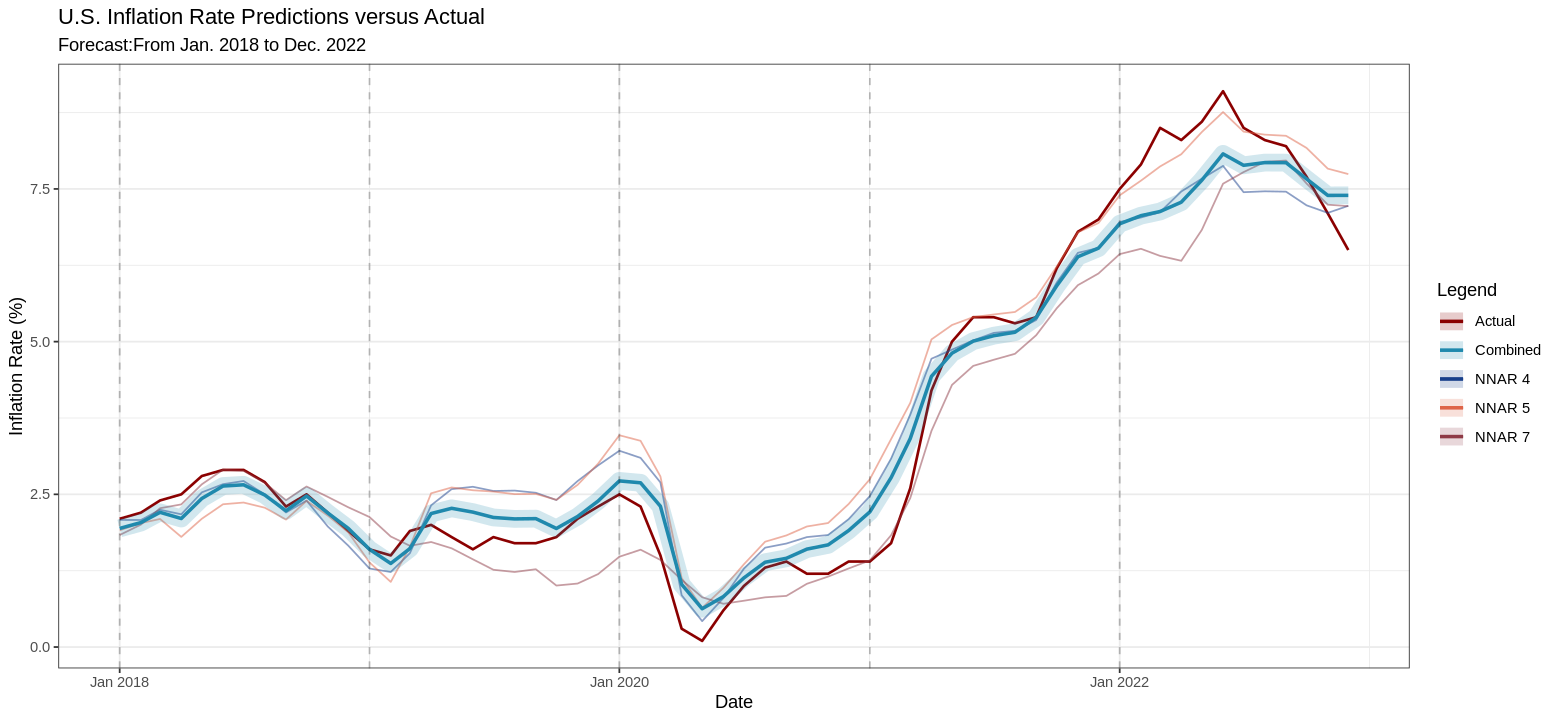

In [161]:
#Forecasting predictions versus actuals from Jan 2018 to Dec 2022
nnetar_eval <- function(x_train, y_train, x_test, y_test, for_period=60, variables=c("Fedfunds", "M1_change", "Unemployment", "Consumersentiment", "CommoditiesPrice","OilChange", "GoldPrice", "MortgageRate")){
  fit <- nnetar(y_train, xreg=as.matrix(x_train))
  fit_forecast <- forecast(fit, h=for_period, xreg=as.matrix(x_test), PI=F)
  pred_error <- mean(abs(fit_forecast$mean-y_test))
  med_pred_error <- median(abs(fit_forecast$mean-y_test))
  max_pred_error <- max(abs(fit_forecast$mean-y_test))
  metrics <- c("nnetar", variables, pred_error, med_pred_error, max_pred_error,
               NA, NA)
  ret_list <- list(model=fit, forecast=fit_forecast,
                   prediction_error=c(pred_error, med_pred_error),
                   pred_residuals=y_test-fit_forecast$mean,
                   metrics=metrics)
  return(ret_list)
}

# Fit 4
nfit4 <- nnetar_eval(x_train=train[3:10], y_train=train_ts, x_test=test[3:10], y_test=test_ts)

# Fit 5
nfit5 <- nnetar_eval(x_train=train[, c(3, 4, 5, 6, 7, 9, 10)], y_train=train_ts, x_test=test[, c(3, 4, 5, 6, 7, 9, 10)], y_test=test_ts, variables=c("Fedfunds", "M1_change", "Unemployment", "Consumersentiment", "CommoditiesPrice","GoldPrice", "MortgageRate"))

# Fit 7
nfit7 <- nnetar_eval(x_train=train$Commodities_Price, y_train=train_ts, x_test=test$Commodities_Price, y_test=test_ts, variables="CommoditiesPrice")

#Fit 1
#nfit1 <- nnetar_eval(x_train=train[, c(3,7)], y_train=train_ts, x_test=test[, c(3,7)], y_test=test_ts, variables=c("Fedfunds", "CommoditiesPrice"))

# Combination Forecasting
comb_forecast <- (nfit4$forecast$mean + nfit5$forecast$mean + nfit7$forecast$mean)/3
comb_predicted_MAE <- mean(abs(comb_forecast-test_ts))
comb_predicted_MedAE <- median(abs(comb_forecast-test_ts))
comb_predicted_MaxError <- max(abs(comb_forecast-test_ts))

# Forecast using models nfit4, nfit5, and nfit7
#nfit4_forecast <- forecast(nfit4, h = nrow(test_ts))$mean
#nfit5_forecast <- forecast(nfit5, h = nrow(test_ts))$mean
#nfit7_forecast <- forecast(nfit7, h = nrow(test_ts))$mean

# Combine forecasts into a data frame
#forecasts <- data.frame(Date = test$Date, nfit4 = nfit4_forecast, nfit5 = nfit5_forecast, nfit7 = nfit7_forecast, comb=comb_forecast, actual=test$Rate)

forecasts <- data.frame(Date=test$Date,
                       nfit4=nfit4$forecast$mean, nfit5=nfit5$forecast$mean,
                      nfit7=nfit7$forecast$mean,
                       comb=comb_forecast, actual=test_ts)

forecast_palette <- c("Actual"="darkred", "NNAR 4"="#183F8B", "NNAR 5"="#de6449",
                      "NNAR 7"="#8E3B46","Combined"="#208AAE")  #"NNAR 1" = "#6b4c4c"

ggplot(data=forecasts, mapping=aes(x=Date)) +
  geom_line(mapping=aes(y=`actual`, col="Actual"), size=0.75) +
  geom_line(mapping=aes(y=`nfit4`, col="NNAR 4"), alpha=0.5) +
  geom_line(mapping=aes(y=`nfit5`, col="NNAR 5"), alpha=0.5) +
  geom_line(mapping=aes(y=`nfit7`, col="NNAR 7"), alpha=0.5) +
  #geom_line(mapping=aes(y=`nfit1`, col="NNAR 1"), alpha=0.5) +
  geom_line(mapping=aes(y=`comb`, col="Combined"), size=1) +
  geom_line(mapping=aes(y=`comb`, col="Combined"), size=5, alpha=0.2) +
  geom_vline(xintercept=as.Date("2018-1-1"), linetype="dashed", alpha=0.25) +
  geom_vline(xintercept=as.Date("2019-1-1"), linetype="dashed", alpha=0.25) +
  geom_vline(xintercept=as.Date("2020-1-1"), linetype="dashed", alpha=0.25) +
  geom_vline(xintercept=as.Date("2021-1-1"), linetype="dashed", alpha=0.25) +
  geom_vline(xintercept=as.Date("2022-1-1"), linetype="dashed", alpha=0.25) +
  scale_x_date(date_labels = "%b %Y") + theme_bw() + 
  labs(title="U.S. Inflation Rate Predictions versus Actual",
       subtitle="Forecast:From Jan. 2018 to Dec. 2022", y="Inflation Rate (%)",
       col="Legend") +
  scale_color_manual(values = forecast_palette)


We can see that forecasted inflation values of ensembled model is very close to the actual inflation rate in the United states respective years.

In [162]:
#performance metrics of p1 ensembled model is way better than all individual models
print(comb_predicted_MAE)
print(comb_predicted_MedAE)
print(comb_predicted_MaxError)

[1] 0.3857995
[1] 0.2984658
[1] 1.369325


In [163]:
dim(comb_forecast)
dim(test_ts)
dim(test)#size of test dataframe

NULL

NULL

[1] 60 10

In [164]:
head(comb_forecast)
head(test_ts)
head(forecasts)

Jan      Feb      Mar      Apr      May      Jun     
2018 1.942220 2.038156 2.205574 2.103916 2.432175 2.635907

Jan Feb Mar Apr May Jun
2018 2.1 2.2 2.4 2.5 2.8 2.9

Date       nfit4    nfit5    nfit7    comb     actual
1 2018-01-01 2.081177 1.911046 1.834437 1.942220 2.1   
2 2018-02-01 2.079829 2.029698 2.004942 2.038156 2.2   
3 2018-03-01 2.247584 2.096528 2.272610 2.205574 2.4   
4 2018-04-01 2.173113 1.803223 2.335414 2.103916 2.5   
5 2018-05-01 2.532099 2.100209 2.664216 2.432175 2.8   
6 2018-06-01 2.666492 2.337662 2.903568 2.635907 2.9

In [165]:
install.packages("gridExtra")
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [166]:
# Define function for model fitting and evaluation
nnetar_eval <- function(x_train, y_train, x_test, y_test, for_period=60, variables=c("Fedfunds", "M1_change", "Unemployment", "Consumersentiment", "CommoditiesPrice","OilChange", "GoldPrice", "MortgageRate")){
  fit <- nnetar(y_train, xreg=as.matrix(x_train))
  fit_forecast <- forecast(fit, h=for_period, xreg=as.matrix(x_test), PI=F)
  pred_error <- mean(abs(fit_forecast$mean-y_test))
  med_pred_error <- median(abs(fit_forecast$mean-y_test))
  max_pred_error <- max(abs(fit_forecast$mean-y_test))
  metrics <- c("nnetar", variables, pred_error, med_pred_error, max_pred_error,
               NA, NA)
  ret_list <- list(model=fit, forecast=fit_forecast,
                   prediction_error=c(pred_error, med_pred_error),
                   pred_residuals=y_test-fit_forecast$mean,
                   metrics=metrics)
  return(ret_list)
}

# Fit models nfit4, nfit5, and nfit7
nnarfit4 <- nnetar_eval(x_train=train[3:10], y_train=train_ts, x_test=test[3:10], y_test=test_ts, for_period=60)
nnarfit5 <- nnetar_eval(x_train=train[, c(3, 4, 5, 6, 7, 9, 10)], y_train=train_ts, x_test=test[, c(3, 4, 5, 6, 7, 9, 10)], y_test=test_ts, for_period=60, variables=c("Fedfunds", "M1_change", "Unemployment", "Consumersentiment", "CommoditiesPrice","GoldPrice", "MortgageRate"))
nnarfit7 <- nnetar_eval(x_train=train$Commodities_Price, y_train=train_ts, x_test=test$Commodities_Price, y_test=test_ts, for_period=60, variables="CommoditiesPrice")
#nnarfit1 <- nnetar_eval(x_train=train[, c(3,7)], y_train=train_ts, x_test=test[, c(3,7)], y_test=test_ts, for_period=60, variables=c("Fedfunds", "CommoditiesPrice"))

# Combine forecasts of three individual models into a data frame
combi_forecast <- (nnarfit4$forecast$mean + nnarfit5$forecast$mean + nnarfit7$forecast$mean)/3
combi_predicted_MAE <- mean(abs(combi_forecast-test_ts))
combi_predicted_MedAE <- median(abs(combi_forecast-test_ts))
combi_predicted_MaxError <- max(abs(combi_forecast-test_ts))

#forecasts of three top NNAR models along with ensembled model of these three NNAR models(from 2023 to 2024)
forecasts1 <- data.frame(Date1=seq(as.Date("2023-01-01"), by="month", length.out=60),
                       nnarfit4=nnarfit4$forecast$mean, nnarfit5=nnarfit5$forecast$mean,
                      nnarfit7=nnarfit7$forecast$mean,
                       combi=combi_forecast)

#forecasts of three top NNAR models along with ensembled model from 2018 to 2022
forecasts <- data.frame(Date=test$Date,
                       nfit4=nfit4$forecast$mean, nfit5=nfit5$forecast$mean,
                      nfit7=nfit7$forecast$mean,
                       comb=comb_forecast, actuals=test_ts)

forecast_palette <- c("Actual"="darkred","NNAR 4"="#183F8B", "NNAR 5"="#de6449",
                      "NNAR 7"="#8E3B46", "Combined"="#208AAE")

#plotting U.S. Inflation predictions versus actuals from Jan 2018 to Dec 2022
p1 <- ggplot(data=forecasts, mapping=aes(x=Date)) +
  geom_line(mapping=aes(y=`actuals`, col="Actual"), size=0.75) +
  geom_line(mapping=aes(y=`nfit4`, col="NNAR 4"), alpha=0.5) +
  geom_line(mapping=aes(y=`nfit5`, col="NNAR 5"), alpha=0.5) +
  geom_line(mapping=aes(y=`nfit7`, col="NNAR 7"), alpha=0.5) +
  #geom_line(mapping=aes(y=`nfit1`, col="NNAR 1"), alpha=0.5) +
  geom_line(mapping=aes(y=`comb`, col="Combined"), size=1) +
  geom_line(mapping=aes(y=`comb`, col="Combined"), size=5, alpha=0.2) +
  geom_vline(xintercept=as.Date("2018-1-1"), linetype="dashed", alpha=0.25) +
  geom_vline(xintercept=as.Date("2019-1-1"), linetype="dashed", alpha=0.25) +
  geom_vline(xintercept=as.Date("2020-1-1"), linetype="dashed", alpha=0.25) +
  geom_vline(xintercept=as.Date("2021-1-1"), linetype="dashed", alpha=0.25) +
  geom_vline(xintercept=as.Date("2022-1-1"), linetype="dashed", alpha=0.25) +
  scale_x_date(date_labels = "%b %Y") + theme_bw() + 
  labs(title="U.S. Inflation Rate from Jan 2018 to Dec 2022",
       subtitle="Forecast:From Jan. 2018 to Dec. 2022", y="Inflation Rate (%)",
       col="Legend")+
  scale_color_manual(values = forecast_palette)


# Combine actuals and forecasts into a data frame
#forecasts1 <- cbind(forecasts, forecasts1)

#forecasts1 %>%
 #select(-Date1) %>%
  #complete(Date = seq.Date(as.Date("2018-01-01"), as.Date("2027-12-01"), by = "month"))%>%
  #fill(nnarfit4, nnarfit5, nnarfit7, combi, .direction = "down")


# Visualize forecasts
#forecast_palette1 <- c("Actual"="darkred", "NNAR 4"="#183F8B", "NNAR 5"="#de6449",
                      #"NNAR 7"="#8E3B46", "Combined"="#208AAE")

#Plotting U.S. Inflation forecasts from Jan 2023 to Jan 2025
p2 <- ggplot(data=forecasts1, mapping=aes(x=Date1)) +
  geom_line(mapping=aes(y=`nnarfit4`, col="NNAR 4"), alpha=0.5) +
  geom_line(mapping=aes(y=`nnarfit5`, col="NNAR 5"), alpha=0.5) +
  geom_line(mapping=aes(y=`nnarfit7`, col="NNAR 7"), alpha=0.5) +
  #geom_line(mapping=aes(y=`nnarfit1`, col="NNAR 1"), alpha=0.5) +
  geom_line(mapping=aes(y=`combi`, col="Combined"), size=1) +
  geom_line(mapping=aes(y=`combi`, col="Combined"), size=5, alpha=0.2) +
  geom_vline(xintercept=as.Date("2023-1-1"), linetype="dashed", alpha=0.25) +
  #geom_vline(xintercept=as.Date("2023-7-1"), linetype="dashed", alpha=0.25) +
  geom_vline(xintercept=as.Date("2024-1-1"), linetype="dashed", alpha=0.25) +
  #geom_vline(xintercept=as.Date("2024-7-1"), linetype="dashed", alpha=0.25) +
  #geom_vline(xintercept=as.Date("2025-1-1"), linetype="dashed", alpha=0.25) +
  #geom_vline(xintercept=as.Date("2026-1-1"), linetype="dashed", alpha=0.25) +
  #geom_vline(xintercept=as.Date("2027-1-1"), linetype="dashed", alpha=0.25) +
  scale_x_date(limits = as.Date(c("2023-01-01", "2024-1-01")), date_labels = "%b %Y") + 
  theme_bw() + 
  labs(title="U.S. Inflation Rate 12-Month Forecast",
       subtitle="Forecast Period:From Jan. 2023 to Jan. 2024", y="Inflation Rate (%)",
       col="Legend") +
  scale_color_manual(values = forecast_palette)


# Combine plots with a dashed line
#combined_plot <- p1 + p2

# Set common title
#combined_plot <- combined_plot + labs(title = "U.S. Inflation Rate 12 Month Future Forecast",
       #subtitle="From Jan. 2023 to Jan. 2024", y="Inflation Rate (%)",
       #col="Legend", caption="Source for Actual: St. Louis Federal Reserve Economic Data")

# Print the combined plot
#print(combined_plot)

In [167]:
#performance metrics of p2 ensembled model which is better than all individual models
print(combi_predicted_MAE)
print(combi_predicted_MedAE)
print(combi_predicted_MaxError)

[1] 0.5969714
[1] 0.5100263
[1] 1.981998


Performance metrics of ensembled model is way better than individual models.

In [168]:
install.packages("ggpubr")
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’



Attaching package: ‘ggpubr’


The following object is masked from ‘package:forecast’:

    gghistogram




Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


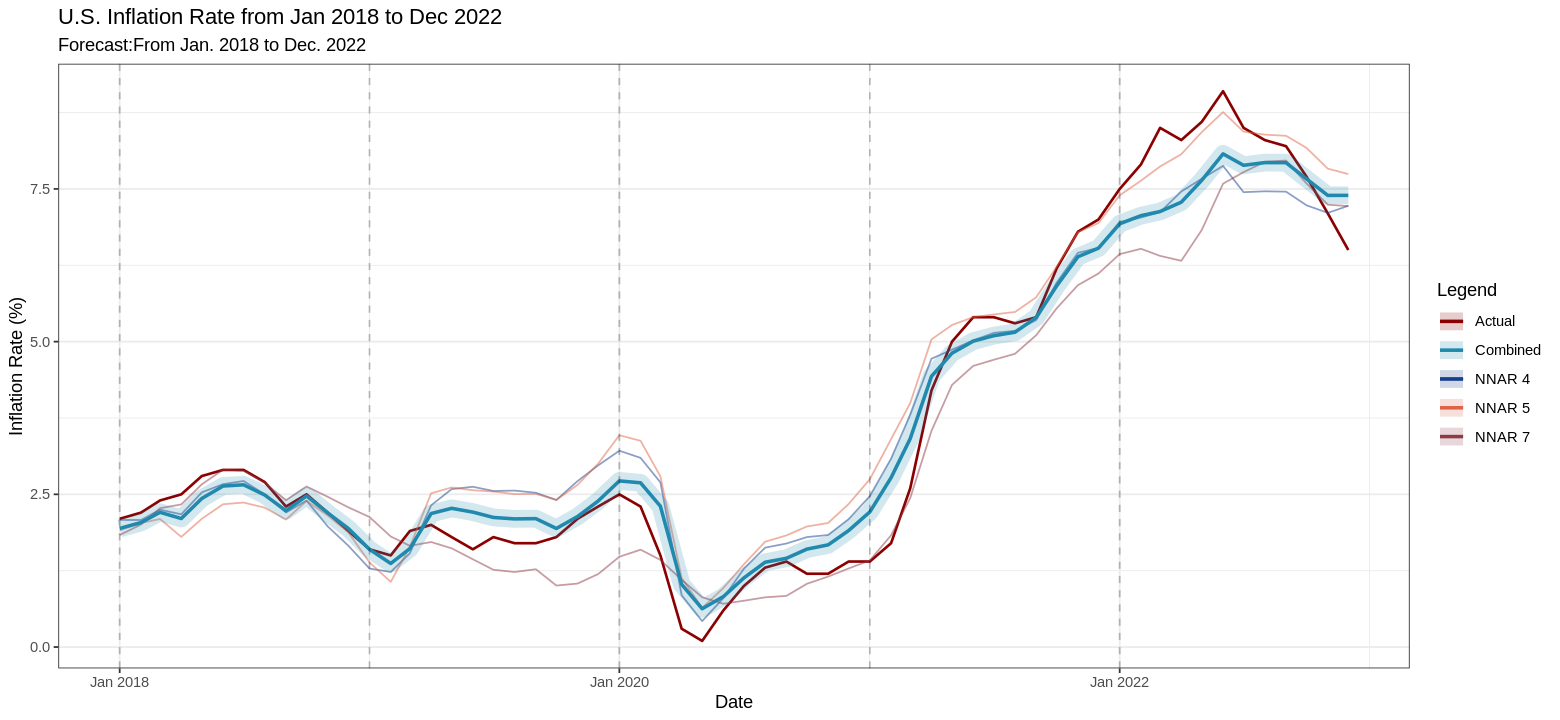

In [169]:
#prediction versus actuals from Jan 2018 to Dec 2022
p1

From this plot we also see that every model predicts a similar movement in inflation, where it is expected to drop off by September 2022.

We can see that forecasted inflation values of ensembled model is very close to the actual inflation rate in the United states respective years.

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


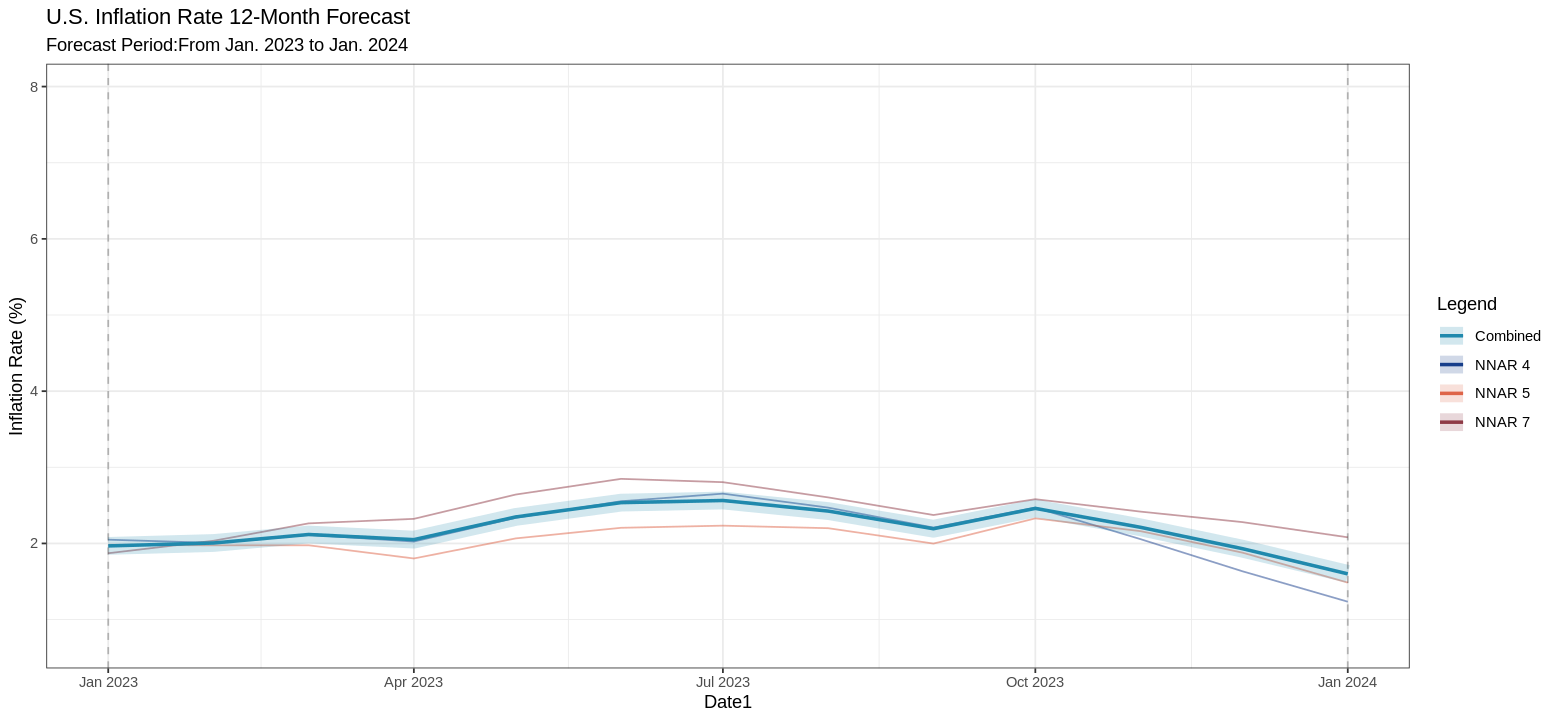

In [170]:
#predictions from Jan 2023 to Jan 2024
p2

From the above plot, we can see that forecasted inflation rate in Jan 2024 is between 1 and 2.3 which is close to the experts forecast.Inflation has dropped in the year 2023 but with a small ups and downs in the respective months and by the end of this year we can see that there is a drop in inflation.

**Combined two plots to print a single output**

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


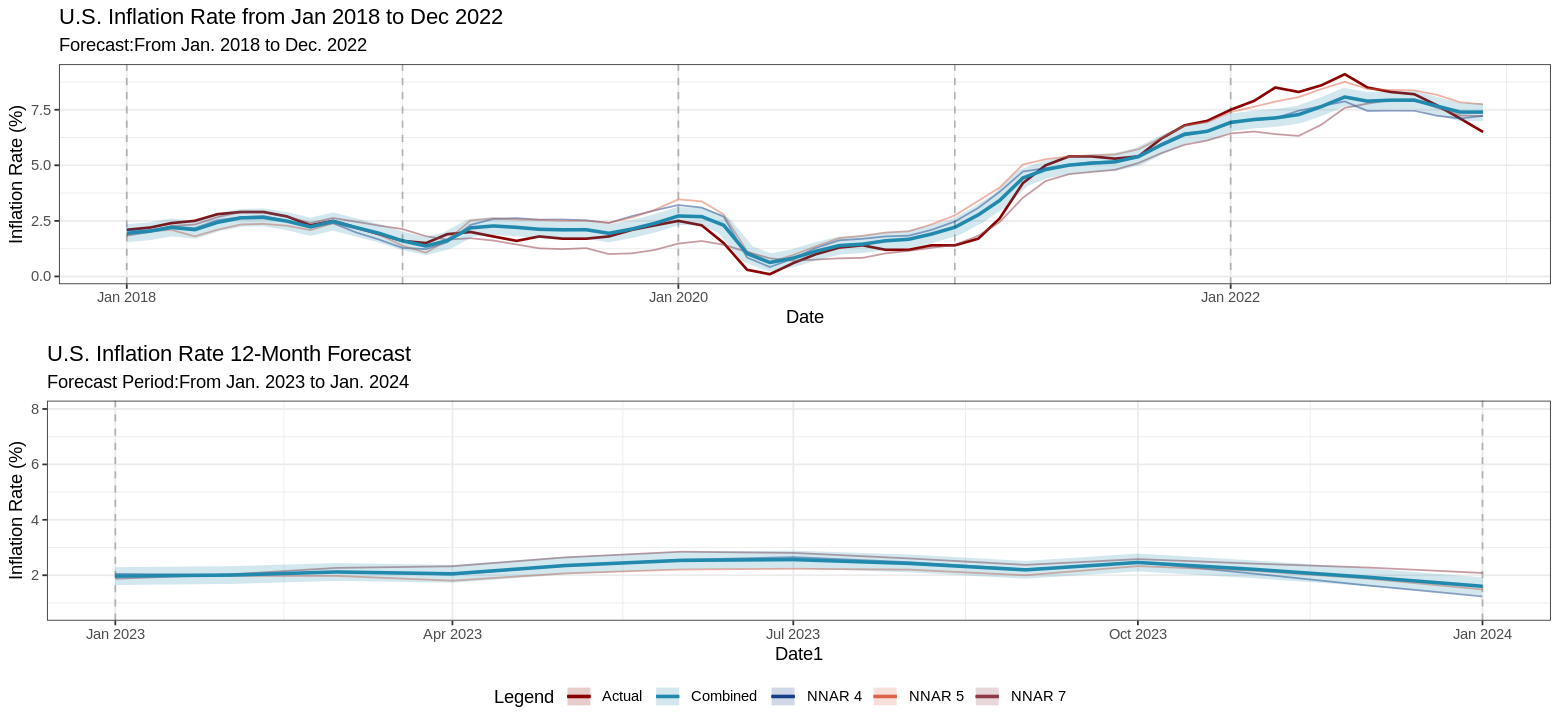

In [171]:

#combining two plots p1 and p2 and presenting as single output
# Set the plot dimensions
plot_width <- 20
plot_height <- 40

# Combine both plots into a single plot
combined_plot <- ggarrange(p1, p2, ncol = 1, common.legend = TRUE, legend = "bottom",
                           widths = c(plot_width), heights = c(plot_height, plot_height))

# Display the combined plot
combined_plot
